In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

In [2]:
# #extract tweets from twitter
# import tweepy 
  
# consumer_key = "" 
# consumer_secret = ""
# access_key = ""
# access_secret = ""

          
# # Authorization to consumer key and consumer secret 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

# # Access to user's access key and access secret 
# auth.set_access_token(access_key, access_secret) 

# # Calling api 
# api = tweepy.API(auth) 

# tweets = api.search(q="DelhiVoilence", lang="en", count=80)

# # Empty Array 
# tmp=[]  

# # create array of tweet information: username,  
# # tweet id, date/time, text 
# tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
# for j in tweets_for_csv: 
#     # Appending tweets to the empty array tmp 
#     tmp.append(j)  

# # Printing the tweets
# org = tmp
# print(tmp) 

In [3]:
# #get random tweets from bbchealth file
# f = open('C:/Users/sumit/data/bbchealth.txt', "r", encoding="utf8")
# tweets = list(f)
# list_of_tweets = []

# for i in range(len(tweets)):

#     # remove \n from the end after every sentence
#     tweets[i] = tweets[i].strip('\n')

#     # Remove the tweet id and timestamp
#     tweets[i] = tweets[i][50:]

#     # Remove any word that starts with the symbol @
#     tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))

#     # Remove any URL
#     tweets[i] = re.sub(r"http\S+", "", tweets[i])
#     tweets[i] = re.sub(r"www\S+", "", tweets[i])

#     # remove colons from the end of the sentences (if any) after removing url
#     tweets[i] = tweets[i].strip()
#     tweet_len = len(tweets[i])
#     if tweet_len > 0:
#         if tweets[i][len(tweets[i]) - 1] == ':':
#             tweets[i] = tweets[i][:len(tweets[i]) - 1]

#     # Remove any hash-tags symbols
#     tweets[i] = tweets[i].replace('#', '')

#     # Convert every word to lowercase
#     tweets[i] = tweets[i].lower()

#     # remove punctuations
#     tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

#     # trim extra spaces
#     tweets[i] = " ".join(tweets[i].split())

#     # convert each tweet from string type to as list<string> using " " as a delimiter
#     list_of_tweets.append(tweets[i].split(' '))
    
# tweets_exp = list_of_tweets[:20]
# tweets_abs = list_of_tweets[:20]

In [12]:
import csv
import re
import string

with open('C:/Users/user/data/#worldbookday.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
    
tweets_exp = list_of_tweets[:500]
tweets_abs = list_of_tweets[:500]

In [2]:
print('found %d tweets' % len(list_of_tweets))

found 30370 tweets


In [3]:
#getting expression words from pwords and nwords file

f = open('C:/Users/user/data/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/user/data/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [15]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    
#joining the words again into sentences
# seperator = ' '
# for n,text in enumerate(tweets_abs):
#     tweets_abs[n] = seperator.join(text)

# for n,text in enumerate(tweets_exp):
#     tweets_exp[n] = seperator.join(text)

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [16]:
tweets_exp

['encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encouraging',
 'encour

In [14]:
#working on abstraction score(tweets_abs)........................................................................

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 ...
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 121
3 122
3 123
3 124
3 125
3 126
3 127
3 128
3 129
3 130
3 13

5 399
5 400
5 401
5 402
5 403
5 404
5 405
5 406
5 407
5 408
5 409
5 410
5 411
5 412
5 413
5 414
5 415
5 416
5 417
5 418
5 419
5 420
5 421
5 422
5 423
5 424
5 425
5 426
5 427
5 428
5 429
5 430
5 431
5 432
5 433
5 434
5 435
5 436
5 437
5 438
5 439
5 440
5 441
5 442
5 443
5 444
5 445
5 446
5 447
5 448
5 449
5 450
5 451
5 452
5 453
5 454
5 455
5 456
5 457
5 458
5 459
5 460
5 461
5 462
5 463
5 464
5 465
5 466
5 467
5 468
5 469
5 470
5 471
5 472
5 473
5 474
5 475
5 476
5 477
5 478
5 479
5 480
5 481
5 482
5 483
5 484
5 485
5 486
5 487
5 488
5 489
5 490
5 491
5 492
5 493
5 494
5 495
5 496
5 497
5 498
5 499
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 84
6 85
6 

8 366
8 367
8 368
8 369
8 370
8 371
8 372
8 373
8 374
8 375
8 376
8 377
8 378
8 379
8 380
8 381
8 382
8 383
8 384
8 385
8 386
8 387
8 388
8 389
8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 409
8 410
8 411
8 412
8 413
8 414
8 415
8 416
8 417
8 418
8 419
8 420
8 421
8 422
8 423
8 424
8 425
8 426
8 427
8 428
8 429
8 430
8 431
8 432
8 433
8 434
8 435
8 436
8 437
8 438
8 439
8 440
8 441
8 442
8 443
8 444
8 445
8 446
8 447
8 448
8 449
8 450
8 451
8 452
8 453
8 454
8 455
8 456
8 457
8 458
8 459
8 460
8 461
8 462
8 463
8 464
8 465
8 466
8 467
8 468
8 469
8 470
8 471
8 472
8 473
8 474
8 475
8 476
8 477
8 478
8 479
8 480
8 481
8 482
8 483
8 484
8 485
8 486
8 487
8 488
8 489
8 490
8 491
8 492
8 493
8 494
8 495
8 496
8 497
8 498
8 499
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
9 31
9 32
9 33
9 34
9 35
9 36
9 37
9 38
9 39
9 40
9 41
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9

11 202
11 203
11 204
11 205
11 206
11 207
11 208
11 209
11 210
11 211
11 212
11 213
11 214
11 215
11 216
11 217
11 218
11 219
11 220
11 221
11 222
11 223
11 224
11 225
11 226
11 227
11 228
11 229
11 230
11 231
11 232
11 233
11 234
11 235
11 236
11 237
11 238
11 239
11 240
11 241
11 242
11 243
11 244
11 245
11 246
11 247
11 248
11 249
11 250
11 251
11 252
11 253
11 254
11 255
11 256
11 257
11 258
11 259
11 260
11 261
11 262
11 263
11 264
11 265
11 266
11 267
11 268
11 269
11 270
11 271
11 272
11 273
11 274
11 275
11 276
11 277
11 278
11 279
11 280
11 281
11 282
11 283
11 284
11 285
11 286
11 287
11 288
11 289
11 290
11 291
11 292
11 293
11 294
11 295
11 296
11 297
11 298
11 299
11 300
11 301
11 302
11 303
11 304
11 305
11 306
11 307
11 308
11 309
11 310
11 311
11 312
11 313
11 314
11 315
11 316
11 317
11 318
11 319
11 320
11 321
11 322
11 323
11 324
11 325
11 326
11 327
11 328
11 329
11 330
11 331
11 332
11 333
11 334
11 335
11 336
11 337
11 338
11 339
11 340
11 341
11 342
11 343
11 344

13 436
13 437
13 438
13 439
13 440
13 441
13 442
13 443
13 444
13 445
13 446
13 447
13 448
13 449
13 450
13 451
13 452
13 453
13 454
13 455
13 456
13 457
13 458
13 459
13 460
13 461
13 462
13 463
13 464
13 465
13 466
13 467
13 468
13 469
13 470
13 471
13 472
13 473
13 474
13 475
13 476
13 477
13 478
13 479
13 480
13 481
13 482
13 483
13 484
13 485
13 486
13 487
13 488
13 489
13 490
13 491
13 492
13 493
13 494
13 495
13 496
13 497
13 498
13 499
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 54
14 55
14 56
14 57
14 58
14 59
14 60
14 61
14 62
14 63
14 64
14 65
14 66
14 67
14 68
14 69
14 70
14 71
14 72
14 73
14 74
14 75
14 76
14 77
14 78
14 79
14 80
14 81
14 82
14 83
14 84
14 85
14 86
14 87
14 88
14 89
14 90
14 91
14 92
14 93
14 94
14 95
14 96
14 97
14 98
14 99
14 100
14 101
14 102
14 103
14 104
14 105


16 194
16 195
16 196
16 197
16 198
16 199
16 200
16 201
16 202
16 203
16 204
16 205
16 206
16 207
16 208
16 209
16 210
16 211
16 212
16 213
16 214
16 215
16 216
16 217
16 218
16 219
16 220
16 221
16 222
16 223
16 224
16 225
16 226
16 227
16 228
16 229
16 230
16 231
16 232
16 233
16 234
16 235
16 236
16 237
16 238
16 239
16 240
16 241
16 242
16 243
16 244
16 245
16 246
16 247
16 248
16 249
16 250
16 251
16 252
16 253
16 254
16 255
16 256
16 257
16 258
16 259
16 260
16 261
16 262
16 263
16 264
16 265
16 266
16 267
16 268
16 269
16 270
16 271
16 272
16 273
16 274
16 275
16 276
16 277
16 278
16 279
16 280
16 281
16 282
16 283
16 284
16 285
16 286
16 287
16 288
16 289
16 290
16 291
16 292
16 293
16 294
16 295
16 296
16 297
16 298
16 299
16 300
16 301
16 302
16 303
16 304
16 305
16 306
16 307
16 308
16 309
16 310
16 311
16 312
16 313
16 314
16 315
16 316
16 317
16 318
16 319
16 320
16 321
16 322
16 323
16 324
16 325
16 326
16 327
16 328
16 329
16 330
16 331
16 332
16 333
16 334
16 335
16 336

18 439
18 440
18 441
18 442
18 443
18 444
18 445
18 446
18 447
18 448
18 449
18 450
18 451
18 452
18 453
18 454
18 455
18 456
18 457
18 458
18 459
18 460
18 461
18 462
18 463
18 464
18 465
18 466
18 467
18 468
18 469
18 470
18 471
18 472
18 473
18 474
18 475
18 476
18 477
18 478
18 479
18 480
18 481
18 482
18 483
18 484
18 485
18 486
18 487
18 488
18 489
18 490
18 491
18 492
18 493
18 494
18 495
18 496
18 497
18 498
18 499
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
19 39
19 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
19 54
19 55
19 56
19 57
19 58
19 59
19 60
19 61
19 62
19 63
19 64
19 65
19 66
19 67
19 68
19 69
19 70
19 71
19 72
19 73
19 74
19 75
19 76
19 77
19 78
19 79
19 80
19 81
19 82
19 83
19 84
19 85
19 86
19 87
19 88
19 89
19 90
19 91
19 92
19 93
19 94
19 95
19 96
19 97
19 98
19 99
19 100
19 101
19 102
19 103
19 104
19 105
19 106
19 107
19 108
19 109
19 110
19 111
19 112
19

21 225
21 226
21 227
21 228
21 229
21 230
21 231
21 232
21 233
21 234
21 235
21 236
21 237
21 238
21 239
21 240
21 241
21 242
21 243
21 244
21 245
21 246
21 247
21 248
21 249
21 250
21 251
21 252
21 253
21 254
21 255
21 256
21 257
21 258
21 259
21 260
21 261
21 262
21 263
21 264
21 265
21 266
21 267
21 268
21 269
21 270
21 271
21 272
21 273
21 274
21 275
21 276
21 277
21 278
21 279
21 280
21 281
21 282
21 283
21 284
21 285
21 286
21 287
21 288
21 289
21 290
21 291
21 292
21 293
21 294
21 295
21 296
21 297
21 298
21 299
21 300
21 301
21 302
21 303
21 304
21 305
21 306
21 307
21 308
21 309
21 310
21 311
21 312
21 313
21 314
21 315
21 316
21 317
21 318
21 319
21 320
21 321
21 322
21 323
21 324
21 325
21 326
21 327
21 328
21 329
21 330
21 331
21 332
21 333
21 334
21 335
21 336
21 337
21 338
21 339
21 340
21 341
21 342
21 343
21 344
21 345
21 346
21 347
21 348
21 349
21 350
21 351
21 352
21 353
21 354
21 355
21 356
21 357
21 358
21 359
21 360
21 361
21 362
21 363
21 364
21 365
21 366
21 367

23 492
23 493
23 494
23 495
23 496
23 497
23 498
23 499
24 25
24 26
24 27
24 28
24 29
24 30
24 31
24 32
24 33
24 34
24 35
24 36
24 37
24 38
24 39
24 40
24 41
24 42
24 43
24 44
24 45
24 46
24 47
24 48
24 49
24 50
24 51
24 52
24 53
24 54
24 55
24 56
24 57
24 58
24 59
24 60
24 61
24 62
24 63
24 64
24 65
24 66
24 67
24 68
24 69
24 70
24 71
24 72
24 73
24 74
24 75
24 76
24 77
24 78
24 79
24 80
24 81
24 82
24 83
24 84
24 85
24 86
24 87
24 88
24 89
24 90
24 91
24 92
24 93
24 94
24 95
24 96
24 97
24 98
24 99
24 100
24 101
24 102
24 103
24 104
24 105
24 106
24 107
24 108
24 109
24 110
24 111
24 112
24 113
24 114
24 115
24 116
24 117
24 118
24 119
24 120
24 121
24 122
24 123
24 124
24 125
24 126
24 127
24 128
24 129
24 130
24 131
24 132
24 133
24 134
24 135
24 136
24 137
24 138
24 139
24 140
24 141
24 142
24 143
24 144
24 145
24 146
24 147
24 148
24 149
24 150
24 151
24 152
24 153
24 154
24 155
24 156
24 157
24 158
24 159
24 160
24 161
24 162
24 163
24 164
24 165
24 166
24 167
24 168
24 169
24 1

26 282
26 283
26 284
26 285
26 286
26 287
26 288
26 289
26 290
26 291
26 292
26 293
26 294
26 295
26 296
26 297
26 298
26 299
26 300
26 301
26 302
26 303
26 304
26 305
26 306
26 307
26 308
26 309
26 310
26 311
26 312
26 313
26 314
26 315
26 316
26 317
26 318
26 319
26 320
26 321
26 322
26 323
26 324
26 325
26 326
26 327
26 328
26 329
26 330
26 331
26 332
26 333
26 334
26 335
26 336
26 337
26 338
26 339
26 340
26 341
26 342
26 343
26 344
26 345
26 346
26 347
26 348
26 349
26 350
26 351
26 352
26 353
26 354
26 355
26 356
26 357
26 358
26 359
26 360
26 361
26 362
26 363
26 364
26 365
26 366
26 367
26 368
26 369
26 370
26 371
26 372
26 373
26 374
26 375
26 376
26 377
26 378
26 379
26 380
26 381
26 382
26 383
26 384
26 385
26 386
26 387
26 388
26 389
26 390
26 391
26 392
26 393
26 394
26 395
26 396
26 397
26 398
26 399
26 400
26 401
26 402
26 403
26 404
26 405
26 406
26 407
26 408
26 409
26 410
26 411
26 412
26 413
26 414
26 415
26 416
26 417
26 418
26 419
26 420
26 421
26 422
26 423
26 424

29 71
29 72
29 73
29 74
29 75
29 76
29 77
29 78
29 79
29 80
29 81
29 82
29 83
29 84
29 85
29 86
29 87
29 88
29 89
29 90
29 91
29 92
29 93
29 94
29 95
29 96
29 97
29 98
29 99
29 100
29 101
29 102
29 103
29 104
29 105
29 106
29 107
29 108
29 109
29 110
29 111
29 112
29 113
29 114
29 115
29 116
29 117
29 118
29 119
29 120
29 121
29 122
29 123
29 124
29 125
29 126
29 127
29 128
29 129
29 130
29 131
29 132
29 133
29 134
29 135
29 136
29 137
29 138
29 139
29 140
29 141
29 142
29 143
29 144
29 145
29 146
29 147
29 148
29 149
29 150
29 151
29 152
29 153
29 154
29 155
29 156
29 157
29 158
29 159
29 160
29 161
29 162
29 163
29 164
29 165
29 166
29 167
29 168
29 169
29 170
29 171
29 172
29 173
29 174
29 175
29 176
29 177
29 178
29 179
29 180
29 181
29 182
29 183
29 184
29 185
29 186
29 187
29 188
29 189
29 190
29 191
29 192
29 193
29 194
29 195
29 196
29 197
29 198
29 199
29 200
29 201
29 202
29 203
29 204
29 205
29 206
29 207
29 208
29 209
29 210
29 211
29 212
29 213
29 214
29 215
29 216
29 217


31 359
31 360
31 361
31 362
31 363
31 364
31 365
31 366
31 367
31 368
31 369
31 370
31 371
31 372
31 373
31 374
31 375
31 376
31 377
31 378
31 379
31 380
31 381
31 382
31 383
31 384
31 385
31 386
31 387
31 388
31 389
31 390
31 391
31 392
31 393
31 394
31 395
31 396
31 397
31 398
31 399
31 400
31 401
31 402
31 403
31 404
31 405
31 406
31 407
31 408
31 409
31 410
31 411
31 412
31 413
31 414
31 415
31 416
31 417
31 418
31 419
31 420
31 421
31 422
31 423
31 424
31 425
31 426
31 427
31 428
31 429
31 430
31 431
31 432
31 433
31 434
31 435
31 436
31 437
31 438
31 439
31 440
31 441
31 442
31 443
31 444
31 445
31 446
31 447
31 448
31 449
31 450
31 451
31 452
31 453
31 454
31 455
31 456
31 457
31 458
31 459
31 460
31 461
31 462
31 463
31 464
31 465
31 466
31 467
31 468
31 469
31 470
31 471
31 472
31 473
31 474
31 475
31 476
31 477
31 478
31 479
31 480
31 481
31 482
31 483
31 484
31 485
31 486
31 487
31 488
31 489
31 490
31 491
31 492
31 493
31 494
31 495
31 496
31 497
31 498
31 499
32 33
32 34
3

34 164
34 165
34 166
34 167
34 168
34 169
34 170
34 171
34 172
34 173
34 174
34 175
34 176
34 177
34 178
34 179
34 180
34 181
34 182
34 183
34 184
34 185
34 186
34 187
34 188
34 189
34 190
34 191
34 192
34 193
34 194
34 195
34 196
34 197
34 198
34 199
34 200
34 201
34 202
34 203
34 204
34 205
34 206
34 207
34 208
34 209
34 210
34 211
34 212
34 213
34 214
34 215
34 216
34 217
34 218
34 219
34 220
34 221
34 222
34 223
34 224
34 225
34 226
34 227
34 228
34 229
34 230
34 231
34 232
34 233
34 234
34 235
34 236
34 237
34 238
34 239
34 240
34 241
34 242
34 243
34 244
34 245
34 246
34 247
34 248
34 249
34 250
34 251
34 252
34 253
34 254
34 255
34 256
34 257
34 258
34 259
34 260
34 261
34 262
34 263
34 264
34 265
34 266
34 267
34 268
34 269
34 270
34 271
34 272
34 273
34 274
34 275
34 276
34 277
34 278
34 279
34 280
34 281
34 282
34 283
34 284
34 285
34 286
34 287
34 288
34 289
34 290
34 291
34 292
34 293
34 294
34 295
34 296
34 297
34 298
34 299
34 300
34 301
34 302
34 303
34 304
34 305
34 306

36 441
36 442
36 443
36 444
36 445
36 446
36 447
36 448
36 449
36 450
36 451
36 452
36 453
36 454
36 455
36 456
36 457
36 458
36 459
36 460
36 461
36 462
36 463
36 464
36 465
36 466
36 467
36 468
36 469
36 470
36 471
36 472
36 473
36 474
36 475
36 476
36 477
36 478
36 479
36 480
36 481
36 482
36 483
36 484
36 485
36 486
36 487
36 488
36 489
36 490
36 491
36 492
36 493
36 494
36 495
36 496
36 497
36 498
36 499
37 38
37 39
37 40
37 41
37 42
37 43
37 44
37 45
37 46
37 47
37 48
37 49
37 50
37 51
37 52
37 53
37 54
37 55
37 56
37 57
37 58
37 59
37 60
37 61
37 62
37 63
37 64
37 65
37 66
37 67
37 68
37 69
37 70
37 71
37 72
37 73
37 74
37 75
37 76
37 77
37 78
37 79
37 80
37 81
37 82
37 83
37 84
37 85
37 86
37 87
37 88
37 89
37 90
37 91
37 92
37 93
37 94
37 95
37 96
37 97
37 98
37 99
37 100
37 101
37 102
37 103
37 104
37 105
37 106
37 107
37 108
37 109
37 110
37 111
37 112
37 113
37 114
37 115
37 116
37 117
37 118
37 119
37 120
37 121
37 122
37 123
37 124
37 125
37 126
37 127
37 128
37 129
37 13

39 255
39 256
39 257
39 258
39 259
39 260
39 261
39 262
39 263
39 264
39 265
39 266
39 267
39 268
39 269
39 270
39 271
39 272
39 273
39 274
39 275
39 276
39 277
39 278
39 279
39 280
39 281
39 282
39 283
39 284
39 285
39 286
39 287
39 288
39 289
39 290
39 291
39 292
39 293
39 294
39 295
39 296
39 297
39 298
39 299
39 300
39 301
39 302
39 303
39 304
39 305
39 306
39 307
39 308
39 309
39 310
39 311
39 312
39 313
39 314
39 315
39 316
39 317
39 318
39 319
39 320
39 321
39 322
39 323
39 324
39 325
39 326
39 327
39 328
39 329
39 330
39 331
39 332
39 333
39 334
39 335
39 336
39 337
39 338
39 339
39 340
39 341
39 342
39 343
39 344
39 345
39 346
39 347
39 348
39 349
39 350
39 351
39 352
39 353
39 354
39 355
39 356
39 357
39 358
39 359
39 360
39 361
39 362
39 363
39 364
39 365
39 366
39 367
39 368
39 369
39 370
39 371
39 372
39 373
39 374
39 375
39 376
39 377
39 378
39 379
39 380
39 381
39 382
39 383
39 384
39 385
39 386
39 387
39 388
39 389
39 390
39 391
39 392
39 393
39 394
39 395
39 396
39 397

42 100
42 101
42 102
42 103
42 104
42 105
42 106
42 107
42 108
42 109
42 110
42 111
42 112
42 113
42 114
42 115
42 116
42 117
42 118
42 119
42 120
42 121
42 122
42 123
42 124
42 125
42 126
42 127
42 128
42 129
42 130
42 131
42 132
42 133
42 134
42 135
42 136
42 137
42 138
42 139
42 140
42 141
42 142
42 143
42 144
42 145
42 146
42 147
42 148
42 149
42 150
42 151
42 152
42 153
42 154
42 155
42 156
42 157
42 158
42 159
42 160
42 161
42 162
42 163
42 164
42 165
42 166
42 167
42 168
42 169
42 170
42 171
42 172
42 173
42 174
42 175
42 176
42 177
42 178
42 179
42 180
42 181
42 182
42 183
42 184
42 185
42 186
42 187
42 188
42 189
42 190
42 191
42 192
42 193
42 194
42 195
42 196
42 197
42 198
42 199
42 200
42 201
42 202
42 203
42 204
42 205
42 206
42 207
42 208
42 209
42 210
42 211
42 212
42 213
42 214
42 215
42 216
42 217
42 218
42 219
42 220
42 221
42 222
42 223
42 224
42 225
42 226
42 227
42 228
42 229
42 230
42 231
42 232
42 233
42 234
42 235
42 236
42 237
42 238
42 239
42 240
42 241
42 242

44 396
44 397
44 398
44 399
44 400
44 401
44 402
44 403
44 404
44 405
44 406
44 407
44 408
44 409
44 410
44 411
44 412
44 413
44 414
44 415
44 416
44 417
44 418
44 419
44 420
44 421
44 422
44 423
44 424
44 425
44 426
44 427
44 428
44 429
44 430
44 431
44 432
44 433
44 434
44 435
44 436
44 437
44 438
44 439
44 440
44 441
44 442
44 443
44 444
44 445
44 446
44 447
44 448
44 449
44 450
44 451
44 452
44 453
44 454
44 455
44 456
44 457
44 458
44 459
44 460
44 461
44 462
44 463
44 464
44 465
44 466
44 467
44 468
44 469
44 470
44 471
44 472
44 473
44 474
44 475
44 476
44 477
44 478
44 479
44 480
44 481
44 482
44 483
44 484
44 485
44 486
44 487
44 488
44 489
44 490
44 491
44 492
44 493
44 494
44 495
44 496
44 497
44 498
44 499
45 46
45 47
45 48
45 49
45 50
45 51
45 52
45 53
45 54
45 55
45 56
45 57
45 58
45 59
45 60
45 61
45 62
45 63
45 64
45 65
45 66
45 67
45 68
45 69
45 70
45 71
45 72
45 73
45 74
45 75
45 76
45 77
45 78
45 79
45 80
45 81
45 82
45 83
45 84
45 85
45 86
45 87
45 88
45 89
45 90
45

47 231
47 232
47 233
47 234
47 235
47 236
47 237
47 238
47 239
47 240
47 241
47 242
47 243
47 244
47 245
47 246
47 247
47 248
47 249
47 250
47 251
47 252
47 253
47 254
47 255
47 256
47 257
47 258
47 259
47 260
47 261
47 262
47 263
47 264
47 265
47 266
47 267
47 268
47 269
47 270
47 271
47 272
47 273
47 274
47 275
47 276
47 277
47 278
47 279
47 280
47 281
47 282
47 283
47 284
47 285
47 286
47 287
47 288
47 289
47 290
47 291
47 292
47 293
47 294
47 295
47 296
47 297
47 298
47 299
47 300
47 301
47 302
47 303
47 304
47 305
47 306
47 307
47 308
47 309
47 310
47 311
47 312
47 313
47 314
47 315
47 316
47 317
47 318
47 319
47 320
47 321
47 322
47 323
47 324
47 325
47 326
47 327
47 328
47 329
47 330
47 331
47 332
47 333
47 334
47 335
47 336
47 337
47 338
47 339
47 340
47 341
47 342
47 343
47 344
47 345
47 346
47 347
47 348
47 349
47 350
47 351
47 352
47 353
47 354
47 355
47 356
47 357
47 358
47 359
47 360
47 361
47 362
47 363
47 364
47 365
47 366
47 367
47 368
47 369
47 370
47 371
47 372
47 373

50 76
50 77
50 78
50 79
50 80
50 81
50 82
50 83
50 84
50 85
50 86
50 87
50 88
50 89
50 90
50 91
50 92
50 93
50 94
50 95
50 96
50 97
50 98
50 99
50 100
50 101
50 102
50 103
50 104
50 105
50 106
50 107
50 108
50 109
50 110
50 111
50 112
50 113
50 114
50 115
50 116
50 117
50 118
50 119
50 120
50 121
50 122
50 123
50 124
50 125
50 126
50 127
50 128
50 129
50 130
50 131
50 132
50 133
50 134
50 135
50 136
50 137
50 138
50 139
50 140
50 141
50 142
50 143
50 144
50 145
50 146
50 147
50 148
50 149
50 150
50 151
50 152
50 153
50 154
50 155
50 156
50 157
50 158
50 159
50 160
50 161
50 162
50 163
50 164
50 165
50 166
50 167
50 168
50 169
50 170
50 171
50 172
50 173
50 174
50 175
50 176
50 177
50 178
50 179
50 180
50 181
50 182
50 183
50 184
50 185
50 186
50 187
50 188
50 189
50 190
50 191
50 192
50 193
50 194
50 195
50 196
50 197
50 198
50 199
50 200
50 201
50 202
50 203
50 204
50 205
50 206
50 207
50 208
50 209
50 210
50 211
50 212
50 213
50 214
50 215
50 216
50 217
50 218
50 219
50 220
50 221
50

52 384
52 385
52 386
52 387
52 388
52 389
52 390
52 391
52 392
52 393
52 394
52 395
52 396
52 397
52 398
52 399
52 400
52 401
52 402
52 403
52 404
52 405
52 406
52 407
52 408
52 409
52 410
52 411
52 412
52 413
52 414
52 415
52 416
52 417
52 418
52 419
52 420
52 421
52 422
52 423
52 424
52 425
52 426
52 427
52 428
52 429
52 430
52 431
52 432
52 433
52 434
52 435
52 436
52 437
52 438
52 439
52 440
52 441
52 442
52 443
52 444
52 445
52 446
52 447
52 448
52 449
52 450
52 451
52 452
52 453
52 454
52 455
52 456
52 457
52 458
52 459
52 460
52 461
52 462
52 463
52 464
52 465
52 466
52 467
52 468
52 469
52 470
52 471
52 472
52 473
52 474
52 475
52 476
52 477
52 478
52 479
52 480
52 481
52 482
52 483
52 484
52 485
52 486
52 487
52 488
52 489
52 490
52 491
52 492
52 493
52 494
52 495
52 496
52 497
52 498
52 499
53 54
53 55
53 56
53 57
53 58
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
53 69
53 70
53 71
53 72
53 73
53 74
53 75
53 76
53 77
53 78
53 79
53 80
53 81
53 82
53 83
53 84
53

55 240
55 241
55 242
55 243
55 244
55 245
55 246
55 247
55 248
55 249
55 250
55 251
55 252
55 253
55 254
55 255
55 256
55 257
55 258
55 259
55 260
55 261
55 262
55 263
55 264
55 265
55 266
55 267
55 268
55 269
55 270
55 271
55 272
55 273
55 274
55 275
55 276
55 277
55 278
55 279
55 280
55 281
55 282
55 283
55 284
55 285
55 286
55 287
55 288
55 289
55 290
55 291
55 292
55 293
55 294
55 295
55 296
55 297
55 298
55 299
55 300
55 301
55 302
55 303
55 304
55 305
55 306
55 307
55 308
55 309
55 310
55 311
55 312
55 313
55 314
55 315
55 316
55 317
55 318
55 319
55 320
55 321
55 322
55 323
55 324
55 325
55 326
55 327
55 328
55 329
55 330
55 331
55 332
55 333
55 334
55 335
55 336
55 337
55 338
55 339
55 340
55 341
55 342
55 343
55 344
55 345
55 346
55 347
55 348
55 349
55 350
55 351
55 352
55 353
55 354
55 355
55 356
55 357
55 358
55 359
55 360
55 361
55 362
55 363
55 364
55 365
55 366
55 367
55 368
55 369
55 370
55 371
55 372
55 373
55 374
55 375
55 376
55 377
55 378
55 379
55 380
55 381
55 382

58 120
58 121
58 122
58 123
58 124
58 125
58 126
58 127
58 128
58 129
58 130
58 131
58 132
58 133
58 134
58 135
58 136
58 137
58 138
58 139
58 140
58 141
58 142
58 143
58 144
58 145
58 146
58 147
58 148
58 149
58 150
58 151
58 152
58 153
58 154
58 155
58 156
58 157
58 158
58 159
58 160
58 161
58 162
58 163
58 164
58 165
58 166
58 167
58 168
58 169
58 170
58 171
58 172
58 173
58 174
58 175
58 176
58 177
58 178
58 179
58 180
58 181
58 182
58 183
58 184
58 185
58 186
58 187
58 188
58 189
58 190
58 191
58 192
58 193
58 194
58 195
58 196
58 197
58 198
58 199
58 200
58 201
58 202
58 203
58 204
58 205
58 206
58 207
58 208
58 209
58 210
58 211
58 212
58 213
58 214
58 215
58 216
58 217
58 218
58 219
58 220
58 221
58 222
58 223
58 224
58 225
58 226
58 227
58 228
58 229
58 230
58 231
58 232
58 233
58 234
58 235
58 236
58 237
58 238
58 239
58 240
58 241
58 242
58 243
58 244
58 245
58 246
58 247
58 248
58 249
58 250
58 251
58 252
58 253
58 254
58 255
58 256
58 257
58 258
58 259
58 260
58 261
58 262

60 423
60 424
60 425
60 426
60 427
60 428
60 429
60 430
60 431
60 432
60 433
60 434
60 435
60 436
60 437
60 438
60 439
60 440
60 441
60 442
60 443
60 444
60 445
60 446
60 447
60 448
60 449
60 450
60 451
60 452
60 453
60 454
60 455
60 456
60 457
60 458
60 459
60 460
60 461
60 462
60 463
60 464
60 465
60 466
60 467
60 468
60 469
60 470
60 471
60 472
60 473
60 474
60 475
60 476
60 477
60 478
60 479
60 480
60 481
60 482
60 483
60 484
60 485
60 486
60 487
60 488
60 489
60 490
60 491
60 492
60 493
60 494
60 495
60 496
60 497
60 498
60 499
61 62
61 63
61 64
61 65
61 66
61 67
61 68
61 69
61 70
61 71
61 72
61 73
61 74
61 75
61 76
61 77
61 78
61 79
61 80
61 81
61 82
61 83
61 84
61 85
61 86
61 87
61 88
61 89
61 90
61 91
61 92
61 93
61 94
61 95
61 96
61 97
61 98
61 99
61 100
61 101
61 102
61 103
61 104
61 105
61 106
61 107
61 108
61 109
61 110
61 111
61 112
61 113
61 114
61 115
61 116
61 117
61 118
61 119
61 120
61 121
61 122
61 123
61 124
61 125
61 126
61 127
61 128
61 129
61 130
61 131
61 132
61

63 328
63 329
63 330
63 331
63 332
63 333
63 334
63 335
63 336
63 337
63 338
63 339
63 340
63 341
63 342
63 343
63 344
63 345
63 346
63 347
63 348
63 349
63 350
63 351
63 352
63 353
63 354
63 355
63 356
63 357
63 358
63 359
63 360
63 361
63 362
63 363
63 364
63 365
63 366
63 367
63 368
63 369
63 370
63 371
63 372
63 373
63 374
63 375
63 376
63 377
63 378
63 379
63 380
63 381
63 382
63 383
63 384
63 385
63 386
63 387
63 388
63 389
63 390
63 391
63 392
63 393
63 394
63 395
63 396
63 397
63 398
63 399
63 400
63 401
63 402
63 403
63 404
63 405
63 406
63 407
63 408
63 409
63 410
63 411
63 412
63 413
63 414
63 415
63 416
63 417
63 418
63 419
63 420
63 421
63 422
63 423
63 424
63 425
63 426
63 427
63 428
63 429
63 430
63 431
63 432
63 433
63 434
63 435
63 436
63 437
63 438
63 439
63 440
63 441
63 442
63 443
63 444
63 445
63 446
63 447
63 448
63 449
63 450
63 451
63 452
63 453
63 454
63 455
63 456
63 457
63 458
63 459
63 460
63 461
63 462
63 463
63 464
63 465
63 466
63 467
63 468
63 469
63 470

66 213
66 214
66 215
66 216
66 217
66 218
66 219
66 220
66 221
66 222
66 223
66 224
66 225
66 226
66 227
66 228
66 229
66 230
66 231
66 232
66 233
66 234
66 235
66 236
66 237
66 238
66 239
66 240
66 241
66 242
66 243
66 244
66 245
66 246
66 247
66 248
66 249
66 250
66 251
66 252
66 253
66 254
66 255
66 256
66 257
66 258
66 259
66 260
66 261
66 262
66 263
66 264
66 265
66 266
66 267
66 268
66 269
66 270
66 271
66 272
66 273
66 274
66 275
66 276
66 277
66 278
66 279
66 280
66 281
66 282
66 283
66 284
66 285
66 286
66 287
66 288
66 289
66 290
66 291
66 292
66 293
66 294
66 295
66 296
66 297
66 298
66 299
66 300
66 301
66 302
66 303
66 304
66 305
66 306
66 307
66 308
66 309
66 310
66 311
66 312
66 313
66 314
66 315
66 316
66 317
66 318
66 319
66 320
66 321
66 322
66 323
66 324
66 325
66 326
66 327
66 328
66 329
66 330
66 331
66 332
66 333
66 334
66 335
66 336
66 337
66 338
66 339
66 340
66 341
66 342
66 343
66 344
66 345
66 346
66 347
66 348
66 349
66 350
66 351
66 352
66 353
66 354
66 355

69 104
69 105
69 106
69 107
69 108
69 109
69 110
69 111
69 112
69 113
69 114
69 115
69 116
69 117
69 118
69 119
69 120
69 121
69 122
69 123
69 124
69 125
69 126
69 127
69 128
69 129
69 130
69 131
69 132
69 133
69 134
69 135
69 136
69 137
69 138
69 139
69 140
69 141
69 142
69 143
69 144
69 145
69 146
69 147
69 148
69 149
69 150
69 151
69 152
69 153
69 154
69 155
69 156
69 157
69 158
69 159
69 160
69 161
69 162
69 163
69 164
69 165
69 166
69 167
69 168
69 169
69 170
69 171
69 172
69 173
69 174
69 175
69 176
69 177
69 178
69 179
69 180
69 181
69 182
69 183
69 184
69 185
69 186
69 187
69 188
69 189
69 190
69 191
69 192
69 193
69 194
69 195
69 196
69 197
69 198
69 199
69 200
69 201
69 202
69 203
69 204
69 205
69 206
69 207
69 208
69 209
69 210
69 211
69 212
69 213
69 214
69 215
69 216
69 217
69 218
69 219
69 220
69 221
69 222
69 223
69 224
69 225
69 226
69 227
69 228
69 229
69 230
69 231
69 232
69 233
69 234
69 235
69 236
69 237
69 238
69 239
69 240
69 241
69 242
69 243
69 244
69 245
69 246

71 437
71 438
71 439
71 440
71 441
71 442
71 443
71 444
71 445
71 446
71 447
71 448
71 449
71 450
71 451
71 452
71 453
71 454
71 455
71 456
71 457
71 458
71 459
71 460
71 461
71 462
71 463
71 464
71 465
71 466
71 467
71 468
71 469
71 470
71 471
71 472
71 473
71 474
71 475
71 476
71 477
71 478
71 479
71 480
71 481
71 482
71 483
71 484
71 485
71 486
71 487
71 488
71 489
71 490
71 491
71 492
71 493
71 494
71 495
71 496
71 497
71 498
71 499
72 73
72 74
72 75
72 76
72 77
72 78
72 79
72 80
72 81
72 82
72 83
72 84
72 85
72 86
72 87
72 88
72 89
72 90
72 91
72 92
72 93
72 94
72 95
72 96
72 97
72 98
72 99
72 100
72 101
72 102
72 103
72 104
72 105
72 106
72 107
72 108
72 109
72 110
72 111
72 112
72 113
72 114
72 115
72 116
72 117
72 118
72 119
72 120
72 121
72 122
72 123
72 124
72 125
72 126
72 127
72 128
72 129
72 130
72 131
72 132
72 133
72 134
72 135
72 136
72 137
72 138
72 139
72 140
72 141
72 142
72 143
72 144
72 145
72 146
72 147
72 148
72 149
72 150
72 151
72 152
72 153
72 154
72 155
72 15

74 349
74 350
74 351
74 352
74 353
74 354
74 355
74 356
74 357
74 358
74 359
74 360
74 361
74 362
74 363
74 364
74 365
74 366
74 367
74 368
74 369
74 370
74 371
74 372
74 373
74 374
74 375
74 376
74 377
74 378
74 379
74 380
74 381
74 382
74 383
74 384
74 385
74 386
74 387
74 388
74 389
74 390
74 391
74 392
74 393
74 394
74 395
74 396
74 397
74 398
74 399
74 400
74 401
74 402
74 403
74 404
74 405
74 406
74 407
74 408
74 409
74 410
74 411
74 412
74 413
74 414
74 415
74 416
74 417
74 418
74 419
74 420
74 421
74 422
74 423
74 424
74 425
74 426
74 427
74 428
74 429
74 430
74 431
74 432
74 433
74 434
74 435
74 436
74 437
74 438
74 439
74 440
74 441
74 442
74 443
74 444
74 445
74 446
74 447
74 448
74 449
74 450
74 451
74 452
74 453
74 454
74 455
74 456
74 457
74 458
74 459
74 460
74 461
74 462
74 463
74 464
74 465
74 466
74 467
74 468
74 469
74 470
74 471
74 472
74 473
74 474
74 475
74 476
74 477
74 478
74 479
74 480
74 481
74 482
74 483
74 484
74 485
74 486
74 487
74 488
74 489
74 490
74 491

77 269
77 270
77 271
77 272
77 273
77 274
77 275
77 276
77 277
77 278
77 279
77 280
77 281
77 282
77 283
77 284
77 285
77 286
77 287
77 288
77 289
77 290
77 291
77 292
77 293
77 294
77 295
77 296
77 297
77 298
77 299
77 300
77 301
77 302
77 303
77 304
77 305
77 306
77 307
77 308
77 309
77 310
77 311
77 312
77 313
77 314
77 315
77 316
77 317
77 318
77 319
77 320
77 321
77 322
77 323
77 324
77 325
77 326
77 327
77 328
77 329
77 330
77 331
77 332
77 333
77 334
77 335
77 336
77 337
77 338
77 339
77 340
77 341
77 342
77 343
77 344
77 345
77 346
77 347
77 348
77 349
77 350
77 351
77 352
77 353
77 354
77 355
77 356
77 357
77 358
77 359
77 360
77 361
77 362
77 363
77 364
77 365
77 366
77 367
77 368
77 369
77 370
77 371
77 372
77 373
77 374
77 375
77 376
77 377
77 378
77 379
77 380
77 381
77 382
77 383
77 384
77 385
77 386
77 387
77 388
77 389
77 390
77 391
77 392
77 393
77 394
77 395
77 396
77 397
77 398
77 399
77 400
77 401
77 402
77 403
77 404
77 405
77 406
77 407
77 408
77 409
77 410
77 411

80 197
80 198
80 199
80 200
80 201
80 202
80 203
80 204
80 205
80 206
80 207
80 208
80 209
80 210
80 211
80 212
80 213
80 214
80 215
80 216
80 217
80 218
80 219
80 220
80 221
80 222
80 223
80 224
80 225
80 226
80 227
80 228
80 229
80 230
80 231
80 232
80 233
80 234
80 235
80 236
80 237
80 238
80 239
80 240
80 241
80 242
80 243
80 244
80 245
80 246
80 247
80 248
80 249
80 250
80 251
80 252
80 253
80 254
80 255
80 256
80 257
80 258
80 259
80 260
80 261
80 262
80 263
80 264
80 265
80 266
80 267
80 268
80 269
80 270
80 271
80 272
80 273
80 274
80 275
80 276
80 277
80 278
80 279
80 280
80 281
80 282
80 283
80 284
80 285
80 286
80 287
80 288
80 289
80 290
80 291
80 292
80 293
80 294
80 295
80 296
80 297
80 298
80 299
80 300
80 301
80 302
80 303
80 304
80 305
80 306
80 307
80 308
80 309
80 310
80 311
80 312
80 313
80 314
80 315
80 316
80 317
80 318
80 319
80 320
80 321
80 322
80 323
80 324
80 325
80 326
80 327
80 328
80 329
80 330
80 331
80 332
80 333
80 334
80 335
80 336
80 337
80 338
80 339

83 160
83 161
83 162
83 163
83 164
83 165
83 166
83 167
83 168
83 169
83 170
83 171
83 172
83 173
83 174
83 175
83 176
83 177
83 178
83 179
83 180
83 181
83 182
83 183
83 184
83 185
83 186
83 187
83 188
83 189
83 190
83 191
83 192
83 193
83 194
83 195
83 196
83 197
83 198
83 199
83 200
83 201
83 202
83 203
83 204
83 205
83 206
83 207
83 208
83 209
83 210
83 211
83 212
83 213
83 214
83 215
83 216
83 217
83 218
83 219
83 220
83 221
83 222
83 223
83 224
83 225
83 226
83 227
83 228
83 229
83 230
83 231
83 232
83 233
83 234
83 235
83 236
83 237
83 238
83 239
83 240
83 241
83 242
83 243
83 244
83 245
83 246
83 247
83 248
83 249
83 250
83 251
83 252
83 253
83 254
83 255
83 256
83 257
83 258
83 259
83 260
83 261
83 262
83 263
83 264
83 265
83 266
83 267
83 268
83 269
83 270
83 271
83 272
83 273
83 274
83 275
83 276
83 277
83 278
83 279
83 280
83 281
83 282
83 283
83 284
83 285
83 286
83 287
83 288
83 289
83 290
83 291
83 292
83 293
83 294
83 295
83 296
83 297
83 298
83 299
83 300
83 301
83 302

86 104
86 105
86 106
86 107
86 108
86 109
86 110
86 111
86 112
86 113
86 114
86 115
86 116
86 117
86 118
86 119
86 120
86 121
86 122
86 123
86 124
86 125
86 126
86 127
86 128
86 129
86 130
86 131
86 132
86 133
86 134
86 135
86 136
86 137
86 138
86 139
86 140
86 141
86 142
86 143
86 144
86 145
86 146
86 147
86 148
86 149
86 150
86 151
86 152
86 153
86 154
86 155
86 156
86 157
86 158
86 159
86 160
86 161
86 162
86 163
86 164
86 165
86 166
86 167
86 168
86 169
86 170
86 171
86 172
86 173
86 174
86 175
86 176
86 177
86 178
86 179
86 180
86 181
86 182
86 183
86 184
86 185
86 186
86 187
86 188
86 189
86 190
86 191
86 192
86 193
86 194
86 195
86 196
86 197
86 198
86 199
86 200
86 201
86 202
86 203
86 204
86 205
86 206
86 207
86 208
86 209
86 210
86 211
86 212
86 213
86 214
86 215
86 216
86 217
86 218
86 219
86 220
86 221
86 222
86 223
86 224
86 225
86 226
86 227
86 228
86 229
86 230
86 231
86 232
86 233
86 234
86 235
86 236
86 237
86 238
86 239
86 240
86 241
86 242
86 243
86 244
86 245
86 246

88 466
88 467
88 468
88 469
88 470
88 471
88 472
88 473
88 474
88 475
88 476
88 477
88 478
88 479
88 480
88 481
88 482
88 483
88 484
88 485
88 486
88 487
88 488
88 489
88 490
88 491
88 492
88 493
88 494
88 495
88 496
88 497
88 498
88 499
89 90
89 91
89 92
89 93
89 94
89 95
89 96
89 97
89 98
89 99
89 100
89 101
89 102
89 103
89 104
89 105
89 106
89 107
89 108
89 109
89 110
89 111
89 112
89 113
89 114
89 115
89 116
89 117
89 118
89 119
89 120
89 121
89 122
89 123
89 124
89 125
89 126
89 127
89 128
89 129
89 130
89 131
89 132
89 133
89 134
89 135
89 136
89 137
89 138
89 139
89 140
89 141
89 142
89 143
89 144
89 145
89 146
89 147
89 148
89 149
89 150
89 151
89 152
89 153
89 154
89 155
89 156
89 157
89 158
89 159
89 160
89 161
89 162
89 163
89 164
89 165
89 166
89 167
89 168
89 169
89 170
89 171
89 172
89 173
89 174
89 175
89 176
89 177
89 178
89 179
89 180
89 181
89 182
89 183
89 184
89 185
89 186
89 187
89 188
89 189
89 190
89 191
89 192
89 193
89 194
89 195
89 196
89 197
89 198
89 199
89

91 438
91 439
91 440
91 441
91 442
91 443
91 444
91 445
91 446
91 447
91 448
91 449
91 450
91 451
91 452
91 453
91 454
91 455
91 456
91 457
91 458
91 459
91 460
91 461
91 462
91 463
91 464
91 465
91 466
91 467
91 468
91 469
91 470
91 471
91 472
91 473
91 474
91 475
91 476
91 477
91 478
91 479
91 480
91 481
91 482
91 483
91 484
91 485
91 486
91 487
91 488
91 489
91 490
91 491
91 492
91 493
91 494
91 495
91 496
91 497
91 498
91 499
92 93
92 94
92 95
92 96
92 97
92 98
92 99
92 100
92 101
92 102
92 103
92 104
92 105
92 106
92 107
92 108
92 109
92 110
92 111
92 112
92 113
92 114
92 115
92 116
92 117
92 118
92 119
92 120
92 121
92 122
92 123
92 124
92 125
92 126
92 127
92 128
92 129
92 130
92 131
92 132
92 133
92 134
92 135
92 136
92 137
92 138
92 139
92 140
92 141
92 142
92 143
92 144
92 145
92 146
92 147
92 148
92 149
92 150
92 151
92 152
92 153
92 154
92 155
92 156
92 157
92 158
92 159
92 160
92 161
92 162
92 163
92 164
92 165
92 166
92 167
92 168
92 169
92 170
92 171
92 172
92 173
92 174

94 414
94 415
94 416
94 417
94 418
94 419
94 420
94 421
94 422
94 423
94 424
94 425
94 426
94 427
94 428
94 429
94 430
94 431
94 432
94 433
94 434
94 435
94 436
94 437
94 438
94 439
94 440
94 441
94 442
94 443
94 444
94 445
94 446
94 447
94 448
94 449
94 450
94 451
94 452
94 453
94 454
94 455
94 456
94 457
94 458
94 459
94 460
94 461
94 462
94 463
94 464
94 465
94 466
94 467
94 468
94 469
94 470
94 471
94 472
94 473
94 474
94 475
94 476
94 477
94 478
94 479
94 480
94 481
94 482
94 483
94 484
94 485
94 486
94 487
94 488
94 489
94 490
94 491
94 492
94 493
94 494
94 495
94 496
94 497
94 498
94 499
95 96
95 97
95 98
95 99
95 100
95 101
95 102
95 103
95 104
95 105
95 106
95 107
95 108
95 109
95 110
95 111
95 112
95 113
95 114
95 115
95 116
95 117
95 118
95 119
95 120
95 121
95 122
95 123
95 124
95 125
95 126
95 127
95 128
95 129
95 130
95 131
95 132
95 133
95 134
95 135
95 136
95 137
95 138
95 139
95 140
95 141
95 142
95 143
95 144
95 145
95 146
95 147
95 148
95 149
95 150
95 151
95 152
95 

97 380
97 381
97 382
97 383
97 384
97 385
97 386
97 387
97 388
97 389
97 390
97 391
97 392
97 393
97 394
97 395
97 396
97 397
97 398
97 399
97 400
97 401
97 402
97 403
97 404
97 405
97 406
97 407
97 408
97 409
97 410
97 411
97 412
97 413
97 414
97 415
97 416
97 417
97 418
97 419
97 420
97 421
97 422
97 423
97 424
97 425
97 426
97 427
97 428
97 429
97 430
97 431
97 432
97 433
97 434
97 435
97 436
97 437
97 438
97 439
97 440
97 441
97 442
97 443
97 444
97 445
97 446
97 447
97 448
97 449
97 450
97 451
97 452
97 453
97 454
97 455
97 456
97 457
97 458
97 459
97 460
97 461
97 462
97 463
97 464
97 465
97 466
97 467
97 468
97 469
97 470
97 471
97 472
97 473
97 474
97 475
97 476
97 477
97 478
97 479
97 480
97 481
97 482
97 483
97 484
97 485
97 486
97 487
97 488
97 489
97 490
97 491
97 492
97 493
97 494
97 495
97 496
97 497
97 498
97 499
98 99
98 100
98 101
98 102
98 103
98 104
98 105
98 106
98 107
98 108
98 109
98 110
98 111
98 112
98 113
98 114
98 115
98 116
98 117
98 118
98 119
98 120
98 121


100 335
100 336
100 337
100 338
100 339
100 340
100 341
100 342
100 343
100 344
100 345
100 346
100 347
100 348
100 349
100 350
100 351
100 352
100 353
100 354
100 355
100 356
100 357
100 358
100 359
100 360
100 361
100 362
100 363
100 364
100 365
100 366
100 367
100 368
100 369
100 370
100 371
100 372
100 373
100 374
100 375
100 376
100 377
100 378
100 379
100 380
100 381
100 382
100 383
100 384
100 385
100 386
100 387
100 388
100 389
100 390
100 391
100 392
100 393
100 394
100 395
100 396
100 397
100 398
100 399
100 400
100 401
100 402
100 403
100 404
100 405
100 406
100 407
100 408
100 409
100 410
100 411
100 412
100 413
100 414
100 415
100 416
100 417
100 418
100 419
100 420
100 421
100 422
100 423
100 424
100 425
100 426
100 427
100 428
100 429
100 430
100 431
100 432
100 433
100 434
100 435
100 436
100 437
100 438
100 439
100 440
100 441
100 442
100 443
100 444
100 445
100 446
100 447
100 448
100 449
100 450
100 451
100 452
100 453
100 454
100 455
100 456
100 457
100 458
100 459


103 170
103 171
103 172
103 173
103 174
103 175
103 176
103 177
103 178
103 179
103 180
103 181
103 182
103 183
103 184
103 185
103 186
103 187
103 188
103 189
103 190
103 191
103 192
103 193
103 194
103 195
103 196
103 197
103 198
103 199
103 200
103 201
103 202
103 203
103 204
103 205
103 206
103 207
103 208
103 209
103 210
103 211
103 212
103 213
103 214
103 215
103 216
103 217
103 218
103 219
103 220
103 221
103 222
103 223
103 224
103 225
103 226
103 227
103 228
103 229
103 230
103 231
103 232
103 233
103 234
103 235
103 236
103 237
103 238
103 239
103 240
103 241
103 242
103 243
103 244
103 245
103 246
103 247
103 248
103 249
103 250
103 251
103 252
103 253
103 254
103 255
103 256
103 257
103 258
103 259
103 260
103 261
103 262
103 263
103 264
103 265
103 266
103 267
103 268
103 269
103 270
103 271
103 272
103 273
103 274
103 275
103 276
103 277
103 278
103 279
103 280
103 281
103 282
103 283
103 284
103 285
103 286
103 287
103 288
103 289
103 290
103 291
103 292
103 293
103 294


108 278
108 279
108 280
108 281
108 282
108 283
108 284
108 285
108 286
108 287
108 288
108 289
108 290
108 291
108 292
108 293
108 294
108 295
108 296
108 297
108 298
108 299
108 300
108 301
108 302
108 303
108 304
108 305
108 306
108 307
108 308
108 309
108 310
108 311
108 312
108 313
108 314
108 315
108 316
108 317
108 318
108 319
108 320
108 321
108 322
108 323
108 324
108 325
108 326
108 327
108 328
108 329
108 330
108 331
108 332
108 333
108 334
108 335
108 336
108 337
108 338
108 339
108 340
108 341
108 342
108 343
108 344
108 345
108 346
108 347
108 348
108 349
108 350
108 351
108 352
108 353
108 354
108 355
108 356
108 357
108 358
108 359
108 360
108 361
108 362
108 363
108 364
108 365
108 366
108 367
108 368
108 369
108 370
108 371
108 372
108 373
108 374
108 375
108 376
108 377
108 378
108 379
108 380
108 381
108 382
108 383
108 384
108 385
108 386
108 387
108 388
108 389
108 390
108 391
108 392
108 393
108 394
108 395
108 396
108 397
108 398
108 399
108 400
108 401
108 402


111 152
111 153
111 154
111 155
111 156
111 157
111 158
111 159
111 160
111 161
111 162
111 163
111 164
111 165
111 166
111 167
111 168
111 169
111 170
111 171
111 172
111 173
111 174
111 175
111 176
111 177
111 178
111 179
111 180
111 181
111 182
111 183
111 184
111 185
111 186
111 187
111 188
111 189
111 190
111 191
111 192
111 193
111 194
111 195
111 196
111 197
111 198
111 199
111 200
111 201
111 202
111 203
111 204
111 205
111 206
111 207
111 208
111 209
111 210
111 211
111 212
111 213
111 214
111 215
111 216
111 217
111 218
111 219
111 220
111 221
111 222
111 223
111 224
111 225
111 226
111 227
111 228
111 229
111 230
111 231
111 232
111 233
111 234
111 235
111 236
111 237
111 238
111 239
111 240
111 241
111 242
111 243
111 244
111 245
111 246
111 247
111 248
111 249
111 250
111 251
111 252
111 253
111 254
111 255
111 256
111 257
111 258
111 259
111 260
111 261
111 262
111 263
111 264
111 265
111 266
111 267
111 268
111 269
111 270
111 271
111 272
111 273
111 274
111 275
111 276


113 415
113 416
113 417
113 418
113 419
113 420
113 421
113 422
113 423
113 424
113 425
113 426
113 427
113 428
113 429
113 430
113 431
113 432
113 433
113 434
113 435
113 436
113 437
113 438
113 439
113 440
113 441
113 442
113 443
113 444
113 445
113 446
113 447
113 448
113 449
113 450
113 451
113 452
113 453
113 454
113 455
113 456
113 457
113 458
113 459
113 460
113 461
113 462
113 463
113 464
113 465
113 466
113 467
113 468
113 469
113 470
113 471
113 472
113 473
113 474
113 475
113 476
113 477
113 478
113 479
113 480
113 481
113 482
113 483
113 484
113 485
113 486
113 487
113 488
113 489
113 490
113 491
113 492
113 493
113 494
113 495
113 496
113 497
113 498
113 499
114 115
114 116
114 117
114 118
114 119
114 120
114 121
114 122
114 123
114 124
114 125
114 126
114 127
114 128
114 129
114 130
114 131
114 132
114 133
114 134
114 135
114 136
114 137
114 138
114 139
114 140
114 141
114 142
114 143
114 144
114 145
114 146
114 147
114 148
114 149
114 150
114 151
114 152
114 153
114 154


116 316
116 317
116 318
116 319
116 320
116 321
116 322
116 323
116 324
116 325
116 326
116 327
116 328
116 329
116 330
116 331
116 332
116 333
116 334
116 335
116 336
116 337
116 338
116 339
116 340
116 341
116 342
116 343
116 344
116 345
116 346
116 347
116 348
116 349
116 350
116 351
116 352
116 353
116 354
116 355
116 356
116 357
116 358
116 359
116 360
116 361
116 362
116 363
116 364
116 365
116 366
116 367
116 368
116 369
116 370
116 371
116 372
116 373
116 374
116 375
116 376
116 377
116 378
116 379
116 380
116 381
116 382
116 383
116 384
116 385
116 386
116 387
116 388
116 389
116 390
116 391
116 392
116 393
116 394
116 395
116 396
116 397
116 398
116 399
116 400
116 401
116 402
116 403
116 404
116 405
116 406
116 407
116 408
116 409
116 410
116 411
116 412
116 413
116 414
116 415
116 416
116 417
116 418
116 419
116 420
116 421
116 422
116 423
116 424
116 425
116 426
116 427
116 428
116 429
116 430
116 431
116 432
116 433
116 434
116 435
116 436
116 437
116 438
116 439
116 440


119 198
119 199
119 200
119 201
119 202
119 203
119 204
119 205
119 206
119 207
119 208
119 209
119 210
119 211
119 212
119 213
119 214
119 215
119 216
119 217
119 218
119 219
119 220
119 221
119 222
119 223
119 224
119 225
119 226
119 227
119 228
119 229
119 230
119 231
119 232
119 233
119 234
119 235
119 236
119 237
119 238
119 239
119 240
119 241
119 242
119 243
119 244
119 245
119 246
119 247
119 248
119 249
119 250
119 251
119 252
119 253
119 254
119 255
119 256
119 257
119 258
119 259
119 260
119 261
119 262
119 263
119 264
119 265
119 266
119 267
119 268
119 269
119 270
119 271
119 272
119 273
119 274
119 275
119 276
119 277
119 278
119 279
119 280
119 281
119 282
119 283
119 284
119 285
119 286
119 287
119 288
119 289
119 290
119 291
119 292
119 293
119 294
119 295
119 296
119 297
119 298
119 299
119 300
119 301
119 302
119 303
119 304
119 305
119 306
119 307
119 308
119 309
119 310
119 311
119 312
119 313
119 314
119 315
119 316
119 317
119 318
119 319
119 320
119 321
119 322


121 489
121 490
121 491
121 492
121 493
121 494
121 495
121 496
121 497
121 498
121 499
122 123
122 124
122 125
122 126
122 127
122 128
122 129
122 130
122 131
122 132
122 133
122 134
122 135
122 136
122 137
122 138
122 139
122 140
122 141
122 142
122 143
122 144
122 145
122 146
122 147
122 148
122 149
122 150
122 151
122 152
122 153
122 154
122 155
122 156
122 157
122 158
122 159
122 160
122 161
122 162
122 163
122 164
122 165
122 166
122 167
122 168
122 169
122 170
122 171
122 172
122 173
122 174
122 175
122 176
122 177
122 178
122 179
122 180
122 181
122 182
122 183
122 184
122 185
122 186
122 187
122 188
122 189
122 190
122 191
122 192
122 193
122 194
122 195
122 196
122 197
122 198
122 199
122 200
122 201
122 202
122 203
122 204
122 205
122 206
122 207
122 208
122 209
122 210
122 211
122 212
122 213
122 214
122 215
122 216
122 217
122 218
122 219
122 220
122 221
122 222
122 223
122 224
122 225
122 226
122 227
122 228
122 229
122 230
122 231
122 232
122 233
122 234
122 235
122 236


124 405
124 406
124 407
124 408
124 409
124 410
124 411
124 412
124 413
124 414
124 415
124 416
124 417
124 418
124 419
124 420
124 421
124 422
124 423
124 424
124 425
124 426
124 427
124 428
124 429
124 430
124 431
124 432
124 433
124 434
124 435
124 436
124 437
124 438
124 439
124 440
124 441
124 442
124 443
124 444
124 445
124 446
124 447
124 448
124 449
124 450
124 451
124 452
124 453
124 454
124 455
124 456
124 457
124 458
124 459
124 460
124 461
124 462
124 463
124 464
124 465
124 466
124 467
124 468
124 469
124 470
124 471
124 472
124 473
124 474
124 475
124 476
124 477
124 478
124 479
124 480
124 481
124 482
124 483
124 484
124 485
124 486
124 487
124 488
124 489
124 490
124 491
124 492
124 493
124 494
124 495
124 496
124 497
124 498
124 499
125 126
125 127
125 128
125 129
125 130
125 131
125 132
125 133
125 134
125 135
125 136
125 137
125 138
125 139
125 140
125 141
125 142
125 143
125 144
125 145
125 146
125 147
125 148
125 149
125 150
125 151
125 152
125 153
125 154
125 155


127 327
127 328
127 329
127 330
127 331
127 332
127 333
127 334
127 335
127 336
127 337
127 338
127 339
127 340
127 341
127 342
127 343
127 344
127 345
127 346
127 347
127 348
127 349
127 350
127 351
127 352
127 353
127 354
127 355
127 356
127 357
127 358
127 359
127 360
127 361
127 362
127 363
127 364
127 365
127 366
127 367
127 368
127 369
127 370
127 371
127 372
127 373
127 374
127 375
127 376
127 377
127 378
127 379
127 380
127 381
127 382
127 383
127 384
127 385
127 386
127 387
127 388
127 389
127 390
127 391
127 392
127 393
127 394
127 395
127 396
127 397
127 398
127 399
127 400
127 401
127 402
127 403
127 404
127 405
127 406
127 407
127 408
127 409
127 410
127 411
127 412
127 413
127 414
127 415
127 416
127 417
127 418
127 419
127 420
127 421
127 422
127 423
127 424
127 425
127 426
127 427
127 428
127 429
127 430
127 431
127 432
127 433
127 434
127 435
127 436
127 437
127 438
127 439
127 440
127 441
127 442
127 443
127 444
127 445
127 446
127 447
127 448
127 449
127 450
127 451


130 259
130 260
130 261
130 262
130 263
130 264
130 265
130 266
130 267
130 268
130 269
130 270
130 271
130 272
130 273
130 274
130 275
130 276
130 277
130 278
130 279
130 280
130 281
130 282
130 283
130 284
130 285
130 286
130 287
130 288
130 289
130 290
130 291
130 292
130 293
130 294
130 295
130 296
130 297
130 298
130 299
130 300
130 301
130 302
130 303
130 304
130 305
130 306
130 307
130 308
130 309
130 310
130 311
130 312
130 313
130 314
130 315
130 316
130 317
130 318
130 319
130 320
130 321
130 322
130 323
130 324
130 325
130 326
130 327
130 328
130 329
130 330
130 331
130 332
130 333
130 334
130 335
130 336
130 337
130 338
130 339
130 340
130 341
130 342
130 343
130 344
130 345
130 346
130 347
130 348
130 349
130 350
130 351
130 352
130 353
130 354
130 355
130 356
130 357
130 358
130 359
130 360
130 361
130 362
130 363
130 364
130 365
130 366
130 367
130 368
130 369
130 370
130 371
130 372
130 373
130 374
130 375
130 376
130 377
130 378
130 379
130 380
130 381
130 382
130 383


133 218
133 219
133 220
133 221
133 222
133 223
133 224
133 225
133 226
133 227
133 228
133 229
133 230
133 231
133 232
133 233
133 234
133 235
133 236
133 237
133 238
133 239
133 240
133 241
133 242
133 243
133 244
133 245
133 246
133 247
133 248
133 249
133 250
133 251
133 252
133 253
133 254
133 255
133 256
133 257
133 258
133 259
133 260
133 261
133 262
133 263
133 264
133 265
133 266
133 267
133 268
133 269
133 270
133 271
133 272
133 273
133 274
133 275
133 276
133 277
133 278
133 279
133 280
133 281
133 282
133 283
133 284
133 285
133 286
133 287
133 288
133 289
133 290
133 291
133 292
133 293
133 294
133 295
133 296
133 297
133 298
133 299
133 300
133 301
133 302
133 303
133 304
133 305
133 306
133 307
133 308
133 309
133 310
133 311
133 312
133 313
133 314
133 315
133 316
133 317
133 318
133 319
133 320
133 321
133 322
133 323
133 324
133 325
133 326
133 327
133 328
133 329
133 330
133 331
133 332
133 333
133 334
133 335
133 336
133 337
133 338
133 339
133 340
133 341
133 342


136 169
136 170
136 171
136 172
136 173
136 174
136 175
136 176
136 177
136 178
136 179
136 180
136 181
136 182
136 183
136 184
136 185
136 186
136 187
136 188
136 189
136 190
136 191
136 192
136 193
136 194
136 195
136 196
136 197
136 198
136 199
136 200
136 201
136 202
136 203
136 204
136 205
136 206
136 207
136 208
136 209
136 210
136 211
136 212
136 213
136 214
136 215
136 216
136 217
136 218
136 219
136 220
136 221
136 222
136 223
136 224
136 225
136 226
136 227
136 228
136 229
136 230
136 231
136 232
136 233
136 234
136 235
136 236
136 237
136 238
136 239
136 240
136 241
136 242
136 243
136 244
136 245
136 246
136 247
136 248
136 249
136 250
136 251
136 252
136 253
136 254
136 255
136 256
136 257
136 258
136 259
136 260
136 261
136 262
136 263
136 264
136 265
136 266
136 267
136 268
136 269
136 270
136 271
136 272
136 273
136 274
136 275
136 276
136 277
136 278
136 279
136 280
136 281
136 282
136 283
136 284
136 285
136 286
136 287
136 288
136 289
136 290
136 291
136 292
136 293


139 141
139 142
139 143
139 144
139 145
139 146
139 147
139 148
139 149
139 150
139 151
139 152
139 153
139 154
139 155
139 156
139 157
139 158
139 159
139 160
139 161
139 162
139 163
139 164
139 165
139 166
139 167
139 168
139 169
139 170
139 171
139 172
139 173
139 174
139 175
139 176
139 177
139 178
139 179
139 180
139 181
139 182
139 183
139 184
139 185
139 186
139 187
139 188
139 189
139 190
139 191
139 192
139 193
139 194
139 195
139 196
139 197
139 198
139 199
139 200
139 201
139 202
139 203
139 204
139 205
139 206
139 207
139 208
139 209
139 210
139 211
139 212
139 213
139 214
139 215
139 216
139 217
139 218
139 219
139 220
139 221
139 222
139 223
139 224
139 225
139 226
139 227
139 228
139 229
139 230
139 231
139 232
139 233
139 234
139 235
139 236
139 237
139 238
139 239
139 240
139 241
139 242
139 243
139 244
139 245
139 246
139 247
139 248
139 249
139 250
139 251
139 252
139 253
139 254
139 255
139 256
139 257
139 258
139 259
139 260
139 261
139 262
139 263
139 264
139 265


141 474
141 475
141 476
141 477
141 478
141 479
141 480
141 481
141 482
141 483
141 484
141 485
141 486
141 487
141 488
141 489
141 490
141 491
141 492
141 493
141 494
141 495
141 496
141 497
141 498
141 499
142 143
142 144
142 145
142 146
142 147
142 148
142 149
142 150
142 151
142 152
142 153
142 154
142 155
142 156
142 157
142 158
142 159
142 160
142 161
142 162
142 163
142 164
142 165
142 166
142 167
142 168
142 169
142 170
142 171
142 172
142 173
142 174
142 175
142 176
142 177
142 178
142 179
142 180
142 181
142 182
142 183
142 184
142 185
142 186
142 187
142 188
142 189
142 190
142 191
142 192
142 193
142 194
142 195
142 196
142 197
142 198
142 199
142 200
142 201
142 202
142 203
142 204
142 205
142 206
142 207
142 208
142 209
142 210
142 211
142 212
142 213
142 214
142 215
142 216
142 217
142 218
142 219
142 220
142 221
142 222
142 223
142 224
142 225
142 226
142 227
142 228
142 229
142 230
142 231
142 232
142 233
142 234
142 235
142 236
142 237
142 238
142 239
142 240
142 241


144 439
144 440
144 441
144 442
144 443
144 444
144 445
144 446
144 447
144 448
144 449
144 450
144 451
144 452
144 453
144 454
144 455
144 456
144 457
144 458
144 459
144 460
144 461
144 462
144 463
144 464
144 465
144 466
144 467
144 468
144 469
144 470
144 471
144 472
144 473
144 474
144 475
144 476
144 477
144 478
144 479
144 480
144 481
144 482
144 483
144 484
144 485
144 486
144 487
144 488
144 489
144 490
144 491
144 492
144 493
144 494
144 495
144 496
144 497
144 498
144 499
145 146
145 147
145 148
145 149
145 150
145 151
145 152
145 153
145 154
145 155
145 156
145 157
145 158
145 159
145 160
145 161
145 162
145 163
145 164
145 165
145 166
145 167
145 168
145 169
145 170
145 171
145 172
145 173
145 174
145 175
145 176
145 177
145 178
145 179
145 180
145 181
145 182
145 183
145 184
145 185
145 186
145 187
145 188
145 189
145 190
145 191
145 192
145 193
145 194
145 195
145 196
145 197
145 198
145 199
145 200
145 201
145 202
145 203
145 204
145 205
145 206
145 207
145 208
145 209


147 415
147 416
147 417
147 418
147 419
147 420
147 421
147 422
147 423
147 424
147 425
147 426
147 427
147 428
147 429
147 430
147 431
147 432
147 433
147 434
147 435
147 436
147 437
147 438
147 439
147 440
147 441
147 442
147 443
147 444
147 445
147 446
147 447
147 448
147 449
147 450
147 451
147 452
147 453
147 454
147 455
147 456
147 457
147 458
147 459
147 460
147 461
147 462
147 463
147 464
147 465
147 466
147 467
147 468
147 469
147 470
147 471
147 472
147 473
147 474
147 475
147 476
147 477
147 478
147 479
147 480
147 481
147 482
147 483
147 484
147 485
147 486
147 487
147 488
147 489
147 490
147 491
147 492
147 493
147 494
147 495
147 496
147 497
147 498
147 499
148 149
148 150
148 151
148 152
148 153
148 154
148 155
148 156
148 157
148 158
148 159
148 160
148 161
148 162
148 163
148 164
148 165
148 166
148 167
148 168
148 169
148 170
148 171
148 172
148 173
148 174
148 175
148 176
148 177
148 178
148 179
148 180
148 181
148 182
148 183
148 184
148 185
148 186
148 187
148 188


150 408
150 409
150 410
150 411
150 412
150 413
150 414
150 415
150 416
150 417
150 418
150 419
150 420
150 421
150 422
150 423
150 424
150 425
150 426
150 427
150 428
150 429
150 430
150 431
150 432
150 433
150 434
150 435
150 436
150 437
150 438
150 439
150 440
150 441
150 442
150 443
150 444
150 445
150 446
150 447
150 448
150 449
150 450
150 451
150 452
150 453
150 454
150 455
150 456
150 457
150 458
150 459
150 460
150 461
150 462
150 463
150 464
150 465
150 466
150 467
150 468
150 469
150 470
150 471
150 472
150 473
150 474
150 475
150 476
150 477
150 478
150 479
150 480
150 481
150 482
150 483
150 484
150 485
150 486
150 487
150 488
150 489
150 490
150 491
150 492
150 493
150 494
150 495
150 496
150 497
150 498
150 499
151 152
151 153
151 154
151 155
151 156
151 157
151 158
151 159
151 160
151 161
151 162
151 163
151 164
151 165
151 166
151 167
151 168
151 169
151 170
151 171
151 172
151 173
151 174
151 175
151 176
151 177
151 178
151 179
151 180
151 181
151 182
151 183
151 184


153 408
153 409
153 410
153 411
153 412
153 413
153 414
153 415
153 416
153 417
153 418
153 419
153 420
153 421
153 422
153 423
153 424
153 425
153 426
153 427
153 428
153 429
153 430
153 431
153 432
153 433
153 434
153 435
153 436
153 437
153 438
153 439
153 440
153 441
153 442
153 443
153 444
153 445
153 446
153 447
153 448
153 449
153 450
153 451
153 452
153 453
153 454
153 455
153 456
153 457
153 458
153 459
153 460
153 461
153 462
153 463
153 464
153 465
153 466
153 467
153 468
153 469
153 470
153 471
153 472
153 473
153 474
153 475
153 476
153 477
153 478
153 479
153 480
153 481
153 482
153 483
153 484
153 485
153 486
153 487
153 488
153 489
153 490
153 491
153 492
153 493
153 494
153 495
153 496
153 497
153 498
153 499
154 155
154 156
154 157
154 158
154 159
154 160
154 161
154 162
154 163
154 164
154 165
154 166
154 167
154 168
154 169
154 170
154 171
154 172
154 173
154 174
154 175
154 176
154 177
154 178
154 179
154 180
154 181
154 182
154 183
154 184
154 185
154 186
154 187


156 418
156 419
156 420
156 421
156 422
156 423
156 424
156 425
156 426
156 427
156 428
156 429
156 430
156 431
156 432
156 433
156 434
156 435
156 436
156 437
156 438
156 439
156 440
156 441
156 442
156 443
156 444
156 445
156 446
156 447
156 448
156 449
156 450
156 451
156 452
156 453
156 454
156 455
156 456
156 457
156 458
156 459
156 460
156 461
156 462
156 463
156 464
156 465
156 466
156 467
156 468
156 469
156 470
156 471
156 472
156 473
156 474
156 475
156 476
156 477
156 478
156 479
156 480
156 481
156 482
156 483
156 484
156 485
156 486
156 487
156 488
156 489
156 490
156 491
156 492
156 493
156 494
156 495
156 496
156 497
156 498
156 499
157 158
157 159
157 160
157 161
157 162
157 163
157 164
157 165
157 166
157 167
157 168
157 169
157 170
157 171
157 172
157 173
157 174
157 175
157 176
157 177
157 178
157 179
157 180
157 181
157 182
157 183
157 184
157 185
157 186
157 187
157 188
157 189
157 190
157 191
157 192
157 193
157 194
157 195
157 196
157 197
157 198
157 199
157 200


159 449
159 450
159 451
159 452
159 453
159 454
159 455
159 456
159 457
159 458
159 459
159 460
159 461
159 462
159 463
159 464
159 465
159 466
159 467
159 468
159 469
159 470
159 471
159 472
159 473
159 474
159 475
159 476
159 477
159 478
159 479
159 480
159 481
159 482
159 483
159 484
159 485
159 486
159 487
159 488
159 489
159 490
159 491
159 492
159 493
159 494
159 495
159 496
159 497
159 498
159 499
160 161
160 162
160 163
160 164
160 165
160 166
160 167
160 168
160 169
160 170
160 171
160 172
160 173
160 174
160 175
160 176
160 177
160 178
160 179
160 180
160 181
160 182
160 183
160 184
160 185
160 186
160 187
160 188
160 189
160 190
160 191
160 192
160 193
160 194
160 195
160 196
160 197
160 198
160 199
160 200
160 201
160 202
160 203
160 204
160 205
160 206
160 207
160 208
160 209
160 210
160 211
160 212
160 213
160 214
160 215
160 216
160 217
160 218
160 219
160 220
160 221
160 222
160 223
160 224
160 225
160 226
160 227
160 228
160 229
160 230
160 231
160 232
160 233
160 234


162 474
162 475
162 476
162 477
162 478
162 479
162 480
162 481
162 482
162 483
162 484
162 485
162 486
162 487
162 488
162 489
162 490
162 491
162 492
162 493
162 494
162 495
162 496
162 497
162 498
162 499
163 164
163 165
163 166
163 167
163 168
163 169
163 170
163 171
163 172
163 173
163 174
163 175
163 176
163 177
163 178
163 179
163 180
163 181
163 182
163 183
163 184
163 185
163 186
163 187
163 188
163 189
163 190
163 191
163 192
163 193
163 194
163 195
163 196
163 197
163 198
163 199
163 200
163 201
163 202
163 203
163 204
163 205
163 206
163 207
163 208
163 209
163 210
163 211
163 212
163 213
163 214
163 215
163 216
163 217
163 218
163 219
163 220
163 221
163 222
163 223
163 224
163 225
163 226
163 227
163 228
163 229
163 230
163 231
163 232
163 233
163 234
163 235
163 236
163 237
163 238
163 239
163 240
163 241
163 242
163 243
163 244
163 245
163 246
163 247
163 248
163 249
163 250
163 251
163 252
163 253
163 254
163 255
163 256
163 257
163 258
163 259
163 260
163 261
163 262


166 172
166 173
166 174
166 175
166 176
166 177
166 178
166 179
166 180
166 181
166 182
166 183
166 184
166 185
166 186
166 187
166 188
166 189
166 190
166 191
166 192
166 193
166 194
166 195
166 196
166 197
166 198
166 199
166 200
166 201
166 202
166 203
166 204
166 205
166 206
166 207
166 208
166 209
166 210
166 211
166 212
166 213
166 214
166 215
166 216
166 217
166 218
166 219
166 220
166 221
166 222
166 223
166 224
166 225
166 226
166 227
166 228
166 229
166 230
166 231
166 232
166 233
166 234
166 235
166 236
166 237
166 238
166 239
166 240
166 241
166 242
166 243
166 244
166 245
166 246
166 247
166 248
166 249
166 250
166 251
166 252
166 253
166 254
166 255
166 256
166 257
166 258
166 259
166 260
166 261
166 262
166 263
166 264
166 265
166 266
166 267
166 268
166 269
166 270
166 271
166 272
166 273
166 274
166 275
166 276
166 277
166 278
166 279
166 280
166 281
166 282
166 283
166 284
166 285
166 286
166 287
166 288
166 289
166 290
166 291
166 292
166 293
166 294
166 295
166 296


169 221
169 222
169 223
169 224
169 225
169 226
169 227
169 228
169 229
169 230
169 231
169 232
169 233
169 234
169 235
169 236
169 237
169 238
169 239
169 240
169 241
169 242
169 243
169 244
169 245
169 246
169 247
169 248
169 249
169 250
169 251
169 252
169 253
169 254
169 255
169 256
169 257
169 258
169 259
169 260
169 261
169 262
169 263
169 264
169 265
169 266
169 267
169 268
169 269
169 270
169 271
169 272
169 273
169 274
169 275
169 276
169 277
169 278
169 279
169 280
169 281
169 282
169 283
169 284
169 285
169 286
169 287
169 288
169 289
169 290
169 291
169 292
169 293
169 294
169 295
169 296
169 297
169 298
169 299
169 300
169 301
169 302
169 303
169 304
169 305
169 306
169 307
169 308
169 309
169 310
169 311
169 312
169 313
169 314
169 315
169 316
169 317
169 318
169 319
169 320
169 321
169 322
169 323
169 324
169 325
169 326
169 327
169 328
169 329
169 330
169 331
169 332
169 333
169 334
169 335
169 336
169 337
169 338
169 339
169 340
169 341
169 342
169 343
169 344
169 345


172 285
172 286
172 287
172 288
172 289
172 290
172 291
172 292
172 293
172 294
172 295
172 296
172 297
172 298
172 299
172 300
172 301
172 302
172 303
172 304
172 305
172 306
172 307
172 308
172 309
172 310
172 311
172 312
172 313
172 314
172 315
172 316
172 317
172 318
172 319
172 320
172 321
172 322
172 323
172 324
172 325
172 326
172 327
172 328
172 329
172 330
172 331
172 332
172 333
172 334
172 335
172 336
172 337
172 338
172 339
172 340
172 341
172 342
172 343
172 344
172 345
172 346
172 347
172 348
172 349
172 350
172 351
172 352
172 353
172 354
172 355
172 356
172 357
172 358
172 359
172 360
172 361
172 362
172 363
172 364
172 365
172 366
172 367
172 368
172 369
172 370
172 371
172 372
172 373
172 374
172 375
172 376
172 377
172 378
172 379
172 380
172 381
172 382
172 383
172 384
172 385
172 386
172 387
172 388
172 389
172 390
172 391
172 392
172 393
172 394
172 395
172 396
172 397
172 398
172 399
172 400
172 401
172 402
172 403
172 404
172 405
172 406
172 407
172 408
172 409


175 338
175 339
175 340
175 341
175 342
175 343
175 344
175 345
175 346
175 347
175 348
175 349
175 350
175 351
175 352
175 353
175 354
175 355
175 356
175 357
175 358
175 359
175 360
175 361
175 362
175 363
175 364
175 365
175 366
175 367
175 368
175 369
175 370
175 371
175 372
175 373
175 374
175 375
175 376
175 377
175 378
175 379
175 380
175 381
175 382
175 383
175 384
175 385
175 386
175 387
175 388
175 389
175 390
175 391
175 392
175 393
175 394
175 395
175 396
175 397
175 398
175 399
175 400
175 401
175 402
175 403
175 404
175 405
175 406
175 407
175 408
175 409
175 410
175 411
175 412
175 413
175 414
175 415
175 416
175 417
175 418
175 419
175 420
175 421
175 422
175 423
175 424
175 425
175 426
175 427
175 428
175 429
175 430
175 431
175 432
175 433
175 434
175 435
175 436
175 437
175 438
175 439
175 440
175 441
175 442
175 443
175 444
175 445
175 446
175 447
175 448
175 449
175 450
175 451
175 452
175 453
175 454
175 455
175 456
175 457
175 458
175 459
175 460
175 461
175 462


178 424
178 425
178 426
178 427
178 428
178 429
178 430
178 431
178 432
178 433
178 434
178 435
178 436
178 437
178 438
178 439
178 440
178 441
178 442
178 443
178 444
178 445
178 446
178 447
178 448
178 449
178 450
178 451
178 452
178 453
178 454
178 455
178 456
178 457
178 458
178 459
178 460
178 461
178 462
178 463
178 464
178 465
178 466
178 467
178 468
178 469
178 470
178 471
178 472
178 473
178 474
178 475
178 476
178 477
178 478
178 479
178 480
178 481
178 482
178 483
178 484
178 485
178 486
178 487
178 488
178 489
178 490
178 491
178 492
178 493
178 494
178 495
178 496
178 497
178 498
178 499
179 180
179 181
179 182
179 183
179 184
179 185
179 186
179 187
179 188
179 189
179 190
179 191
179 192
179 193
179 194
179 195
179 196
179 197
179 198
179 199
179 200
179 201
179 202
179 203
179 204
179 205
179 206
179 207
179 208
179 209
179 210
179 211
179 212
179 213
179 214
179 215
179 216
179 217
179 218
179 219
179 220
179 221
179 222
179 223
179 224
179 225
179 226
179 227
179 228


181 496
181 497
181 498
181 499
182 183
182 184
182 185
182 186
182 187
182 188
182 189
182 190
182 191
182 192
182 193
182 194
182 195
182 196
182 197
182 198
182 199
182 200
182 201
182 202
182 203
182 204
182 205
182 206
182 207
182 208
182 209
182 210
182 211
182 212
182 213
182 214
182 215
182 216
182 217
182 218
182 219
182 220
182 221
182 222
182 223
182 224
182 225
182 226
182 227
182 228
182 229
182 230
182 231
182 232
182 233
182 234
182 235
182 236
182 237
182 238
182 239
182 240
182 241
182 242
182 243
182 244
182 245
182 246
182 247
182 248
182 249
182 250
182 251
182 252
182 253
182 254
182 255
182 256
182 257
182 258
182 259
182 260
182 261
182 262
182 263
182 264
182 265
182 266
182 267
182 268
182 269
182 270
182 271
182 272
182 273
182 274
182 275
182 276
182 277
182 278
182 279
182 280
182 281
182 282
182 283
182 284
182 285
182 286
182 287
182 288
182 289
182 290
182 291
182 292
182 293
182 294
182 295
182 296
182 297
182 298
182 299
182 300
182 301
182 302
182 303


185 285
185 286
185 287
185 288
185 289
185 290
185 291
185 292
185 293
185 294
185 295
185 296
185 297
185 298
185 299
185 300
185 301
185 302
185 303
185 304
185 305
185 306
185 307
185 308
185 309
185 310
185 311
185 312
185 313
185 314
185 315
185 316
185 317
185 318
185 319
185 320
185 321
185 322
185 323
185 324
185 325
185 326
185 327
185 328
185 329
185 330
185 331
185 332
185 333
185 334
185 335
185 336
185 337
185 338
185 339
185 340
185 341
185 342
185 343
185 344
185 345
185 346
185 347
185 348
185 349
185 350
185 351
185 352
185 353
185 354
185 355
185 356
185 357
185 358
185 359
185 360
185 361
185 362
185 363
185 364
185 365
185 366
185 367
185 368
185 369
185 370
185 371
185 372
185 373
185 374
185 375
185 376
185 377
185 378
185 379
185 380
185 381
185 382
185 383
185 384
185 385
185 386
185 387
185 388
185 389
185 390
185 391
185 392
185 393
185 394
185 395
185 396
185 397
185 398
185 399
185 400
185 401
185 402
185 403
185 404
185 405
185 406
185 407
185 408
185 409


188 389
188 390
188 391
188 392
188 393
188 394
188 395
188 396
188 397
188 398
188 399
188 400
188 401
188 402
188 403
188 404
188 405
188 406
188 407
188 408
188 409
188 410
188 411
188 412
188 413
188 414
188 415
188 416
188 417
188 418
188 419
188 420
188 421
188 422
188 423
188 424
188 425
188 426
188 427
188 428
188 429
188 430
188 431
188 432
188 433
188 434
188 435
188 436
188 437
188 438
188 439
188 440
188 441
188 442
188 443
188 444
188 445
188 446
188 447
188 448
188 449
188 450
188 451
188 452
188 453
188 454
188 455
188 456
188 457
188 458
188 459
188 460
188 461
188 462
188 463
188 464
188 465
188 466
188 467
188 468
188 469
188 470
188 471
188 472
188 473
188 474
188 475
188 476
188 477
188 478
188 479
188 480
188 481
188 482
188 483
188 484
188 485
188 486
188 487
188 488
188 489
188 490
188 491
188 492
188 493
188 494
188 495
188 496
188 497
188 498
188 499
189 190
189 191
189 192
189 193
189 194
189 195
189 196
189 197
189 198
189 199
189 200
189 201
189 202
189 203


192 202
192 203
192 204
192 205
192 206
192 207
192 208
192 209
192 210
192 211
192 212
192 213
192 214
192 215
192 216
192 217
192 218
192 219
192 220
192 221
192 222
192 223
192 224
192 225
192 226
192 227
192 228
192 229
192 230
192 231
192 232
192 233
192 234
192 235
192 236
192 237
192 238
192 239
192 240
192 241
192 242
192 243
192 244
192 245
192 246
192 247
192 248
192 249
192 250
192 251
192 252
192 253
192 254
192 255
192 256
192 257
192 258
192 259
192 260
192 261
192 262
192 263
192 264
192 265
192 266
192 267
192 268
192 269
192 270
192 271
192 272
192 273
192 274
192 275
192 276
192 277
192 278
192 279
192 280
192 281
192 282
192 283
192 284
192 285
192 286
192 287
192 288
192 289
192 290
192 291
192 292
192 293
192 294
192 295
192 296
192 297
192 298
192 299
192 300
192 301
192 302
192 303
192 304
192 305
192 306
192 307
192 308
192 309
192 310
192 311
192 312
192 313
192 314
192 315
192 316
192 317
192 318
192 319
192 320
192 321
192 322
192 323
192 324
192 325
192 326


195 339
195 340
195 341
195 342
195 343
195 344
195 345
195 346
195 347
195 348
195 349
195 350
195 351
195 352
195 353
195 354
195 355
195 356
195 357
195 358
195 359
195 360
195 361
195 362
195 363
195 364
195 365
195 366
195 367
195 368
195 369
195 370
195 371
195 372
195 373
195 374
195 375
195 376
195 377
195 378
195 379
195 380
195 381
195 382
195 383
195 384
195 385
195 386
195 387
195 388
195 389
195 390
195 391
195 392
195 393
195 394
195 395
195 396
195 397
195 398
195 399
195 400
195 401
195 402
195 403
195 404
195 405
195 406
195 407
195 408
195 409
195 410
195 411
195 412
195 413
195 414
195 415
195 416
195 417
195 418
195 419
195 420
195 421
195 422
195 423
195 424
195 425
195 426
195 427
195 428
195 429
195 430
195 431
195 432
195 433
195 434
195 435
195 436
195 437
195 438
195 439
195 440
195 441
195 442
195 443
195 444
195 445
195 446
195 447
195 448
195 449
195 450
195 451
195 452
195 453
195 454
195 455
195 456
195 457
195 458
195 459
195 460
195 461
195 462
195 463


198 473
198 474
198 475
198 476
198 477
198 478
198 479
198 480
198 481
198 482
198 483
198 484
198 485
198 486
198 487
198 488
198 489
198 490
198 491
198 492
198 493
198 494
198 495
198 496
198 497
198 498
198 499
199 200
199 201
199 202
199 203
199 204
199 205
199 206
199 207
199 208
199 209
199 210
199 211
199 212
199 213
199 214
199 215
199 216
199 217
199 218
199 219
199 220
199 221
199 222
199 223
199 224
199 225
199 226
199 227
199 228
199 229
199 230
199 231
199 232
199 233
199 234
199 235
199 236
199 237
199 238
199 239
199 240
199 241
199 242
199 243
199 244
199 245
199 246
199 247
199 248
199 249
199 250
199 251
199 252
199 253
199 254
199 255
199 256
199 257
199 258
199 259
199 260
199 261
199 262
199 263
199 264
199 265
199 266
199 267
199 268
199 269
199 270
199 271
199 272
199 273
199 274
199 275
199 276
199 277
199 278
199 279
199 280
199 281
199 282
199 283
199 284
199 285
199 286
199 287
199 288
199 289
199 290
199 291
199 292
199 293
199 294
199 295
199 296
199 297


202 306
202 307
202 308
202 309
202 310
202 311
202 312
202 313
202 314
202 315
202 316
202 317
202 318
202 319
202 320
202 321
202 322
202 323
202 324
202 325
202 326
202 327
202 328
202 329
202 330
202 331
202 332
202 333
202 334
202 335
202 336
202 337
202 338
202 339
202 340
202 341
202 342
202 343
202 344
202 345
202 346
202 347
202 348
202 349
202 350
202 351
202 352
202 353
202 354
202 355
202 356
202 357
202 358
202 359
202 360
202 361
202 362
202 363
202 364
202 365
202 366
202 367
202 368
202 369
202 370
202 371
202 372
202 373
202 374
202 375
202 376
202 377
202 378
202 379
202 380
202 381
202 382
202 383
202 384
202 385
202 386
202 387
202 388
202 389
202 390
202 391
202 392
202 393
202 394
202 395
202 396
202 397
202 398
202 399
202 400
202 401
202 402
202 403
202 404
202 405
202 406
202 407
202 408
202 409
202 410
202 411
202 412
202 413
202 414
202 415
202 416
202 417
202 418
202 419
202 420
202 421
202 422
202 423
202 424
202 425
202 426
202 427
202 428
202 429
202 430


205 446
205 447
205 448
205 449
205 450
205 451
205 452
205 453
205 454
205 455
205 456
205 457
205 458
205 459
205 460
205 461
205 462
205 463
205 464
205 465
205 466
205 467
205 468
205 469
205 470
205 471
205 472
205 473
205 474
205 475
205 476
205 477
205 478
205 479
205 480
205 481
205 482
205 483
205 484
205 485
205 486
205 487
205 488
205 489
205 490
205 491
205 492
205 493
205 494
205 495
205 496
205 497
205 498
205 499
206 207
206 208
206 209
206 210
206 211
206 212
206 213
206 214
206 215
206 216
206 217
206 218
206 219
206 220
206 221
206 222
206 223
206 224
206 225
206 226
206 227
206 228
206 229
206 230
206 231
206 232
206 233
206 234
206 235
206 236
206 237
206 238
206 239
206 240
206 241
206 242
206 243
206 244
206 245
206 246
206 247
206 248
206 249
206 250
206 251
206 252
206 253
206 254
206 255
206 256
206 257
206 258
206 259
206 260
206 261
206 262
206 263
206 264
206 265
206 266
206 267
206 268
206 269
206 270
206 271
206 272
206 273
206 274
206 275
206 276
206 277


209 321
209 322
209 323
209 324
209 325
209 326
209 327
209 328
209 329
209 330
209 331
209 332
209 333
209 334
209 335
209 336
209 337
209 338
209 339
209 340
209 341
209 342
209 343
209 344
209 345
209 346
209 347
209 348
209 349
209 350
209 351
209 352
209 353
209 354
209 355
209 356
209 357
209 358
209 359
209 360
209 361
209 362
209 363
209 364
209 365
209 366
209 367
209 368
209 369
209 370
209 371
209 372
209 373
209 374
209 375
209 376
209 377
209 378
209 379
209 380
209 381
209 382
209 383
209 384
209 385
209 386
209 387
209 388
209 389
209 390
209 391
209 392
209 393
209 394
209 395
209 396
209 397
209 398
209 399
209 400
209 401
209 402
209 403
209 404
209 405
209 406
209 407
209 408
209 409
209 410
209 411
209 412
209 413
209 414
209 415
209 416
209 417
209 418
209 419
209 420
209 421
209 422
209 423
209 424
209 425
209 426
209 427
209 428
209 429
209 430
209 431
209 432
209 433
209 434
209 435
209 436
209 437
209 438
209 439
209 440
209 441
209 442
209 443
209 444
209 445


213 225
213 226
213 227
213 228
213 229
213 230
213 231
213 232
213 233
213 234
213 235
213 236
213 237
213 238
213 239
213 240
213 241
213 242
213 243
213 244
213 245
213 246
213 247
213 248
213 249
213 250
213 251
213 252
213 253
213 254
213 255
213 256
213 257
213 258
213 259
213 260
213 261
213 262
213 263
213 264
213 265
213 266
213 267
213 268
213 269
213 270
213 271
213 272
213 273
213 274
213 275
213 276
213 277
213 278
213 279
213 280
213 281
213 282
213 283
213 284
213 285
213 286
213 287
213 288
213 289
213 290
213 291
213 292
213 293
213 294
213 295
213 296
213 297
213 298
213 299
213 300
213 301
213 302
213 303
213 304
213 305
213 306
213 307
213 308
213 309
213 310
213 311
213 312
213 313
213 314
213 315
213 316
213 317
213 318
213 319
213 320
213 321
213 322
213 323
213 324
213 325
213 326
213 327
213 328
213 329
213 330
213 331
213 332
213 333
213 334
213 335
213 336
213 337
213 338
213 339
213 340
213 341
213 342
213 343
213 344
213 345
213 346
213 347
213 348
213 349


216 425
216 426
216 427
216 428
216 429
216 430
216 431
216 432
216 433
216 434
216 435
216 436
216 437
216 438
216 439
216 440
216 441
216 442
216 443
216 444
216 445
216 446
216 447
216 448
216 449
216 450
216 451
216 452
216 453
216 454
216 455
216 456
216 457
216 458
216 459
216 460
216 461
216 462
216 463
216 464
216 465
216 466
216 467
216 468
216 469
216 470
216 471
216 472
216 473
216 474
216 475
216 476
216 477
216 478
216 479
216 480
216 481
216 482
216 483
216 484
216 485
216 486
216 487
216 488
216 489
216 490
216 491
216 492
216 493
216 494
216 495
216 496
216 497
216 498
216 499
217 218
217 219
217 220
217 221
217 222
217 223
217 224
217 225
217 226
217 227
217 228
217 229
217 230
217 231
217 232
217 233
217 234
217 235
217 236
217 237
217 238
217 239
217 240
217 241
217 242
217 243
217 244
217 245
217 246
217 247
217 248
217 249
217 250
217 251
217 252
217 253
217 254
217 255
217 256
217 257
217 258
217 259
217 260
217 261
217 262
217 263
217 264
217 265
217 266
217 267


220 356
220 357
220 358
220 359
220 360
220 361
220 362
220 363
220 364
220 365
220 366
220 367
220 368
220 369
220 370
220 371
220 372
220 373
220 374
220 375
220 376
220 377
220 378
220 379
220 380
220 381
220 382
220 383
220 384
220 385
220 386
220 387
220 388
220 389
220 390
220 391
220 392
220 393
220 394
220 395
220 396
220 397
220 398
220 399
220 400
220 401
220 402
220 403
220 404
220 405
220 406
220 407
220 408
220 409
220 410
220 411
220 412
220 413
220 414
220 415
220 416
220 417
220 418
220 419
220 420
220 421
220 422
220 423
220 424
220 425
220 426
220 427
220 428
220 429
220 430
220 431
220 432
220 433
220 434
220 435
220 436
220 437
220 438
220 439
220 440
220 441
220 442
220 443
220 444
220 445
220 446
220 447
220 448
220 449
220 450
220 451
220 452
220 453
220 454
220 455
220 456
220 457
220 458
220 459
220 460
220 461
220 462
220 463
220 464
220 465
220 466
220 467
220 468
220 469
220 470
220 471
220 472
220 473
220 474
220 475
220 476
220 477
220 478
220 479
220 480


224 288
224 289
224 290
224 291
224 292
224 293
224 294
224 295
224 296
224 297
224 298
224 299
224 300
224 301
224 302
224 303
224 304
224 305
224 306
224 307
224 308
224 309
224 310
224 311
224 312
224 313
224 314
224 315
224 316
224 317
224 318
224 319
224 320
224 321
224 322
224 323
224 324
224 325
224 326
224 327
224 328
224 329
224 330
224 331
224 332
224 333
224 334
224 335
224 336
224 337
224 338
224 339
224 340
224 341
224 342
224 343
224 344
224 345
224 346
224 347
224 348
224 349
224 350
224 351
224 352
224 353
224 354
224 355
224 356
224 357
224 358
224 359
224 360
224 361
224 362
224 363
224 364
224 365
224 366
224 367
224 368
224 369
224 370
224 371
224 372
224 373
224 374
224 375
224 376
224 377
224 378
224 379
224 380
224 381
224 382
224 383
224 384
224 385
224 386
224 387
224 388
224 389
224 390
224 391
224 392
224 393
224 394
224 395
224 396
224 397
224 398
224 399
224 400
224 401
224 402
224 403
224 404
224 405
224 406
224 407
224 408
224 409
224 410
224 411
224 412


228 235
228 236
228 237
228 238
228 239
228 240
228 241
228 242
228 243
228 244
228 245
228 246
228 247
228 248
228 249
228 250
228 251
228 252
228 253
228 254
228 255
228 256
228 257
228 258
228 259
228 260
228 261
228 262
228 263
228 264
228 265
228 266
228 267
228 268
228 269
228 270
228 271
228 272
228 273
228 274
228 275
228 276
228 277
228 278
228 279
228 280
228 281
228 282
228 283
228 284
228 285
228 286
228 287
228 288
228 289
228 290
228 291
228 292
228 293
228 294
228 295
228 296
228 297
228 298
228 299
228 300
228 301
228 302
228 303
228 304
228 305
228 306
228 307
228 308
228 309
228 310
228 311
228 312
228 313
228 314
228 315
228 316
228 317
228 318
228 319
228 320
228 321
228 322
228 323
228 324
228 325
228 326
228 327
228 328
228 329
228 330
228 331
228 332
228 333
228 334
228 335
228 336
228 337
228 338
228 339
228 340
228 341
228 342
228 343
228 344
228 345
228 346
228 347
228 348
228 349
228 350
228 351
228 352
228 353
228 354
228 355
228 356
228 357
228 358
228 359


231 457
231 458
231 459
231 460
231 461
231 462
231 463
231 464
231 465
231 466
231 467
231 468
231 469
231 470
231 471
231 472
231 473
231 474
231 475
231 476
231 477
231 478
231 479
231 480
231 481
231 482
231 483
231 484
231 485
231 486
231 487
231 488
231 489
231 490
231 491
231 492
231 493
231 494
231 495
231 496
231 497
231 498
231 499
232 233
232 234
232 235
232 236
232 237
232 238
232 239
232 240
232 241
232 242
232 243
232 244
232 245
232 246
232 247
232 248
232 249
232 250
232 251
232 252
232 253
232 254
232 255
232 256
232 257
232 258
232 259
232 260
232 261
232 262
232 263
232 264
232 265
232 266
232 267
232 268
232 269
232 270
232 271
232 272
232 273
232 274
232 275
232 276
232 277
232 278
232 279
232 280
232 281
232 282
232 283
232 284
232 285
232 286
232 287
232 288
232 289
232 290
232 291
232 292
232 293
232 294
232 295
232 296
232 297
232 298
232 299
232 300
232 301
232 302
232 303
232 304
232 305
232 306
232 307
232 308
232 309
232 310
232 311
232 312
232 313
232 314


235 422
235 423
235 424
235 425
235 426
235 427
235 428
235 429
235 430
235 431
235 432
235 433
235 434
235 435
235 436
235 437
235 438
235 439
235 440
235 441
235 442
235 443
235 444
235 445
235 446
235 447
235 448
235 449
235 450
235 451
235 452
235 453
235 454
235 455
235 456
235 457
235 458
235 459
235 460
235 461
235 462
235 463
235 464
235 465
235 466
235 467
235 468
235 469
235 470
235 471
235 472
235 473
235 474
235 475
235 476
235 477
235 478
235 479
235 480
235 481
235 482
235 483
235 484
235 485
235 486
235 487
235 488
235 489
235 490
235 491
235 492
235 493
235 494
235 495
235 496
235 497
235 498
235 499
236 237
236 238
236 239
236 240
236 241
236 242
236 243
236 244
236 245
236 246
236 247
236 248
236 249
236 250
236 251
236 252
236 253
236 254
236 255
236 256
236 257
236 258
236 259
236 260
236 261
236 262
236 263
236 264
236 265
236 266
236 267
236 268
236 269
236 270
236 271
236 272
236 273
236 274
236 275
236 276
236 277
236 278
236 279
236 280
236 281
236 282
236 283


239 419
239 420
239 421
239 422
239 423
239 424
239 425
239 426
239 427
239 428
239 429
239 430
239 431
239 432
239 433
239 434
239 435
239 436
239 437
239 438
239 439
239 440
239 441
239 442
239 443
239 444
239 445
239 446
239 447
239 448
239 449
239 450
239 451
239 452
239 453
239 454
239 455
239 456
239 457
239 458
239 459
239 460
239 461
239 462
239 463
239 464
239 465
239 466
239 467
239 468
239 469
239 470
239 471
239 472
239 473
239 474
239 475
239 476
239 477
239 478
239 479
239 480
239 481
239 482
239 483
239 484
239 485
239 486
239 487
239 488
239 489
239 490
239 491
239 492
239 493
239 494
239 495
239 496
239 497
239 498
239 499
240 241
240 242
240 243
240 244
240 245
240 246
240 247
240 248
240 249
240 250
240 251
240 252
240 253
240 254
240 255
240 256
240 257
240 258
240 259
240 260
240 261
240 262
240 263
240 264
240 265
240 266
240 267
240 268
240 269
240 270
240 271
240 272
240 273
240 274
240 275
240 276
240 277
240 278
240 279
240 280
240 281
240 282
240 283
240 284


243 416
243 417
243 418
243 419
243 420
243 421
243 422
243 423
243 424
243 425
243 426
243 427
243 428
243 429
243 430
243 431
243 432
243 433
243 434
243 435
243 436
243 437
243 438
243 439
243 440
243 441
243 442
243 443
243 444
243 445
243 446
243 447
243 448
243 449
243 450
243 451
243 452
243 453
243 454
243 455
243 456
243 457
243 458
243 459
243 460
243 461
243 462
243 463
243 464
243 465
243 466
243 467
243 468
243 469
243 470
243 471
243 472
243 473
243 474
243 475
243 476
243 477
243 478
243 479
243 480
243 481
243 482
243 483
243 484
243 485
243 486
243 487
243 488
243 489
243 490
243 491
243 492
243 493
243 494
243 495
243 496
243 497
243 498
243 499
244 245
244 246
244 247
244 248
244 249
244 250
244 251
244 252
244 253
244 254
244 255
244 256
244 257
244 258
244 259
244 260
244 261
244 262
244 263
244 264
244 265
244 266
244 267
244 268
244 269
244 270
244 271
244 272
244 273
244 274
244 275
244 276
244 277
244 278
244 279
244 280
244 281
244 282
244 283
244 284
244 285


247 447
247 448
247 449
247 450
247 451
247 452
247 453
247 454
247 455
247 456
247 457
247 458
247 459
247 460
247 461
247 462
247 463
247 464
247 465
247 466
247 467
247 468
247 469
247 470
247 471
247 472
247 473
247 474
247 475
247 476
247 477
247 478
247 479
247 480
247 481
247 482
247 483
247 484
247 485
247 486
247 487
247 488
247 489
247 490
247 491
247 492
247 493
247 494
247 495
247 496
247 497
247 498
247 499
248 249
248 250
248 251
248 252
248 253
248 254
248 255
248 256
248 257
248 258
248 259
248 260
248 261
248 262
248 263
248 264
248 265
248 266
248 267
248 268
248 269
248 270
248 271
248 272
248 273
248 274
248 275
248 276
248 277
248 278
248 279
248 280
248 281
248 282
248 283
248 284
248 285
248 286
248 287
248 288
248 289
248 290
248 291
248 292
248 293
248 294
248 295
248 296
248 297
248 298
248 299
248 300
248 301
248 302
248 303
248 304
248 305
248 306
248 307
248 308
248 309
248 310
248 311
248 312
248 313
248 314
248 315
248 316
248 317
248 318
248 319
248 320


251 492
251 493
251 494
251 495
251 496
251 497
251 498
251 499
252 253
252 254
252 255
252 256
252 257
252 258
252 259
252 260
252 261
252 262
252 263
252 264
252 265
252 266
252 267
252 268
252 269
252 270
252 271
252 272
252 273
252 274
252 275
252 276
252 277
252 278
252 279
252 280
252 281
252 282
252 283
252 284
252 285
252 286
252 287
252 288
252 289
252 290
252 291
252 292
252 293
252 294
252 295
252 296
252 297
252 298
252 299
252 300
252 301
252 302
252 303
252 304
252 305
252 306
252 307
252 308
252 309
252 310
252 311
252 312
252 313
252 314
252 315
252 316
252 317
252 318
252 319
252 320
252 321
252 322
252 323
252 324
252 325
252 326
252 327
252 328
252 329
252 330
252 331
252 332
252 333
252 334
252 335
252 336
252 337
252 338
252 339
252 340
252 341
252 342
252 343
252 344
252 345
252 346
252 347
252 348
252 349
252 350
252 351
252 352
252 353
252 354
252 355
252 356
252 357
252 358
252 359
252 360
252 361
252 362
252 363
252 364
252 365
252 366
252 367
252 368
252 369


256 297
256 298
256 299
256 300
256 301
256 302
256 303
256 304
256 305
256 306
256 307
256 308
256 309
256 310
256 311
256 312
256 313
256 314
256 315
256 316
256 317
256 318
256 319
256 320
256 321
256 322
256 323
256 324
256 325
256 326
256 327
256 328
256 329
256 330
256 331
256 332
256 333
256 334
256 335
256 336
256 337
256 338
256 339
256 340
256 341
256 342
256 343
256 344
256 345
256 346
256 347
256 348
256 349
256 350
256 351
256 352
256 353
256 354
256 355
256 356
256 357
256 358
256 359
256 360
256 361
256 362
256 363
256 364
256 365
256 366
256 367
256 368
256 369
256 370
256 371
256 372
256 373
256 374
256 375
256 376
256 377
256 378
256 379
256 380
256 381
256 382
256 383
256 384
256 385
256 386
256 387
256 388
256 389
256 390
256 391
256 392
256 393
256 394
256 395
256 396
256 397
256 398
256 399
256 400
256 401
256 402
256 403
256 404
256 405
256 406
256 407
256 408
256 409
256 410
256 411
256 412
256 413
256 414
256 415
256 416
256 417
256 418
256 419
256 420
256 421


260 373
260 374
260 375
260 376
260 377
260 378
260 379
260 380
260 381
260 382
260 383
260 384
260 385
260 386
260 387
260 388
260 389
260 390
260 391
260 392
260 393
260 394
260 395
260 396
260 397
260 398
260 399
260 400
260 401
260 402
260 403
260 404
260 405
260 406
260 407
260 408
260 409
260 410
260 411
260 412
260 413
260 414
260 415
260 416
260 417
260 418
260 419
260 420
260 421
260 422
260 423
260 424
260 425
260 426
260 427
260 428
260 429
260 430
260 431
260 432
260 433
260 434
260 435
260 436
260 437
260 438
260 439
260 440
260 441
260 442
260 443
260 444
260 445
260 446
260 447
260 448
260 449
260 450
260 451
260 452
260 453
260 454
260 455
260 456
260 457
260 458
260 459
260 460
260 461
260 462
260 463
260 464
260 465
260 466
260 467
260 468
260 469
260 470
260 471
260 472
260 473
260 474
260 475
260 476
260 477
260 478
260 479
260 480
260 481
260 482
260 483
260 484
260 485
260 486
260 487
260 488
260 489
260 490
260 491
260 492
260 493
260 494
260 495
260 496
260 497


264 479
264 480
264 481
264 482
264 483
264 484
264 485
264 486
264 487
264 488
264 489
264 490
264 491
264 492
264 493
264 494
264 495
264 496
264 497
264 498
264 499
265 266
265 267
265 268
265 269
265 270
265 271
265 272
265 273
265 274
265 275
265 276
265 277
265 278
265 279
265 280
265 281
265 282
265 283
265 284
265 285
265 286
265 287
265 288
265 289
265 290
265 291
265 292
265 293
265 294
265 295
265 296
265 297
265 298
265 299
265 300
265 301
265 302
265 303
265 304
265 305
265 306
265 307
265 308
265 309
265 310
265 311
265 312
265 313
265 314
265 315
265 316
265 317
265 318
265 319
265 320
265 321
265 322
265 323
265 324
265 325
265 326
265 327
265 328
265 329
265 330
265 331
265 332
265 333
265 334
265 335
265 336
265 337
265 338
265 339
265 340
265 341
265 342
265 343
265 344
265 345
265 346
265 347
265 348
265 349
265 350
265 351
265 352
265 353
265 354
265 355
265 356
265 357
265 358
265 359
265 360
265 361
265 362
265 363
265 364
265 365
265 366
265 367
265 368
265 369


269 364
269 365
269 366
269 367
269 368
269 369
269 370
269 371
269 372
269 373
269 374
269 375
269 376
269 377
269 378
269 379
269 380
269 381
269 382
269 383
269 384
269 385
269 386
269 387
269 388
269 389
269 390
269 391
269 392
269 393
269 394
269 395
269 396
269 397
269 398
269 399
269 400
269 401
269 402
269 403
269 404
269 405
269 406
269 407
269 408
269 409
269 410
269 411
269 412
269 413
269 414
269 415
269 416
269 417
269 418
269 419
269 420
269 421
269 422
269 423
269 424
269 425
269 426
269 427
269 428
269 429
269 430
269 431
269 432
269 433
269 434
269 435
269 436
269 437
269 438
269 439
269 440
269 441
269 442
269 443
269 444
269 445
269 446
269 447
269 448
269 449
269 450
269 451
269 452
269 453
269 454
269 455
269 456
269 457
269 458
269 459
269 460
269 461
269 462
269 463
269 464
269 465
269 466
269 467
269 468
269 469
269 470
269 471
269 472
269 473
269 474
269 475
269 476
269 477
269 478
269 479
269 480
269 481
269 482
269 483
269 484
269 485
269 486
269 487
269 488


273 489
273 490
273 491
273 492
273 493
273 494
273 495
273 496
273 497
273 498
273 499
274 275
274 276
274 277
274 278
274 279
274 280
274 281
274 282
274 283
274 284
274 285
274 286
274 287
274 288
274 289
274 290
274 291
274 292
274 293
274 294
274 295
274 296
274 297
274 298
274 299
274 300
274 301
274 302
274 303
274 304
274 305
274 306
274 307
274 308
274 309
274 310
274 311
274 312
274 313
274 314
274 315
274 316
274 317
274 318
274 319
274 320
274 321
274 322
274 323
274 324
274 325
274 326
274 327
274 328
274 329
274 330
274 331
274 332
274 333
274 334
274 335
274 336
274 337
274 338
274 339
274 340
274 341
274 342
274 343
274 344
274 345
274 346
274 347
274 348
274 349
274 350
274 351
274 352
274 353
274 354
274 355
274 356
274 357
274 358
274 359
274 360
274 361
274 362
274 363
274 364
274 365
274 366
274 367
274 368
274 369
274 370
274 371
274 372
274 373
274 374
274 375
274 376
274 377
274 378
274 379
274 380
274 381
274 382
274 383
274 384
274 385
274 386
274 387
274 388


278 435
278 436
278 437
278 438
278 439
278 440
278 441
278 442
278 443
278 444
278 445
278 446
278 447
278 448
278 449
278 450
278 451
278 452
278 453
278 454
278 455
278 456
278 457
278 458
278 459
278 460
278 461
278 462
278 463
278 464
278 465
278 466
278 467
278 468
278 469
278 470
278 471
278 472
278 473
278 474
278 475
278 476
278 477
278 478
278 479
278 480
278 481
278 482
278 483
278 484
278 485
278 486
278 487
278 488
278 489
278 490
278 491
278 492
278 493
278 494
278 495
278 496
278 497
278 498
278 499
279 280
279 281
279 282
279 283
279 284
279 285
279 286
279 287
279 288
279 289
279 290
279 291
279 292
279 293
279 294
279 295
279 296
279 297
279 298
279 299
279 300
279 301
279 302
279 303
279 304
279 305
279 306
279 307
279 308
279 309
279 310
279 311
279 312
279 313
279 314
279 315
279 316
279 317
279 318
279 319
279 320
279 321
279 322
279 323
279 324
279 325
279 326
279 327
279 328
279 329
279 330
279 331
279 332
279 333
279 334
279 335
279 336
279 337
279 338
279 339


283 394
283 395
283 396
283 397
283 398
283 399
283 400
283 401
283 402
283 403
283 404
283 405
283 406
283 407
283 408
283 409
283 410
283 411
283 412
283 413
283 414
283 415
283 416
283 417
283 418
283 419
283 420
283 421
283 422
283 423
283 424
283 425
283 426
283 427
283 428
283 429
283 430
283 431
283 432
283 433
283 434
283 435
283 436
283 437
283 438
283 439
283 440
283 441
283 442
283 443
283 444
283 445
283 446
283 447
283 448
283 449
283 450
283 451
283 452
283 453
283 454
283 455
283 456
283 457
283 458
283 459
283 460
283 461
283 462
283 463
283 464
283 465
283 466
283 467
283 468
283 469
283 470
283 471
283 472
283 473
283 474
283 475
283 476
283 477
283 478
283 479
283 480
283 481
283 482
283 483
283 484
283 485
283 486
283 487
283 488
283 489
283 490
283 491
283 492
283 493
283 494
283 495
283 496
283 497
283 498
283 499
284 285
284 286
284 287
284 288
284 289
284 290
284 291
284 292
284 293
284 294
284 295
284 296
284 297
284 298
284 299
284 300
284 301
284 302
284 303


288 368
288 369
288 370
288 371
288 372
288 373
288 374
288 375
288 376
288 377
288 378
288 379
288 380
288 381
288 382
288 383
288 384
288 385
288 386
288 387
288 388
288 389
288 390
288 391
288 392
288 393
288 394
288 395
288 396
288 397
288 398
288 399
288 400
288 401
288 402
288 403
288 404
288 405
288 406
288 407
288 408
288 409
288 410
288 411
288 412
288 413
288 414
288 415
288 416
288 417
288 418
288 419
288 420
288 421
288 422
288 423
288 424
288 425
288 426
288 427
288 428
288 429
288 430
288 431
288 432
288 433
288 434
288 435
288 436
288 437
288 438
288 439
288 440
288 441
288 442
288 443
288 444
288 445
288 446
288 447
288 448
288 449
288 450
288 451
288 452
288 453
288 454
288 455
288 456
288 457
288 458
288 459
288 460
288 461
288 462
288 463
288 464
288 465
288 466
288 467
288 468
288 469
288 470
288 471
288 472
288 473
288 474
288 475
288 476
288 477
288 478
288 479
288 480
288 481
288 482
288 483
288 484
288 485
288 486
288 487
288 488
288 489
288 490
288 491
288 492


293 353
293 354
293 355
293 356
293 357
293 358
293 359
293 360
293 361
293 362
293 363
293 364
293 365
293 366
293 367
293 368
293 369
293 370
293 371
293 372
293 373
293 374
293 375
293 376
293 377
293 378
293 379
293 380
293 381
293 382
293 383
293 384
293 385
293 386
293 387
293 388
293 389
293 390
293 391
293 392
293 393
293 394
293 395
293 396
293 397
293 398
293 399
293 400
293 401
293 402
293 403
293 404
293 405
293 406
293 407
293 408
293 409
293 410
293 411
293 412
293 413
293 414
293 415
293 416
293 417
293 418
293 419
293 420
293 421
293 422
293 423
293 424
293 425
293 426
293 427
293 428
293 429
293 430
293 431
293 432
293 433
293 434
293 435
293 436
293 437
293 438
293 439
293 440
293 441
293 442
293 443
293 444
293 445
293 446
293 447
293 448
293 449
293 450
293 451
293 452
293 453
293 454
293 455
293 456
293 457
293 458
293 459
293 460
293 461
293 462
293 463
293 464
293 465
293 466
293 467
293 468
293 469
293 470
293 471
293 472
293 473
293 474
293 475
293 476
293 477


298 366
298 367
298 368
298 369
298 370
298 371
298 372
298 373
298 374
298 375
298 376
298 377
298 378
298 379
298 380
298 381
298 382
298 383
298 384
298 385
298 386
298 387
298 388
298 389
298 390
298 391
298 392
298 393
298 394
298 395
298 396
298 397
298 398
298 399
298 400
298 401
298 402
298 403
298 404
298 405
298 406
298 407
298 408
298 409
298 410
298 411
298 412
298 413
298 414
298 415
298 416
298 417
298 418
298 419
298 420
298 421
298 422
298 423
298 424
298 425
298 426
298 427
298 428
298 429
298 430
298 431
298 432
298 433
298 434
298 435
298 436
298 437
298 438
298 439
298 440
298 441
298 442
298 443
298 444
298 445
298 446
298 447
298 448
298 449
298 450
298 451
298 452
298 453
298 454
298 455
298 456
298 457
298 458
298 459
298 460
298 461
298 462
298 463
298 464
298 465
298 466
298 467
298 468
298 469
298 470
298 471
298 472
298 473
298 474
298 475
298 476
298 477
298 478
298 479
298 480
298 481
298 482
298 483
298 484
298 485
298 486
298 487
298 488
298 489
298 490


303 408
303 409
303 410
303 411
303 412
303 413
303 414
303 415
303 416
303 417
303 418
303 419
303 420
303 421
303 422
303 423
303 424
303 425
303 426
303 427
303 428
303 429
303 430
303 431
303 432
303 433
303 434
303 435
303 436
303 437
303 438
303 439
303 440
303 441
303 442
303 443
303 444
303 445
303 446
303 447
303 448
303 449
303 450
303 451
303 452
303 453
303 454
303 455
303 456
303 457
303 458
303 459
303 460
303 461
303 462
303 463
303 464
303 465
303 466
303 467
303 468
303 469
303 470
303 471
303 472
303 473
303 474
303 475
303 476
303 477
303 478
303 479
303 480
303 481
303 482
303 483
303 484
303 485
303 486
303 487
303 488
303 489
303 490
303 491
303 492
303 493
303 494
303 495
303 496
303 497
303 498
303 499
304 305
304 306
304 307
304 308
304 309
304 310
304 311
304 312
304 313
304 314
304 315
304 316
304 317
304 318
304 319
304 320
304 321
304 322
304 323
304 324
304 325
304 326
304 327
304 328
304 329
304 330
304 331
304 332
304 333
304 334
304 335
304 336
304 337


308 494
308 495
308 496
308 497
308 498
308 499
309 310
309 311
309 312
309 313
309 314
309 315
309 316
309 317
309 318
309 319
309 320
309 321
309 322
309 323
309 324
309 325
309 326
309 327
309 328
309 329
309 330
309 331
309 332
309 333
309 334
309 335
309 336
309 337
309 338
309 339
309 340
309 341
309 342
309 343
309 344
309 345
309 346
309 347
309 348
309 349
309 350
309 351
309 352
309 353
309 354
309 355
309 356
309 357
309 358
309 359
309 360
309 361
309 362
309 363
309 364
309 365
309 366
309 367
309 368
309 369
309 370
309 371
309 372
309 373
309 374
309 375
309 376
309 377
309 378
309 379
309 380
309 381
309 382
309 383
309 384
309 385
309 386
309 387
309 388
309 389
309 390
309 391
309 392
309 393
309 394
309 395
309 396
309 397
309 398
309 399
309 400
309 401
309 402
309 403
309 404
309 405
309 406
309 407
309 408
309 409
309 410
309 411
309 412
309 413
309 414
309 415
309 416
309 417
309 418
309 419
309 420
309 421
309 422
309 423
309 424
309 425
309 426
309 427
309 428


314 399
314 400
314 401
314 402
314 403
314 404
314 405
314 406
314 407
314 408
314 409
314 410
314 411
314 412
314 413
314 414
314 415
314 416
314 417
314 418
314 419
314 420
314 421
314 422
314 423
314 424
314 425
314 426
314 427
314 428
314 429
314 430
314 431
314 432
314 433
314 434
314 435
314 436
314 437
314 438
314 439
314 440
314 441
314 442
314 443
314 444
314 445
314 446
314 447
314 448
314 449
314 450
314 451
314 452
314 453
314 454
314 455
314 456
314 457
314 458
314 459
314 460
314 461
314 462
314 463
314 464
314 465
314 466
314 467
314 468
314 469
314 470
314 471
314 472
314 473
314 474
314 475
314 476
314 477
314 478
314 479
314 480
314 481
314 482
314 483
314 484
314 485
314 486
314 487
314 488
314 489
314 490
314 491
314 492
314 493
314 494
314 495
314 496
314 497
314 498
314 499
315 316
315 317
315 318
315 319
315 320
315 321
315 322
315 323
315 324
315 325
315 326
315 327
315 328
315 329
315 330
315 331
315 332
315 333
315 334
315 335
315 336
315 337
315 338
315 339


320 337
320 338
320 339
320 340
320 341
320 342
320 343
320 344
320 345
320 346
320 347
320 348
320 349
320 350
320 351
320 352
320 353
320 354
320 355
320 356
320 357
320 358
320 359
320 360
320 361
320 362
320 363
320 364
320 365
320 366
320 367
320 368
320 369
320 370
320 371
320 372
320 373
320 374
320 375
320 376
320 377
320 378
320 379
320 380
320 381
320 382
320 383
320 384
320 385
320 386
320 387
320 388
320 389
320 390
320 391
320 392
320 393
320 394
320 395
320 396
320 397
320 398
320 399
320 400
320 401
320 402
320 403
320 404
320 405
320 406
320 407
320 408
320 409
320 410
320 411
320 412
320 413
320 414
320 415
320 416
320 417
320 418
320 419
320 420
320 421
320 422
320 423
320 424
320 425
320 426
320 427
320 428
320 429
320 430
320 431
320 432
320 433
320 434
320 435
320 436
320 437
320 438
320 439
320 440
320 441
320 442
320 443
320 444
320 445
320 446
320 447
320 448
320 449
320 450
320 451
320 452
320 453
320 454
320 455
320 456
320 457
320 458
320 459
320 460
320 461


326 327
326 328
326 329
326 330
326 331
326 332
326 333
326 334
326 335
326 336
326 337
326 338
326 339
326 340
326 341
326 342
326 343
326 344
326 345
326 346
326 347
326 348
326 349
326 350
326 351
326 352
326 353
326 354
326 355
326 356
326 357
326 358
326 359
326 360
326 361
326 362
326 363
326 364
326 365
326 366
326 367
326 368
326 369
326 370
326 371
326 372
326 373
326 374
326 375
326 376
326 377
326 378
326 379
326 380
326 381
326 382
326 383
326 384
326 385
326 386
326 387
326 388
326 389
326 390
326 391
326 392
326 393
326 394
326 395
326 396
326 397
326 398
326 399
326 400
326 401
326 402
326 403
326 404
326 405
326 406
326 407
326 408
326 409
326 410
326 411
326 412
326 413
326 414
326 415
326 416
326 417
326 418
326 419
326 420
326 421
326 422
326 423
326 424
326 425
326 426
326 427
326 428
326 429
326 430
326 431
326 432
326 433
326 434
326 435
326 436
326 437
326 438
326 439
326 440
326 441
326 442
326 443
326 444
326 445
326 446
326 447
326 448
326 449
326 450
326 451


332 336
332 337
332 338
332 339
332 340
332 341
332 342
332 343
332 344
332 345
332 346
332 347
332 348
332 349
332 350
332 351
332 352
332 353
332 354
332 355
332 356
332 357
332 358
332 359
332 360
332 361
332 362
332 363
332 364
332 365
332 366
332 367
332 368
332 369
332 370
332 371
332 372
332 373
332 374
332 375
332 376
332 377
332 378
332 379
332 380
332 381
332 382
332 383
332 384
332 385
332 386
332 387
332 388
332 389
332 390
332 391
332 392
332 393
332 394
332 395
332 396
332 397
332 398
332 399
332 400
332 401
332 402
332 403
332 404
332 405
332 406
332 407
332 408
332 409
332 410
332 411
332 412
332 413
332 414
332 415
332 416
332 417
332 418
332 419
332 420
332 421
332 422
332 423
332 424
332 425
332 426
332 427
332 428
332 429
332 430
332 431
332 432
332 433
332 434
332 435
332 436
332 437
332 438
332 439
332 440
332 441
332 442
332 443
332 444
332 445
332 446
332 447
332 448
332 449
332 450
332 451
332 452
332 453
332 454
332 455
332 456
332 457
332 458
332 459
332 460


338 387
338 388
338 389
338 390
338 391
338 392
338 393
338 394
338 395
338 396
338 397
338 398
338 399
338 400
338 401
338 402
338 403
338 404
338 405
338 406
338 407
338 408
338 409
338 410
338 411
338 412
338 413
338 414
338 415
338 416
338 417
338 418
338 419
338 420
338 421
338 422
338 423
338 424
338 425
338 426
338 427
338 428
338 429
338 430
338 431
338 432
338 433
338 434
338 435
338 436
338 437
338 438
338 439
338 440
338 441
338 442
338 443
338 444
338 445
338 446
338 447
338 448
338 449
338 450
338 451
338 452
338 453
338 454
338 455
338 456
338 457
338 458
338 459
338 460
338 461
338 462
338 463
338 464
338 465
338 466
338 467
338 468
338 469
338 470
338 471
338 472
338 473
338 474
338 475
338 476
338 477
338 478
338 479
338 480
338 481
338 482
338 483
338 484
338 485
338 486
338 487
338 488
338 489
338 490
338 491
338 492
338 493
338 494
338 495
338 496
338 497
338 498
338 499
339 340
339 341
339 342
339 343
339 344
339 345
339 346
339 347
339 348
339 349
339 350
339 351


344 498
344 499
345 346
345 347
345 348
345 349
345 350
345 351
345 352
345 353
345 354
345 355
345 356
345 357
345 358
345 359
345 360
345 361
345 362
345 363
345 364
345 365
345 366
345 367
345 368
345 369
345 370
345 371
345 372
345 373
345 374
345 375
345 376
345 377
345 378
345 379
345 380
345 381
345 382
345 383
345 384
345 385
345 386
345 387
345 388
345 389
345 390
345 391
345 392
345 393
345 394
345 395
345 396
345 397
345 398
345 399
345 400
345 401
345 402
345 403
345 404
345 405
345 406
345 407
345 408
345 409
345 410
345 411
345 412
345 413
345 414
345 415
345 416
345 417
345 418
345 419
345 420
345 421
345 422
345 423
345 424
345 425
345 426
345 427
345 428
345 429
345 430
345 431
345 432
345 433
345 434
345 435
345 436
345 437
345 438
345 439
345 440
345 441
345 442
345 443
345 444
345 445
345 446
345 447
345 448
345 449
345 450
345 451
345 452
345 453
345 454
345 455
345 456
345 457
345 458
345 459
345 460
345 461
345 462
345 463
345 464
345 465
345 466
345 467
345 468


351 471
351 472
351 473
351 474
351 475
351 476
351 477
351 478
351 479
351 480
351 481
351 482
351 483
351 484
351 485
351 486
351 487
351 488
351 489
351 490
351 491
351 492
351 493
351 494
351 495
351 496
351 497
351 498
351 499
352 353
352 354
352 355
352 356
352 357
352 358
352 359
352 360
352 361
352 362
352 363
352 364
352 365
352 366
352 367
352 368
352 369
352 370
352 371
352 372
352 373
352 374
352 375
352 376
352 377
352 378
352 379
352 380
352 381
352 382
352 383
352 384
352 385
352 386
352 387
352 388
352 389
352 390
352 391
352 392
352 393
352 394
352 395
352 396
352 397
352 398
352 399
352 400
352 401
352 402
352 403
352 404
352 405
352 406
352 407
352 408
352 409
352 410
352 411
352 412
352 413
352 414
352 415
352 416
352 417
352 418
352 419
352 420
352 421
352 422
352 423
352 424
352 425
352 426
352 427
352 428
352 429
352 430
352 431
352 432
352 433
352 434
352 435
352 436
352 437
352 438
352 439
352 440
352 441
352 442
352 443
352 444
352 445
352 446
352 447
352 448


359 387
359 388
359 389
359 390
359 391
359 392
359 393
359 394
359 395
359 396
359 397
359 398
359 399
359 400
359 401
359 402
359 403
359 404
359 405
359 406
359 407
359 408
359 409
359 410
359 411
359 412
359 413
359 414
359 415
359 416
359 417
359 418
359 419
359 420
359 421
359 422
359 423
359 424
359 425
359 426
359 427
359 428
359 429
359 430
359 431
359 432
359 433
359 434
359 435
359 436
359 437
359 438
359 439
359 440
359 441
359 442
359 443
359 444
359 445
359 446
359 447
359 448
359 449
359 450
359 451
359 452
359 453
359 454
359 455
359 456
359 457
359 458
359 459
359 460
359 461
359 462
359 463
359 464
359 465
359 466
359 467
359 468
359 469
359 470
359 471
359 472
359 473
359 474
359 475
359 476
359 477
359 478
359 479
359 480
359 481
359 482
359 483
359 484
359 485
359 486
359 487
359 488
359 489
359 490
359 491
359 492
359 493
359 494
359 495
359 496
359 497
359 498
359 499
360 361
360 362
360 363
360 364
360 365
360 366
360 367
360 368
360 369
360 370
360 371
360 372


366 491
366 492
366 493
366 494
366 495
366 496
366 497
366 498
366 499
367 368
367 369
367 370
367 371
367 372
367 373
367 374
367 375
367 376
367 377
367 378
367 379
367 380
367 381
367 382
367 383
367 384
367 385
367 386
367 387
367 388
367 389
367 390
367 391
367 392
367 393
367 394
367 395
367 396
367 397
367 398
367 399
367 400
367 401
367 402
367 403
367 404
367 405
367 406
367 407
367 408
367 409
367 410
367 411
367 412
367 413
367 414
367 415
367 416
367 417
367 418
367 419
367 420
367 421
367 422
367 423
367 424
367 425
367 426
367 427
367 428
367 429
367 430
367 431
367 432
367 433
367 434
367 435
367 436
367 437
367 438
367 439
367 440
367 441
367 442
367 443
367 444
367 445
367 446
367 447
367 448
367 449
367 450
367 451
367 452
367 453
367 454
367 455
367 456
367 457
367 458
367 459
367 460
367 461
367 462
367 463
367 464
367 465
367 466
367 467
367 468
367 469
367 470
367 471
367 472
367 473
367 474
367 475
367 476
367 477
367 478
367 479
367 480
367 481
367 482
367 483


374 488
374 489
374 490
374 491
374 492
374 493
374 494
374 495
374 496
374 497
374 498
374 499
375 376
375 377
375 378
375 379
375 380
375 381
375 382
375 383
375 384
375 385
375 386
375 387
375 388
375 389
375 390
375 391
375 392
375 393
375 394
375 395
375 396
375 397
375 398
375 399
375 400
375 401
375 402
375 403
375 404
375 405
375 406
375 407
375 408
375 409
375 410
375 411
375 412
375 413
375 414
375 415
375 416
375 417
375 418
375 419
375 420
375 421
375 422
375 423
375 424
375 425
375 426
375 427
375 428
375 429
375 430
375 431
375 432
375 433
375 434
375 435
375 436
375 437
375 438
375 439
375 440
375 441
375 442
375 443
375 444
375 445
375 446
375 447
375 448
375 449
375 450
375 451
375 452
375 453
375 454
375 455
375 456
375 457
375 458
375 459
375 460
375 461
375 462
375 463
375 464
375 465
375 466
375 467
375 468
375 469
375 470
375 471
375 472
375 473
375 474
375 475
375 476
375 477
375 478
375 479
375 480
375 481
375 482
375 483
375 484
375 485
375 486
375 487
375 488


383 450
383 451
383 452
383 453
383 454
383 455
383 456
383 457
383 458
383 459
383 460
383 461
383 462
383 463
383 464
383 465
383 466
383 467
383 468
383 469
383 470
383 471
383 472
383 473
383 474
383 475
383 476
383 477
383 478
383 479
383 480
383 481
383 482
383 483
383 484
383 485
383 486
383 487
383 488
383 489
383 490
383 491
383 492
383 493
383 494
383 495
383 496
383 497
383 498
383 499
384 385
384 386
384 387
384 388
384 389
384 390
384 391
384 392
384 393
384 394
384 395
384 396
384 397
384 398
384 399
384 400
384 401
384 402
384 403
384 404
384 405
384 406
384 407
384 408
384 409
384 410
384 411
384 412
384 413
384 414
384 415
384 416
384 417
384 418
384 419
384 420
384 421
384 422
384 423
384 424
384 425
384 426
384 427
384 428
384 429
384 430
384 431
384 432
384 433
384 434
384 435
384 436
384 437
384 438
384 439
384 440
384 441
384 442
384 443
384 444
384 445
384 446
384 447
384 448
384 449
384 450
384 451
384 452
384 453
384 454
384 455
384 456
384 457
384 458
384 459


392 490
392 491
392 492
392 493
392 494
392 495
392 496
392 497
392 498
392 499
393 394
393 395
393 396
393 397
393 398
393 399
393 400
393 401
393 402
393 403
393 404
393 405
393 406
393 407
393 408
393 409
393 410
393 411
393 412
393 413
393 414
393 415
393 416
393 417
393 418
393 419
393 420
393 421
393 422
393 423
393 424
393 425
393 426
393 427
393 428
393 429
393 430
393 431
393 432
393 433
393 434
393 435
393 436
393 437
393 438
393 439
393 440
393 441
393 442
393 443
393 444
393 445
393 446
393 447
393 448
393 449
393 450
393 451
393 452
393 453
393 454
393 455
393 456
393 457
393 458
393 459
393 460
393 461
393 462
393 463
393 464
393 465
393 466
393 467
393 468
393 469
393 470
393 471
393 472
393 473
393 474
393 475
393 476
393 477
393 478
393 479
393 480
393 481
393 482
393 483
393 484
393 485
393 486
393 487
393 488
393 489
393 490
393 491
393 492
393 493
393 494
393 495
393 496
393 497
393 498
393 499
394 395
394 396
394 397
394 398
394 399
394 400
394 401
394 402
394 403


403 409
403 410
403 411
403 412
403 413
403 414
403 415
403 416
403 417
403 418
403 419
403 420
403 421
403 422
403 423
403 424
403 425
403 426
403 427
403 428
403 429
403 430
403 431
403 432
403 433
403 434
403 435
403 436
403 437
403 438
403 439
403 440
403 441
403 442
403 443
403 444
403 445
403 446
403 447
403 448
403 449
403 450
403 451
403 452
403 453
403 454
403 455
403 456
403 457
403 458
403 459
403 460
403 461
403 462
403 463
403 464
403 465
403 466
403 467
403 468
403 469
403 470
403 471
403 472
403 473
403 474
403 475
403 476
403 477
403 478
403 479
403 480
403 481
403 482
403 483
403 484
403 485
403 486
403 487
403 488
403 489
403 490
403 491
403 492
403 493
403 494
403 495
403 496
403 497
403 498
403 499
404 405
404 406
404 407
404 408
404 409
404 410
404 411
404 412
404 413
404 414
404 415
404 416
404 417
404 418
404 419
404 420
404 421
404 422
404 423
404 424
404 425
404 426
404 427
404 428
404 429
404 430
404 431
404 432
404 433
404 434
404 435
404 436
404 437
404 438


414 451
414 452
414 453
414 454
414 455
414 456
414 457
414 458
414 459
414 460
414 461
414 462
414 463
414 464
414 465
414 466
414 467
414 468
414 469
414 470
414 471
414 472
414 473
414 474
414 475
414 476
414 477
414 478
414 479
414 480
414 481
414 482
414 483
414 484
414 485
414 486
414 487
414 488
414 489
414 490
414 491
414 492
414 493
414 494
414 495
414 496
414 497
414 498
414 499
415 416
415 417
415 418
415 419
415 420
415 421
415 422
415 423
415 424
415 425
415 426
415 427
415 428
415 429
415 430
415 431
415 432
415 433
415 434
415 435
415 436
415 437
415 438
415 439
415 440
415 441
415 442
415 443
415 444
415 445
415 446
415 447
415 448
415 449
415 450
415 451
415 452
415 453
415 454
415 455
415 456
415 457
415 458
415 459
415 460
415 461
415 462
415 463
415 464
415 465
415 466
415 467
415 468
415 469
415 470
415 471
415 472
415 473
415 474
415 475
415 476
415 477
415 478
415 479
415 480
415 481
415 482
415 483
415 484
415 485
415 486
415 487
415 488
415 489
415 490
415 491


427 463
427 464
427 465
427 466
427 467
427 468
427 469
427 470
427 471
427 472
427 473
427 474
427 475
427 476
427 477
427 478
427 479
427 480
427 481
427 482
427 483
427 484
427 485
427 486
427 487
427 488
427 489
427 490
427 491
427 492
427 493
427 494
427 495
427 496
427 497
427 498
427 499
428 429
428 430
428 431
428 432
428 433
428 434
428 435
428 436
428 437
428 438
428 439
428 440
428 441
428 442
428 443
428 444
428 445
428 446
428 447
428 448
428 449
428 450
428 451
428 452
428 453
428 454
428 455
428 456
428 457
428 458
428 459
428 460
428 461
428 462
428 463
428 464
428 465
428 466
428 467
428 468
428 469
428 470
428 471
428 472
428 473
428 474
428 475
428 476
428 477
428 478
428 479
428 480
428 481
428 482
428 483
428 484
428 485
428 486
428 487
428 488
428 489
428 490
428 491
428 492
428 493
428 494
428 495
428 496
428 497
428 498
428 499
429 430
429 431
429 432
429 433
429 434
429 435
429 436
429 437
429 438
429 439
429 440
429 441
429 442
429 443
429 444
429 445
429 446


443 485
443 486
443 487
443 488
443 489
443 490
443 491
443 492
443 493
443 494
443 495
443 496
443 497
443 498
443 499
444 445
444 446
444 447
444 448
444 449
444 450
444 451
444 452
444 453
444 454
444 455
444 456
444 457
444 458
444 459
444 460
444 461
444 462
444 463
444 464
444 465
444 466
444 467
444 468
444 469
444 470
444 471
444 472
444 473
444 474
444 475
444 476
444 477
444 478
444 479
444 480
444 481
444 482
444 483
444 484
444 485
444 486
444 487
444 488
444 489
444 490
444 491
444 492
444 493
444 494
444 495
444 496
444 497
444 498
444 499
445 446
445 447
445 448
445 449
445 450
445 451
445 452
445 453
445 454
445 455
445 456
445 457
445 458
445 459
445 460
445 461
445 462
445 463
445 464
445 465
445 466
445 467
445 468
445 469
445 470
445 471
445 472
445 473
445 474
445 475
445 476
445 477
445 478
445 479
445 480
445 481
445 482
445 483
445 484
445 485
445 486
445 487
445 488
445 489
445 490
445 491
445 492
445 493
445 494
445 495
445 496
445 497
445 498
445 499
446 447


467 482
467 483
467 484
467 485
467 486
467 487
467 488
467 489
467 490
467 491
467 492
467 493
467 494
467 495
467 496
467 497
467 498
467 499
468 469
468 470
468 471
468 472
468 473
468 474
468 475
468 476
468 477
468 478
468 479
468 480
468 481
468 482
468 483
468 484
468 485
468 486
468 487
468 488
468 489
468 490
468 491
468 492
468 493
468 494
468 495
468 496
468 497
468 498
468 499
469 470
469 471
469 472
469 473
469 474
469 475
469 476
469 477
469 478
469 479
469 480
469 481
469 482
469 483
469 484
469 485
469 486
469 487
469 488
469 489
469 490
469 491
469 492
469 493
469 494
469 495
469 496
469 497
469 498
469 499
470 471
470 472
470 473
470 474
470 475
470 476
470 477
470 478
470 479
470 480
470 481
470 482
470 483
470 484
470 485
470 486
470 487
470 488
470 489
470 490
470 491
470 492
470 493
470 494
470 495
470 496
470 497
470 498
470 499
471 472
471 473
471 474
471 475
471 476
471 477
471 478
471 479
471 480
471 481
471 482
471 483
471 484
471 485
471 486
471 487
471 488


C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


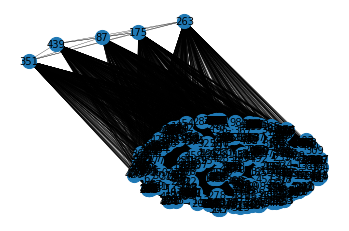

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [22]:
v = Gabs.number_of_nodes()
Gabs.number_of_edges()

124750

In [11]:
#working on expression score(tweets_exp).....................................................................

In [12]:
#ignore
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
   
# # Create a SentimentIntensityAnalyzer object. 
# sid_obj = SentimentIntensityAnalyzer()
# score = []
# for text in org:
#     sentiment_dict = sid_obj.polarity_scores(text)
#     score.append(sentiment_dict['compound'])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 185
0 186
0 1

2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 121
3 122
3 123
3 124
3 125
3 126
3 127
3 128
3 129
3 130
3 131
3 132
3 133
3 134
3 135
3 136
3 137
3 138
3 139
3 140
3 141
3 142
3 143
3 144
3 145
3 146
3 147
3 148
3 149
3 150
3 151
3 152
3 153
3 154
3 155
3 156
3 157
3 158
3 159
3 160
3 161
3 162
3 163
3 1

5 428
5 429
5 430
5 431
5 432
5 433
5 434
5 435
5 436
5 437
5 438
5 440
5 441
5 442
5 443
5 444
5 445
5 446
5 447
5 448
5 449
5 450
5 451
5 452
5 453
5 454
5 455
5 456
5 457
5 458
5 459
5 460
5 461
5 462
5 463
5 464
5 465
5 466
5 467
5 468
5 469
5 470
5 471
5 472
5 473
5 474
5 475
5 476
5 477
5 478
5 479
5 480
5 481
5 482
5 483
5 484
5 485
5 486
5 487
5 488
5 489
5 490
5 491
5 492
5 493
5 494
5 495
5 496
5 497
5 498
5 499
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 84
6 85
6 86
6 88
6 89
6 90
6 91
6 92
6 93
6 94
6 95
6 96
6 97
6 98
6 99
6 100
6 101
6 102
6 103
6 104
6 105
6 106
6 107
6 108
6 109
6 110
6 111
6 112
6 113
6 114
6 115
6 116
6 117
6 118
6 1

8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 409
8 410
8 411
8 412
8 413
8 414
8 415
8 416
8 417
8 418
8 419
8 420
8 421
8 422
8 423
8 424
8 425
8 426
8 427
8 428
8 429
8 430
8 431
8 432
8 433
8 434
8 435
8 436
8 437
8 438
8 440
8 441
8 442
8 443
8 444
8 445
8 446
8 447
8 448
8 449
8 450
8 451
8 452
8 453
8 454
8 455
8 456
8 457
8 458
8 459
8 460
8 461
8 462
8 463
8 464
8 465
8 466
8 467
8 468
8 469
8 470
8 471
8 472
8 473
8 474
8 475
8 476
8 477
8 478
8 479
8 480
8 481
8 482
8 483
8 484
8 485
8 486
8 487
8 488
8 489
8 490
8 491
8 492
8 493
8 494
8 495
8 496
8 497
8 498
8 499
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
9 31
9 32
9 33
9 34
9 35
9 36
9 37
9 38
9 39
9 40
9 41
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9 49
9 50
9 51
9 52
9 53
9 54
9 55
9 56
9 57
9 58
9 59
9 60
9 61
9 62
9 63
9 64
9 65
9 66
9 67
9 68
9 69
9 70
9 71
9 72
9 73
9 74
9 75
9 76
9 77
9 78
9

11 237
11 238
11 239
11 240
11 241
11 242
11 243
11 244
11 245
11 246
11 247
11 248
11 249
11 250
11 251
11 252
11 253
11 254
11 255
11 256
11 257
11 258
11 259
11 260
11 261
11 262
11 264
11 265
11 266
11 267
11 268
11 269
11 270
11 271
11 272
11 273
11 274
11 275
11 276
11 277
11 278
11 279
11 280
11 281
11 282
11 283
11 284
11 285
11 286
11 287
11 288
11 289
11 290
11 291
11 292
11 293
11 294
11 295
11 296
11 297
11 298
11 299
11 300
11 301
11 302
11 303
11 304
11 305
11 306
11 307
11 308
11 309
11 310
11 311
11 312
11 313
11 314
11 315
11 316
11 317
11 318
11 319
11 320
11 321
11 322
11 323
11 324
11 325
11 326
11 327
11 328
11 329
11 330
11 331
11 332
11 333
11 334
11 335
11 336
11 337
11 338
11 339
11 340
11 341
11 342
11 343
11 344
11 345
11 346
11 347
11 348
11 349
11 350
11 352
11 353
11 354
11 355
11 356
11 357
11 358
11 359
11 360
11 361
11 362
11 363
11 364
11 365
11 366
11 367
11 368
11 369
11 370
11 371
11 372
11 373
11 374
11 375
11 376
11 377
11 378
11 379
11 380
11 381

14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 54
14 55
14 56
14 57
14 58
14 59
14 60
14 61
14 62
14 63
14 64
14 65
14 66
14 67
14 68
14 69
14 70
14 71
14 72
14 73
14 74
14 75
14 76
14 77
14 78
14 79
14 80
14 81
14 82
14 83
14 84
14 85
14 86
14 88
14 89
14 90
14 91
14 92
14 93
14 94
14 95
14 96
14 97
14 98
14 99
14 100
14 101
14 102
14 103
14 104
14 105
14 106
14 107
14 108
14 109
14 110
14 111
14 112
14 113
14 114
14 115
14 116
14 117
14 118
14 119
14 120
14 121
14 122
14 123
14 124
14 125
14 126
14 127
14 128
14 129
14 130
14 131
14 132
14 133
14 134
14 135
14 136
14 137
14 138
14 139
14 140
14 141
14 142
14 143
14 144
14 145
14 146
14 147
14 148
14 149
14 150
14 151
14 152
14 153
14 154
14 155
14 156
14 157
14 158
14 159
14 160
14 161
14 162
14 163
14 164
14 165
14 166
14 167
14 168
14 169
14 170
14 171
14 172
14 173
14 174
1

16 295
16 296
16 297
16 298
16 299
16 300
16 301
16 302
16 303
16 304
16 305
16 306
16 307
16 308
16 309
16 310
16 311
16 312
16 313
16 314
16 315
16 316
16 317
16 318
16 319
16 320
16 321
16 322
16 323
16 324
16 325
16 326
16 327
16 328
16 329
16 330
16 331
16 332
16 333
16 334
16 335
16 336
16 337
16 338
16 339
16 340
16 341
16 342
16 343
16 344
16 345
16 346
16 347
16 348
16 349
16 350
16 352
16 353
16 354
16 355
16 356
16 357
16 358
16 359
16 360
16 361
16 362
16 363
16 364
16 365
16 366
16 367
16 368
16 369
16 370
16 371
16 372
16 373
16 374
16 375
16 376
16 377
16 378
16 379
16 380
16 381
16 382
16 383
16 384
16 385
16 386
16 387
16 388
16 389
16 390
16 391
16 392
16 393
16 394
16 395
16 396
16 397
16 398
16 399
16 400
16 401
16 402
16 403
16 404
16 405
16 406
16 407
16 408
16 409
16 410
16 411
16 412
16 413
16 414
16 415
16 416
16 417
16 418
16 419
16 420
16 421
16 422
16 423
16 424
16 425
16 426
16 427
16 428
16 429
16 430
16 431
16 432
16 433
16 434
16 435
16 436
16 437
16 438

19 76
19 77
19 78
19 79
19 80
19 81
19 82
19 83
19 84
19 85
19 86
19 88
19 89
19 90
19 91
19 92
19 93
19 94
19 95
19 96
19 97
19 98
19 99
19 100
19 101
19 102
19 103
19 104
19 105
19 106
19 107
19 108
19 109
19 110
19 111
19 112
19 113
19 114
19 115
19 116
19 117
19 118
19 119
19 120
19 121
19 122
19 123
19 124
19 125
19 126
19 127
19 128
19 129
19 130
19 131
19 132
19 133
19 134
19 135
19 136
19 137
19 138
19 139
19 140
19 141
19 142
19 143
19 144
19 145
19 146
19 147
19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19 165
19 166
19 167
19 168
19 169
19 170
19 171
19 172
19 173
19 174
19 176
19 177
19 178
19 179
19 180
19 181
19 182
19 183
19 184
19 185
19 186
19 187
19 188
19 189
19 190
19 191
19 192
19 193
19 194
19 195
19 196
19 197
19 198
19 199
19 200
19 201
19 202
19 203
19 204
19 205
19 206
19 207
19 208
19 209
19 210
19 211
19 212
19 213
19 214
19 215
19 216
19 217
19 218
19 219
19 220
19 221
19 222
19 223
1

21 339
21 340
21 341
21 342
21 343
21 344
21 345
21 346
21 347
21 348
21 349
21 350
21 352
21 353
21 354
21 355
21 356
21 357
21 358
21 359
21 360
21 361
21 362
21 363
21 364
21 365
21 366
21 367
21 368
21 369
21 370
21 371
21 372
21 373
21 374
21 375
21 376
21 377
21 378
21 379
21 380
21 381
21 382
21 383
21 384
21 385
21 386
21 387
21 388
21 389
21 390
21 391
21 392
21 393
21 394
21 395
21 396
21 397
21 398
21 399
21 400
21 401
21 402
21 403
21 404
21 405
21 406
21 407
21 408
21 409
21 410
21 411
21 412
21 413
21 414
21 415
21 416
21 417
21 418
21 419
21 420
21 421
21 422
21 423
21 424
21 425
21 426
21 427
21 428
21 429
21 430
21 431
21 432
21 433
21 434
21 435
21 436
21 437
21 438
21 440
21 441
21 442
21 443
21 444
21 445
21 446
21 447
21 448
21 449
21 450
21 451
21 452
21 453
21 454
21 455
21 456
21 457
21 458
21 459
21 460
21 461
21 462
21 463
21 464
21 465
21 466
21 467
21 468
21 469
21 470
21 471
21 472
21 473
21 474
21 475
21 476
21 477
21 478
21 479
21 480
21 481
21 482
21 483

24 137
24 138
24 139
24 140
24 141
24 142
24 143
24 144
24 145
24 146
24 147
24 148
24 149
24 150
24 151
24 152
24 153
24 154
24 155
24 156
24 157
24 158
24 159
24 160
24 161
24 162
24 163
24 164
24 165
24 166
24 167
24 168
24 169
24 170
24 171
24 172
24 173
24 174
24 176
24 177
24 178
24 179
24 180
24 181
24 182
24 183
24 184
24 185
24 186
24 187
24 188
24 189
24 190
24 191
24 192
24 193
24 194
24 195
24 196
24 197
24 198
24 199
24 200
24 201
24 202
24 203
24 204
24 205
24 206
24 207
24 208
24 209
24 210
24 211
24 212
24 213
24 214
24 215
24 216
24 217
24 218
24 219
24 220
24 221
24 222
24 223
24 224
24 225
24 226
24 227
24 228
24 229
24 230
24 231
24 232
24 233
24 234
24 235
24 236
24 237
24 238
24 239
24 240
24 241
24 242
24 243
24 244
24 245
24 246
24 247
24 248
24 249
24 250
24 251
24 252
24 253
24 254
24 255
24 256
24 257
24 258
24 259
24 260
24 261
24 262
24 264
24 265
24 266
24 267
24 268
24 269
24 270
24 271
24 272
24 273
24 274
24 275
24 276
24 277
24 278
24 279
24 280
24 281

26 395
26 396
26 397
26 398
26 399
26 400
26 401
26 402
26 403
26 404
26 405
26 406
26 407
26 408
26 409
26 410
26 411
26 412
26 413
26 414
26 415
26 416
26 417
26 418
26 419
26 420
26 421
26 422
26 423
26 424
26 425
26 426
26 427
26 428
26 429
26 430
26 431
26 432
26 433
26 434
26 435
26 436
26 437
26 438
26 440
26 441
26 442
26 443
26 444
26 445
26 446
26 447
26 448
26 449
26 450
26 451
26 452
26 453
26 454
26 455
26 456
26 457
26 458
26 459
26 460
26 461
26 462
26 463
26 464
26 465
26 466
26 467
26 468
26 469
26 470
26 471
26 472
26 473
26 474
26 475
26 476
26 477
26 478
26 479
26 480
26 481
26 482
26 483
26 484
26 485
26 486
26 487
26 488
26 489
26 490
26 491
26 492
26 493
26 494
26 495
26 496
26 497
26 498
26 499
27 28
27 29
27 30
27 31
27 32
27 33
27 34
27 35
27 36
27 37
27 38
27 39
27 40
27 41
27 42
27 43
27 44
27 45
27 46
27 47
27 48
27 49
27 50
27 51
27 52
27 53
27 54
27 55
27 56
27 57
27 58
27 59
27 60
27 61
27 62
27 63
27 64
27 65
27 66
27 67
27 68
27 69
27 70
27 71
27 72
27

29 228
29 229
29 230
29 231
29 232
29 233
29 234
29 235
29 236
29 237
29 238
29 239
29 240
29 241
29 242
29 243
29 244
29 245
29 246
29 247
29 248
29 249
29 250
29 251
29 252
29 253
29 254
29 255
29 256
29 257
29 258
29 259
29 260
29 261
29 262
29 264
29 265
29 266
29 267
29 268
29 269
29 270
29 271
29 272
29 273
29 274
29 275
29 276
29 277
29 278
29 279
29 280
29 281
29 282
29 283
29 284
29 285
29 286
29 287
29 288
29 289
29 290
29 291
29 292
29 293
29 294
29 295
29 296
29 297
29 298
29 299
29 300
29 301
29 302
29 303
29 304
29 305
29 306
29 307
29 308
29 309
29 310
29 311
29 312
29 313
29 314
29 315
29 316
29 317
29 318
29 319
29 320
29 321
29 322
29 323
29 324
29 325
29 326
29 327
29 328
29 329
29 330
29 331
29 332
29 333
29 334
29 335
29 336
29 337
29 338
29 339
29 340
29 341
29 342
29 343
29 344
29 345
29 346
29 347
29 348
29 349
29 350
29 352
29 353
29 354
29 355
29 356
29 357
29 358
29 359
29 360
29 361
29 362
29 363
29 364
29 365
29 366
29 367
29 368
29 369
29 370
29 371
29 372

32 65
32 66
32 67
32 68
32 69
32 70
32 71
32 72
32 73
32 74
32 75
32 76
32 77
32 78
32 79
32 80
32 81
32 82
32 83
32 84
32 85
32 86
32 88
32 89
32 90
32 91
32 92
32 93
32 94
32 95
32 96
32 97
32 98
32 99
32 100
32 101
32 102
32 103
32 104
32 105
32 106
32 107
32 108
32 109
32 110
32 111
32 112
32 113
32 114
32 115
32 116
32 117
32 118
32 119
32 120
32 121
32 122
32 123
32 124
32 125
32 126
32 127
32 128
32 129
32 130
32 131
32 132
32 133
32 134
32 135
32 136
32 137
32 138
32 139
32 140
32 141
32 142
32 143
32 144
32 145
32 146
32 147
32 148
32 149
32 150
32 151
32 152
32 153
32 154
32 155
32 156
32 157
32 158
32 159
32 160
32 161
32 162
32 163
32 164
32 165
32 166
32 167
32 168
32 169
32 170
32 171
32 172
32 173
32 174
32 176
32 177
32 178
32 179
32 180
32 181
32 182
32 183
32 184
32 185
32 186
32 187
32 188
32 189
32 190
32 191
32 192
32 193
32 194
32 195
32 196
32 197
32 198
32 199
32 200
32 201
32 202
32 203
32 204
32 205
32 206
32 207
32 208
32 209
32 210
32 211
32 212
32 213
32 21

34 348
34 349
34 350
34 352
34 353
34 354
34 355
34 356
34 357
34 358
34 359
34 360
34 361
34 362
34 363
34 364
34 365
34 366
34 367
34 368
34 369
34 370
34 371
34 372
34 373
34 374
34 375
34 376
34 377
34 378
34 379
34 380
34 381
34 382
34 383
34 384
34 385
34 386
34 387
34 388
34 389
34 390
34 391
34 392
34 393
34 394
34 395
34 396
34 397
34 398
34 399
34 400
34 401
34 402
34 403
34 404
34 405
34 406
34 407
34 408
34 409
34 410
34 411
34 412
34 413
34 414
34 415
34 416
34 417
34 418
34 419
34 420
34 421
34 422
34 423
34 424
34 425
34 426
34 427
34 428
34 429
34 430
34 431
34 432
34 433
34 434
34 435
34 436
34 437
34 438
34 440
34 441
34 442
34 443
34 444
34 445
34 446
34 447
34 448
34 449
34 450
34 451
34 452
34 453
34 454
34 455
34 456
34 457
34 458
34 459
34 460
34 461
34 462
34 463
34 464
34 465
34 466
34 467
34 468
34 469
34 470
34 471
34 472
34 473
34 474
34 475
34 476
34 477
34 478
34 479
34 480
34 481
34 482
34 483
34 484
34 485
34 486
34 487
34 488
34 489
34 490
34 491
34 492

37 196
37 197
37 198
37 199
37 200
37 201
37 202
37 203
37 204
37 205
37 206
37 207
37 208
37 209
37 210
37 211
37 212
37 213
37 214
37 215
37 216
37 217
37 218
37 219
37 220
37 221
37 222
37 223
37 224
37 225
37 226
37 227
37 228
37 229
37 230
37 231
37 232
37 233
37 234
37 235
37 236
37 237
37 238
37 239
37 240
37 241
37 242
37 243
37 244
37 245
37 246
37 247
37 248
37 249
37 250
37 251
37 252
37 253
37 254
37 255
37 256
37 257
37 258
37 259
37 260
37 261
37 262
37 264
37 265
37 266
37 267
37 268
37 269
37 270
37 271
37 272
37 273
37 274
37 275
37 276
37 277
37 278
37 279
37 280
37 281
37 282
37 283
37 284
37 285
37 286
37 287
37 288
37 289
37 290
37 291
37 292
37 293
37 294
37 295
37 296
37 297
37 298
37 299
37 300
37 301
37 302
37 303
37 304
37 305
37 306
37 307
37 308
37 309
37 310
37 311
37 312
37 313
37 314
37 315
37 316
37 317
37 318
37 319
37 320
37 321
37 322
37 323
37 324
37 325
37 326
37 327
37 328
37 329
37 330
37 331
37 332
37 333
37 334
37 335
37 336
37 337
37 338
37 339

39 496
39 497
39 498
39 499
40 41
40 42
40 43
40 44
40 45
40 46
40 47
40 48
40 49
40 50
40 51
40 52
40 53
40 54
40 55
40 56
40 57
40 58
40 59
40 60
40 61
40 62
40 63
40 64
40 65
40 66
40 67
40 68
40 69
40 70
40 71
40 72
40 73
40 74
40 75
40 76
40 77
40 78
40 79
40 80
40 81
40 82
40 83
40 84
40 85
40 86
40 88
40 89
40 90
40 91
40 92
40 93
40 94
40 95
40 96
40 97
40 98
40 99
40 100
40 101
40 102
40 103
40 104
40 105
40 106
40 107
40 108
40 109
40 110
40 111
40 112
40 113
40 114
40 115
40 116
40 117
40 118
40 119
40 120
40 121
40 122
40 123
40 124
40 125
40 126
40 127
40 128
40 129
40 130
40 131
40 132
40 133
40 134
40 135
40 136
40 137
40 138
40 139
40 140
40 141
40 142
40 143
40 144
40 145
40 146
40 147
40 148
40 149
40 150
40 151
40 152
40 153
40 154
40 155
40 156
40 157
40 158
40 159
40 160
40 161
40 162
40 163
40 164
40 165
40 166
40 167
40 168
40 169
40 170
40 171
40 172
40 173
40 174
40 176
40 177
40 178
40 179
40 180
40 181
40 182
40 183
40 184
40 185
40 186
40 187
40 188
40 189
4

42 345
42 346
42 347
42 348
42 349
42 350
42 352
42 353
42 354
42 355
42 356
42 357
42 358
42 359
42 360
42 361
42 362
42 363
42 364
42 365
42 366
42 367
42 368
42 369
42 370
42 371
42 372
42 373
42 374
42 375
42 376
42 377
42 378
42 379
42 380
42 381
42 382
42 383
42 384
42 385
42 386
42 387
42 388
42 389
42 390
42 391
42 392
42 393
42 394
42 395
42 396
42 397
42 398
42 399
42 400
42 401
42 402
42 403
42 404
42 405
42 406
42 407
42 408
42 409
42 410
42 411
42 412
42 413
42 414
42 415
42 416
42 417
42 418
42 419
42 420
42 421
42 422
42 423
42 424
42 425
42 426
42 427
42 428
42 429
42 430
42 431
42 432
42 433
42 434
42 435
42 436
42 437
42 438
42 440
42 441
42 442
42 443
42 444
42 445
42 446
42 447
42 448
42 449
42 450
42 451
42 452
42 453
42 454
42 455
42 456
42 457
42 458
42 459
42 460
42 461
42 462
42 463
42 464
42 465
42 466
42 467
42 468
42 469
42 470
42 471
42 472
42 473
42 474
42 475
42 476
42 477
42 478
42 479
42 480
42 481
42 482
42 483
42 484
42 485
42 486
42 487
42 488
42 489

45 211
45 212
45 213
45 214
45 215
45 216
45 217
45 218
45 219
45 220
45 221
45 222
45 223
45 224
45 225
45 226
45 227
45 228
45 229
45 230
45 231
45 232
45 233
45 234
45 235
45 236
45 237
45 238
45 239
45 240
45 241
45 242
45 243
45 244
45 245
45 246
45 247
45 248
45 249
45 250
45 251
45 252
45 253
45 254
45 255
45 256
45 257
45 258
45 259
45 260
45 261
45 262
45 264
45 265
45 266
45 267
45 268
45 269
45 270
45 271
45 272
45 273
45 274
45 275
45 276
45 277
45 278
45 279
45 280
45 281
45 282
45 283
45 284
45 285
45 286
45 287
45 288
45 289
45 290
45 291
45 292
45 293
45 294
45 295
45 296
45 297
45 298
45 299
45 300
45 301
45 302
45 303
45 304
45 305
45 306
45 307
45 308
45 309
45 310
45 311
45 312
45 313
45 314
45 315
45 316
45 317
45 318
45 319
45 320
45 321
45 322
45 323
45 324
45 325
45 326
45 327
45 328
45 329
45 330
45 331
45 332
45 333
45 334
45 335
45 336
45 337
45 338
45 339
45 340
45 341
45 342
45 343
45 344
45 345
45 346
45 347
45 348
45 349
45 350
45 352
45 353
45 354
45 355

48 75
48 76
48 77
48 78
48 79
48 80
48 81
48 82
48 83
48 84
48 85
48 86
48 88
48 89
48 90
48 91
48 92
48 93
48 94
48 95
48 96
48 97
48 98
48 99
48 100
48 101
48 102
48 103
48 104
48 105
48 106
48 107
48 108
48 109
48 110
48 111
48 112
48 113
48 114
48 115
48 116
48 117
48 118
48 119
48 120
48 121
48 122
48 123
48 124
48 125
48 126
48 127
48 128
48 129
48 130
48 131
48 132
48 133
48 134
48 135
48 136
48 137
48 138
48 139
48 140
48 141
48 142
48 143
48 144
48 145
48 146
48 147
48 148
48 149
48 150
48 151
48 152
48 153
48 154
48 155
48 156
48 157
48 158
48 159
48 160
48 161
48 162
48 163
48 164
48 165
48 166
48 167
48 168
48 169
48 170
48 171
48 172
48 173
48 174
48 176
48 177
48 178
48 179
48 180
48 181
48 182
48 183
48 184
48 185
48 186
48 187
48 188
48 189
48 190
48 191
48 192
48 193
48 194
48 195
48 196
48 197
48 198
48 199
48 200
48 201
48 202
48 203
48 204
48 205
48 206
48 207
48 208
48 209
48 210
48 211
48 212
48 213
48 214
48 215
48 216
48 217
48 218
48 219
48 220
48 221
48 222
48

50 415
50 416
50 417
50 418
50 419
50 420
50 421
50 422
50 423
50 424
50 425
50 426
50 427
50 428
50 429
50 430
50 431
50 432
50 433
50 434
50 435
50 436
50 437
50 438
50 440
50 441
50 442
50 443
50 444
50 445
50 446
50 447
50 448
50 449
50 450
50 451
50 452
50 453
50 454
50 455
50 456
50 457
50 458
50 459
50 460
50 461
50 462
50 463
50 464
50 465
50 466
50 467
50 468
50 469
50 470
50 471
50 472
50 473
50 474
50 475
50 476
50 477
50 478
50 479
50 480
50 481
50 482
50 483
50 484
50 485
50 486
50 487
50 488
50 489
50 490
50 491
50 492
50 493
50 494
50 495
50 496
50 497
50 498
50 499
51 52
51 53
51 54
51 55
51 56
51 57
51 58
51 59
51 60
51 61
51 62
51 63
51 64
51 65
51 66
51 67
51 68
51 69
51 70
51 71
51 72
51 73
51 74
51 75
51 76
51 77
51 78
51 79
51 80
51 81
51 82
51 83
51 84
51 85
51 86
51 88
51 89
51 90
51 91
51 92
51 93
51 94
51 95
51 96
51 97
51 98
51 99
51 100
51 101
51 102
51 103
51 104
51 105
51 106
51 107
51 108
51 109
51 110
51 111
51 112
51 113
51 114
51 115
51 116
51 117
51 1

53 283
53 284
53 285
53 286
53 287
53 288
53 289
53 290
53 291
53 292
53 293
53 294
53 295
53 296
53 297
53 298
53 299
53 300
53 301
53 302
53 303
53 304
53 305
53 306
53 307
53 308
53 309
53 310
53 311
53 312
53 313
53 314
53 315
53 316
53 317
53 318
53 319
53 320
53 321
53 322
53 323
53 324
53 325
53 326
53 327
53 328
53 329
53 330
53 331
53 332
53 333
53 334
53 335
53 336
53 337
53 338
53 339
53 340
53 341
53 342
53 343
53 344
53 345
53 346
53 347
53 348
53 349
53 350
53 352
53 353
53 354
53 355
53 356
53 357
53 358
53 359
53 360
53 361
53 362
53 363
53 364
53 365
53 366
53 367
53 368
53 369
53 370
53 371
53 372
53 373
53 374
53 375
53 376
53 377
53 378
53 379
53 380
53 381
53 382
53 383
53 384
53 385
53 386
53 387
53 388
53 389
53 390
53 391
53 392
53 393
53 394
53 395
53 396
53 397
53 398
53 399
53 400
53 401
53 402
53 403
53 404
53 405
53 406
53 407
53 408
53 409
53 410
53 411
53 412
53 413
53 414
53 415
53 416
53 417
53 418
53 419
53 420
53 421
53 422
53 423
53 424
53 425
53 426

56 160
56 161
56 162
56 163
56 164
56 165
56 166
56 167
56 168
56 169
56 170
56 171
56 172
56 173
56 174
56 176
56 177
56 178
56 179
56 180
56 181
56 182
56 183
56 184
56 185
56 186
56 187
56 188
56 189
56 190
56 191
56 192
56 193
56 194
56 195
56 196
56 197
56 198
56 199
56 200
56 201
56 202
56 203
56 204
56 205
56 206
56 207
56 208
56 209
56 210
56 211
56 212
56 213
56 214
56 215
56 216
56 217
56 218
56 219
56 220
56 221
56 222
56 223
56 224
56 225
56 226
56 227
56 228
56 229
56 230
56 231
56 232
56 233
56 234
56 235
56 236
56 237
56 238
56 239
56 240
56 241
56 242
56 243
56 244
56 245
56 246
56 247
56 248
56 249
56 250
56 251
56 252
56 253
56 254
56 255
56 256
56 257
56 258
56 259
56 260
56 261
56 262
56 264
56 265
56 266
56 267
56 268
56 269
56 270
56 271
56 272
56 273
56 274
56 275
56 276
56 277
56 278
56 279
56 280
56 281
56 282
56 283
56 284
56 285
56 286
56 287
56 288
56 289
56 290
56 291
56 292
56 293
56 294
56 295
56 296
56 297
56 298
56 299
56 300
56 301
56 302
56 303
56 304

58 475
58 476
58 477
58 478
58 479
58 480
58 481
58 482
58 483
58 484
58 485
58 486
58 487
58 488
58 489
58 490
58 491
58 492
58 493
58 494
58 495
58 496
58 497
58 498
58 499
59 60
59 61
59 62
59 63
59 64
59 65
59 66
59 67
59 68
59 69
59 70
59 71
59 72
59 73
59 74
59 75
59 76
59 77
59 78
59 79
59 80
59 81
59 82
59 83
59 84
59 85
59 86
59 88
59 89
59 90
59 91
59 92
59 93
59 94
59 95
59 96
59 97
59 98
59 99
59 100
59 101
59 102
59 103
59 104
59 105
59 106
59 107
59 108
59 109
59 110
59 111
59 112
59 113
59 114
59 115
59 116
59 117
59 118
59 119
59 120
59 121
59 122
59 123
59 124
59 125
59 126
59 127
59 128
59 129
59 130
59 131
59 132
59 133
59 134
59 135
59 136
59 137
59 138
59 139
59 140
59 141
59 142
59 143
59 144
59 145
59 146
59 147
59 148
59 149
59 150
59 151
59 152
59 153
59 154
59 155
59 156
59 157
59 158
59 159
59 160
59 161
59 162
59 163
59 164
59 165
59 166
59 167
59 168
59 169
59 170
59 171
59 172
59 173
59 174
59 176
59 177
59 178
59 179
59 180
59 181
59 182
59 183
59 184
59 

61 364
61 365
61 366
61 367
61 368
61 369
61 370
61 371
61 372
61 373
61 374
61 375
61 376
61 377
61 378
61 379
61 380
61 381
61 382
61 383
61 384
61 385
61 386
61 387
61 388
61 389
61 390
61 391
61 392
61 393
61 394
61 395
61 396
61 397
61 398
61 399
61 400
61 401
61 402
61 403
61 404
61 405
61 406
61 407
61 408
61 409
61 410
61 411
61 412
61 413
61 414
61 415
61 416
61 417
61 418
61 419
61 420
61 421
61 422
61 423
61 424
61 425
61 426
61 427
61 428
61 429
61 430
61 431
61 432
61 433
61 434
61 435
61 436
61 437
61 438
61 440
61 441
61 442
61 443
61 444
61 445
61 446
61 447
61 448
61 449
61 450
61 451
61 452
61 453
61 454
61 455
61 456
61 457
61 458
61 459
61 460
61 461
61 462
61 463
61 464
61 465
61 466
61 467
61 468
61 469
61 470
61 471
61 472
61 473
61 474
61 475
61 476
61 477
61 478
61 479
61 480
61 481
61 482
61 483
61 484
61 485
61 486
61 487
61 488
61 489
61 490
61 491
61 492
61 493
61 494
61 495
61 496
61 497
61 498
61 499
62 63
62 64
62 65
62 66
62 67
62 68
62 69
62 70
62 71
6

64 256
64 257
64 258
64 259
64 260
64 261
64 262
64 264
64 265
64 266
64 267
64 268
64 269
64 270
64 271
64 272
64 273
64 274
64 275
64 276
64 277
64 278
64 279
64 280
64 281
64 282
64 283
64 284
64 285
64 286
64 287
64 288
64 289
64 290
64 291
64 292
64 293
64 294
64 295
64 296
64 297
64 298
64 299
64 300
64 301
64 302
64 303
64 304
64 305
64 306
64 307
64 308
64 309
64 310
64 311
64 312
64 313
64 314
64 315
64 316
64 317
64 318
64 319
64 320
64 321
64 322
64 323
64 324
64 325
64 326
64 327
64 328
64 329
64 330
64 331
64 332
64 333
64 334
64 335
64 336
64 337
64 338
64 339
64 340
64 341
64 342
64 343
64 344
64 345
64 346
64 347
64 348
64 349
64 350
64 352
64 353
64 354
64 355
64 356
64 357
64 358
64 359
64 360
64 361
64 362
64 363
64 364
64 365
64 366
64 367
64 368
64 369
64 370
64 371
64 372
64 373
64 374
64 375
64 376
64 377
64 378
64 379
64 380
64 381
64 382
64 383
64 384
64 385
64 386
64 387
64 388
64 389
64 390
64 391
64 392
64 393
64 394
64 395
64 396
64 397
64 398
64 399
64 400

67 190
67 191
67 192
67 193
67 194
67 195
67 196
67 197
67 198
67 199
67 200
67 201
67 202
67 203
67 204
67 205
67 206
67 207
67 208
67 209
67 210
67 211
67 212
67 213
67 214
67 215
67 216
67 217
67 218
67 219
67 220
67 221
67 222
67 223
67 224
67 225
67 226
67 227
67 228
67 229
67 230
67 231
67 232
67 233
67 234
67 235
67 236
67 237
67 238
67 239
67 240
67 241
67 242
67 243
67 244
67 245
67 246
67 247
67 248
67 249
67 250
67 251
67 252
67 253
67 254
67 255
67 256
67 257
67 258
67 259
67 260
67 261
67 262
67 264
67 265
67 266
67 267
67 268
67 269
67 270
67 271
67 272
67 273
67 274
67 275
67 276
67 277
67 278
67 279
67 280
67 281
67 282
67 283
67 284
67 285
67 286
67 287
67 288
67 289
67 290
67 291
67 292
67 293
67 294
67 295
67 296
67 297
67 298
67 299
67 300
67 301
67 302
67 303
67 304
67 305
67 306
67 307
67 308
67 309
67 310
67 311
67 312
67 313
67 314
67 315
67 316
67 317
67 318
67 319
67 320
67 321
67 322
67 323
67 324
67 325
67 326
67 327
67 328
67 329
67 330
67 331
67 332
67 333

70 100
70 101
70 102
70 103
70 104
70 105
70 106
70 107
70 108
70 109
70 110
70 111
70 112
70 113
70 114
70 115
70 116
70 117
70 118
70 119
70 120
70 121
70 122
70 123
70 124
70 125
70 126
70 127
70 128
70 129
70 130
70 131
70 132
70 133
70 134
70 135
70 136
70 137
70 138
70 139
70 140
70 141
70 142
70 143
70 144
70 145
70 146
70 147
70 148
70 149
70 150
70 151
70 152
70 153
70 154
70 155
70 156
70 157
70 158
70 159
70 160
70 161
70 162
70 163
70 164
70 165
70 166
70 167
70 168
70 169
70 170
70 171
70 172
70 173
70 174
70 176
70 177
70 178
70 179
70 180
70 181
70 182
70 183
70 184
70 185
70 186
70 187
70 188
70 189
70 190
70 191
70 192
70 193
70 194
70 195
70 196
70 197
70 198
70 199
70 200
70 201
70 202
70 203
70 204
70 205
70 206
70 207
70 208
70 209
70 210
70 211
70 212
70 213
70 214
70 215
70 216
70 217
70 218
70 219
70 220
70 221
70 222
70 223
70 224
70 225
70 226
70 227
70 228
70 229
70 230
70 231
70 232
70 233
70 234
70 235
70 236
70 237
70 238
70 239
70 240
70 241
70 242
70 243

72 451
72 452
72 453
72 454
72 455
72 456
72 457
72 458
72 459
72 460
72 461
72 462
72 463
72 464
72 465
72 466
72 467
72 468
72 469
72 470
72 471
72 472
72 473
72 474
72 475
72 476
72 477
72 478
72 479
72 480
72 481
72 482
72 483
72 484
72 485
72 486
72 487
72 488
72 489
72 490
72 491
72 492
72 493
72 494
72 495
72 496
72 497
72 498
72 499
73 74
73 75
73 76
73 77
73 78
73 79
73 80
73 81
73 82
73 83
73 84
73 85
73 86
73 88
73 89
73 90
73 91
73 92
73 93
73 94
73 95
73 96
73 97
73 98
73 99
73 100
73 101
73 102
73 103
73 104
73 105
73 106
73 107
73 108
73 109
73 110
73 111
73 112
73 113
73 114
73 115
73 116
73 117
73 118
73 119
73 120
73 121
73 122
73 123
73 124
73 125
73 126
73 127
73 128
73 129
73 130
73 131
73 132
73 133
73 134
73 135
73 136
73 137
73 138
73 139
73 140
73 141
73 142
73 143
73 144
73 145
73 146
73 147
73 148
73 149
73 150
73 151
73 152
73 153
73 154
73 155
73 156
73 157
73 158
73 159
73 160
73 161
73 162
73 163
73 164
73 165
73 166
73 167
73 168
73 169
73 170
73 171
73 

75 395
75 396
75 397
75 398
75 399
75 400
75 401
75 402
75 403
75 404
75 405
75 406
75 407
75 408
75 409
75 410
75 411
75 412
75 413
75 414
75 415
75 416
75 417
75 418
75 419
75 420
75 421
75 422
75 423
75 424
75 425
75 426
75 427
75 428
75 429
75 430
75 431
75 432
75 433
75 434
75 435
75 436
75 437
75 438
75 440
75 441
75 442
75 443
75 444
75 445
75 446
75 447
75 448
75 449
75 450
75 451
75 452
75 453
75 454
75 455
75 456
75 457
75 458
75 459
75 460
75 461
75 462
75 463
75 464
75 465
75 466
75 467
75 468
75 469
75 470
75 471
75 472
75 473
75 474
75 475
75 476
75 477
75 478
75 479
75 480
75 481
75 482
75 483
75 484
75 485
75 486
75 487
75 488
75 489
75 490
75 491
75 492
75 493
75 494
75 495
75 496
75 497
75 498
75 499
76 77
76 78
76 79
76 80
76 81
76 82
76 83
76 84
76 85
76 86
76 88
76 89
76 90
76 91
76 92
76 93
76 94
76 95
76 96
76 97
76 98
76 99
76 100
76 101
76 102
76 103
76 104
76 105
76 106
76 107
76 108
76 109
76 110
76 111
76 112
76 113
76 114
76 115
76 116
76 117
76 118
76 119


78 338
78 339
78 340
78 341
78 342
78 343
78 344
78 345
78 346
78 347
78 348
78 349
78 350
78 352
78 353
78 354
78 355
78 356
78 357
78 358
78 359
78 360
78 361
78 362
78 363
78 364
78 365
78 366
78 367
78 368
78 369
78 370
78 371
78 372
78 373
78 374
78 375
78 376
78 377
78 378
78 379
78 380
78 381
78 382
78 383
78 384
78 385
78 386
78 387
78 388
78 389
78 390
78 391
78 392
78 393
78 394
78 395
78 396
78 397
78 398
78 399
78 400
78 401
78 402
78 403
78 404
78 405
78 406
78 407
78 408
78 409
78 410
78 411
78 412
78 413
78 414
78 415
78 416
78 417
78 418
78 419
78 420
78 421
78 422
78 423
78 424
78 425
78 426
78 427
78 428
78 429
78 430
78 431
78 432
78 433
78 434
78 435
78 436
78 437
78 438
78 440
78 441
78 442
78 443
78 444
78 445
78 446
78 447
78 448
78 449
78 450
78 451
78 452
78 453
78 454
78 455
78 456
78 457
78 458
78 459
78 460
78 461
78 462
78 463
78 464
78 465
78 466
78 467
78 468
78 469
78 470
78 471
78 472
78 473
78 474
78 475
78 476
78 477
78 478
78 479
78 480
78 481
78 482

81 309
81 310
81 311
81 312
81 313
81 314
81 315
81 316
81 317
81 318
81 319
81 320
81 321
81 322
81 323
81 324
81 325
81 326
81 327
81 328
81 329
81 330
81 331
81 332
81 333
81 334
81 335
81 336
81 337
81 338
81 339
81 340
81 341
81 342
81 343
81 344
81 345
81 346
81 347
81 348
81 349
81 350
81 352
81 353
81 354
81 355
81 356
81 357
81 358
81 359
81 360
81 361
81 362
81 363
81 364
81 365
81 366
81 367
81 368
81 369
81 370
81 371
81 372
81 373
81 374
81 375
81 376
81 377
81 378
81 379
81 380
81 381
81 382
81 383
81 384
81 385
81 386
81 387
81 388
81 389
81 390
81 391
81 392
81 393
81 394
81 395
81 396
81 397
81 398
81 399
81 400
81 401
81 402
81 403
81 404
81 405
81 406
81 407
81 408
81 409
81 410
81 411
81 412
81 413
81 414
81 415
81 416
81 417
81 418
81 419
81 420
81 421
81 422
81 423
81 424
81 425
81 426
81 427
81 428
81 429
81 430
81 431
81 432
81 433
81 434
81 435
81 436
81 437
81 438
81 440
81 441
81 442
81 443
81 444
81 445
81 446
81 447
81 448
81 449
81 450
81 451
81 452
81 453

84 294
84 295
84 296
84 297
84 298
84 299
84 300
84 301
84 302
84 303
84 304
84 305
84 306
84 307
84 308
84 309
84 310
84 311
84 312
84 313
84 314
84 315
84 316
84 317
84 318
84 319
84 320
84 321
84 322
84 323
84 324
84 325
84 326
84 327
84 328
84 329
84 330
84 331
84 332
84 333
84 334
84 335
84 336
84 337
84 338
84 339
84 340
84 341
84 342
84 343
84 344
84 345
84 346
84 347
84 348
84 349
84 350
84 352
84 353
84 354
84 355
84 356
84 357
84 358
84 359
84 360
84 361
84 362
84 363
84 364
84 365
84 366
84 367
84 368
84 369
84 370
84 371
84 372
84 373
84 374
84 375
84 376
84 377
84 378
84 379
84 380
84 381
84 382
84 383
84 384
84 385
84 386
84 387
84 388
84 389
84 390
84 391
84 392
84 393
84 394
84 395
84 396
84 397
84 398
84 399
84 400
84 401
84 402
84 403
84 404
84 405
84 406
84 407
84 408
84 409
84 410
84 411
84 412
84 413
84 414
84 415
84 416
84 417
84 418
84 419
84 420
84 421
84 422
84 423
84 424
84 425
84 426
84 427
84 428
84 429
84 430
84 431
84 432
84 433
84 434
84 435
84 436
84 437

88 268
88 269
88 270
88 271
88 272
88 273
88 274
88 275
88 276
88 277
88 278
88 279
88 280
88 281
88 282
88 283
88 284
88 285
88 286
88 287
88 288
88 289
88 290
88 291
88 292
88 293
88 294
88 295
88 296
88 297
88 298
88 299
88 300
88 301
88 302
88 303
88 304
88 305
88 306
88 307
88 308
88 309
88 310
88 311
88 312
88 313
88 314
88 315
88 316
88 317
88 318
88 319
88 320
88 321
88 322
88 323
88 324
88 325
88 326
88 327
88 328
88 329
88 330
88 331
88 332
88 333
88 334
88 335
88 336
88 337
88 338
88 339
88 340
88 341
88 342
88 343
88 344
88 345
88 346
88 347
88 348
88 349
88 350
88 352
88 353
88 354
88 355
88 356
88 357
88 358
88 359
88 360
88 361
88 362
88 363
88 364
88 365
88 366
88 367
88 368
88 369
88 370
88 371
88 372
88 373
88 374
88 375
88 376
88 377
88 378
88 379
88 380
88 381
88 382
88 383
88 384
88 385
88 386
88 387
88 388
88 389
88 390
88 391
88 392
88 393
88 394
88 395
88 396
88 397
88 398
88 399
88 400
88 401
88 402
88 403
88 404
88 405
88 406
88 407
88 408
88 409
88 410
88 411

91 235
91 236
91 237
91 238
91 239
91 240
91 241
91 242
91 243
91 244
91 245
91 246
91 247
91 248
91 249
91 250
91 251
91 252
91 253
91 254
91 255
91 256
91 257
91 258
91 259
91 260
91 261
91 262
91 264
91 265
91 266
91 267
91 268
91 269
91 270
91 271
91 272
91 273
91 274
91 275
91 276
91 277
91 278
91 279
91 280
91 281
91 282
91 283
91 284
91 285
91 286
91 287
91 288
91 289
91 290
91 291
91 292
91 293
91 294
91 295
91 296
91 297
91 298
91 299
91 300
91 301
91 302
91 303
91 304
91 305
91 306
91 307
91 308
91 309
91 310
91 311
91 312
91 313
91 314
91 315
91 316
91 317
91 318
91 319
91 320
91 321
91 322
91 323
91 324
91 325
91 326
91 327
91 328
91 329
91 330
91 331
91 332
91 333
91 334
91 335
91 336
91 337
91 338
91 339
91 340
91 341
91 342
91 343
91 344
91 345
91 346
91 347
91 348
91 349
91 350
91 352
91 353
91 354
91 355
91 356
91 357
91 358
91 359
91 360
91 361
91 362
91 363
91 364
91 365
91 366
91 367
91 368
91 369
91 370
91 371
91 372
91 373
91 374
91 375
91 376
91 377
91 378
91 379

94 235
94 236
94 237
94 238
94 239
94 240
94 241
94 242
94 243
94 244
94 245
94 246
94 247
94 248
94 249
94 250
94 251
94 252
94 253
94 254
94 255
94 256
94 257
94 258
94 259
94 260
94 261
94 262
94 264
94 265
94 266
94 267
94 268
94 269
94 270
94 271
94 272
94 273
94 274
94 275
94 276
94 277
94 278
94 279
94 280
94 281
94 282
94 283
94 284
94 285
94 286
94 287
94 288
94 289
94 290
94 291
94 292
94 293
94 294
94 295
94 296
94 297
94 298
94 299
94 300
94 301
94 302
94 303
94 304
94 305
94 306
94 307
94 308
94 309
94 310
94 311
94 312
94 313
94 314
94 315
94 316
94 317
94 318
94 319
94 320
94 321
94 322
94 323
94 324
94 325
94 326
94 327
94 328
94 329
94 330
94 331
94 332
94 333
94 334
94 335
94 336
94 337
94 338
94 339
94 340
94 341
94 342
94 343
94 344
94 345
94 346
94 347
94 348
94 349
94 350
94 352
94 353
94 354
94 355
94 356
94 357
94 358
94 359
94 360
94 361
94 362
94 363
94 364
94 365
94 366
94 367
94 368
94 369
94 370
94 371
94 372
94 373
94 374
94 375
94 376
94 377
94 378
94 379

97 250
97 251
97 252
97 253
97 254
97 255
97 256
97 257
97 258
97 259
97 260
97 261
97 262
97 264
97 265
97 266
97 267
97 268
97 269
97 270
97 271
97 272
97 273
97 274
97 275
97 276
97 277
97 278
97 279
97 280
97 281
97 282
97 283
97 284
97 285
97 286
97 287
97 288
97 289
97 290
97 291
97 292
97 293
97 294
97 295
97 296
97 297
97 298
97 299
97 300
97 301
97 302
97 303
97 304
97 305
97 306
97 307
97 308
97 309
97 310
97 311
97 312
97 313
97 314
97 315
97 316
97 317
97 318
97 319
97 320
97 321
97 322
97 323
97 324
97 325
97 326
97 327
97 328
97 329
97 330
97 331
97 332
97 333
97 334
97 335
97 336
97 337
97 338
97 339
97 340
97 341
97 342
97 343
97 344
97 345
97 346
97 347
97 348
97 349
97 350
97 352
97 353
97 354
97 355
97 356
97 357
97 358
97 359
97 360
97 361
97 362
97 363
97 364
97 365
97 366
97 367
97 368
97 369
97 370
97 371
97 372
97 373
97 374
97 375
97 376
97 377
97 378
97 379
97 380
97 381
97 382
97 383
97 384
97 385
97 386
97 387
97 388
97 389
97 390
97 391
97 392
97 393
97 394

100 255
100 256
100 257
100 258
100 259
100 260
100 261
100 262
100 264
100 265
100 266
100 267
100 268
100 269
100 270
100 271
100 272
100 273
100 274
100 275
100 276
100 277
100 278
100 279
100 280
100 281
100 282
100 283
100 284
100 285
100 286
100 287
100 288
100 289
100 290
100 291
100 292
100 293
100 294
100 295
100 296
100 297
100 298
100 299
100 300
100 301
100 302
100 303
100 304
100 305
100 306
100 307
100 308
100 309
100 310
100 311
100 312
100 313
100 314
100 315
100 316
100 317
100 318
100 319
100 320
100 321
100 322
100 323
100 324
100 325
100 326
100 327
100 328
100 329
100 330
100 331
100 332
100 333
100 334
100 335
100 336
100 337
100 338
100 339
100 340
100 341
100 342
100 343
100 344
100 345
100 346
100 347
100 348
100 349
100 350
100 352
100 353
100 354
100 355
100 356
100 357
100 358
100 359
100 360
100 361
100 362
100 363
100 364
100 365
100 366
100 367
100 368
100 369
100 370
100 371
100 372
100 373
100 374
100 375
100 376
100 377
100 378
100 379
100 380
100 381


103 124
103 125
103 126
103 127
103 128
103 129
103 130
103 131
103 132
103 133
103 134
103 135
103 136
103 137
103 138
103 139
103 140
103 141
103 142
103 143
103 144
103 145
103 146
103 147
103 148
103 149
103 150
103 151
103 152
103 153
103 154
103 155
103 156
103 157
103 158
103 159
103 160
103 161
103 162
103 163
103 164
103 165
103 166
103 167
103 168
103 169
103 170
103 171
103 172
103 173
103 174
103 176
103 177
103 178
103 179
103 180
103 181
103 182
103 183
103 184
103 185
103 186
103 187
103 188
103 189
103 190
103 191
103 192
103 193
103 194
103 195
103 196
103 197
103 198
103 199
103 200
103 201
103 202
103 203
103 204
103 205
103 206
103 207
103 208
103 209
103 210
103 211
103 212
103 213
103 214
103 215
103 216
103 217
103 218
103 219
103 220
103 221
103 222
103 223
103 224
103 225
103 226
103 227
103 228
103 229
103 230
103 231
103 232
103 233
103 234
103 235
103 236
103 237
103 238
103 239
103 240
103 241
103 242
103 243
103 244
103 245
103 246
103 247
103 248
103 249


105 394
105 395
105 396
105 397
105 398
105 399
105 400
105 401
105 402
105 403
105 404
105 405
105 406
105 407
105 408
105 409
105 410
105 411
105 412
105 413
105 414
105 415
105 416
105 417
105 418
105 419
105 420
105 421
105 422
105 423
105 424
105 425
105 426
105 427
105 428
105 429
105 430
105 431
105 432
105 433
105 434
105 435
105 436
105 437
105 438
105 440
105 441
105 442
105 443
105 444
105 445
105 446
105 447
105 448
105 449
105 450
105 451
105 452
105 453
105 454
105 455
105 456
105 457
105 458
105 459
105 460
105 461
105 462
105 463
105 464
105 465
105 466
105 467
105 468
105 469
105 470
105 471
105 472
105 473
105 474
105 475
105 476
105 477
105 478
105 479
105 480
105 481
105 482
105 483
105 484
105 485
105 486
105 487
105 488
105 489
105 490
105 491
105 492
105 493
105 494
105 495
105 496
105 497
105 498
105 499
106 107
106 108
106 109
106 110
106 111
106 112
106 113
106 114
106 115
106 116
106 117
106 118
106 119
106 120
106 121
106 122
106 123
106 124
106 125
106 126


108 255
108 256
108 257
108 258
108 259
108 260
108 261
108 262
108 264
108 265
108 266
108 267
108 268
108 269
108 270
108 271
108 272
108 273
108 274
108 275
108 276
108 277
108 278
108 279
108 280
108 281
108 282
108 283
108 284
108 285
108 286
108 287
108 288
108 289
108 290
108 291
108 292
108 293
108 294
108 295
108 296
108 297
108 298
108 299
108 300
108 301
108 302
108 303
108 304
108 305
108 306
108 307
108 308
108 309
108 310
108 311
108 312
108 313
108 314
108 315
108 316
108 317
108 318
108 319
108 320
108 321
108 322
108 323
108 324
108 325
108 326
108 327
108 328
108 329
108 330
108 331
108 332
108 333
108 334
108 335
108 336
108 337
108 338
108 339
108 340
108 341
108 342
108 343
108 344
108 345
108 346
108 347
108 348
108 349
108 350
108 352
108 353
108 354
108 355
108 356
108 357
108 358
108 359
108 360
108 361
108 362
108 363
108 364
108 365
108 366
108 367
108 368
108 369
108 370
108 371
108 372
108 373
108 374
108 375
108 376
108 377
108 378
108 379
108 380
108 381


111 151
111 152
111 153
111 154
111 155
111 156
111 157
111 158
111 159
111 160
111 161
111 162
111 163
111 164
111 165
111 166
111 167
111 168
111 169
111 170
111 171
111 172
111 173
111 174
111 176
111 177
111 178
111 179
111 180
111 181
111 182
111 183
111 184
111 185
111 186
111 187
111 188
111 189
111 190
111 191
111 192
111 193
111 194
111 195
111 196
111 197
111 198
111 199
111 200
111 201
111 202
111 203
111 204
111 205
111 206
111 207
111 208
111 209
111 210
111 211
111 212
111 213
111 214
111 215
111 216
111 217
111 218
111 219
111 220
111 221
111 222
111 223
111 224
111 225
111 226
111 227
111 228
111 229
111 230
111 231
111 232
111 233
111 234
111 235
111 236
111 237
111 238
111 239
111 240
111 241
111 242
111 243
111 244
111 245
111 246
111 247
111 248
111 249
111 250
111 251
111 252
111 253
111 254
111 255
111 256
111 257
111 258
111 259
111 260
111 261
111 262
111 264
111 265
111 266
111 267
111 268
111 269
111 270
111 271
111 272
111 273
111 274
111 275
111 276
111 277


113 414
113 415
113 416
113 417
113 418
113 419
113 420
113 421
113 422
113 423
113 424
113 425
113 426
113 427
113 428
113 429
113 430
113 431
113 432
113 433
113 434
113 435
113 436
113 437
113 438
113 440
113 441
113 442
113 443
113 444
113 445
113 446
113 447
113 448
113 449
113 450
113 451
113 452
113 453
113 454
113 455
113 456
113 457
113 458
113 459
113 460
113 461
113 462
113 463
113 464
113 465
113 466
113 467
113 468
113 469
113 470
113 471
113 472
113 473
113 474
113 475
113 476
113 477
113 478
113 479
113 480
113 481
113 482
113 483
113 484
113 485
113 486
113 487
113 488
113 489
113 490
113 491
113 492
113 493
113 494
113 495
113 496
113 497
113 498
113 499
114 115
114 116
114 117
114 118
114 119
114 120
114 121
114 122
114 123
114 124
114 125
114 126
114 127
114 128
114 129
114 130
114 131
114 132
114 133
114 134
114 135
114 136
114 137
114 138
114 139
114 140
114 141
114 142
114 143
114 144
114 145
114 146
114 147
114 148
114 149
114 150
114 151
114 152
114 153
114 154


116 310
116 311
116 312
116 313
116 314
116 315
116 316
116 317
116 318
116 319
116 320
116 321
116 322
116 323
116 324
116 325
116 326
116 327
116 328
116 329
116 330
116 331
116 332
116 333
116 334
116 335
116 336
116 337
116 338
116 339
116 340
116 341
116 342
116 343
116 344
116 345
116 346
116 347
116 348
116 349
116 350
116 352
116 353
116 354
116 355
116 356
116 357
116 358
116 359
116 360
116 361
116 362
116 363
116 364
116 365
116 366
116 367
116 368
116 369
116 370
116 371
116 372
116 373
116 374
116 375
116 376
116 377
116 378
116 379
116 380
116 381
116 382
116 383
116 384
116 385
116 386
116 387
116 388
116 389
116 390
116 391
116 392
116 393
116 394
116 395
116 396
116 397
116 398
116 399
116 400
116 401
116 402
116 403
116 404
116 405
116 406
116 407
116 408
116 409
116 410
116 411
116 412
116 413
116 414
116 415
116 416
116 417
116 418
116 419
116 420
116 421
116 422
116 423
116 424
116 425
116 426
116 427
116 428
116 429
116 430
116 431
116 432
116 433
116 434
116 435


119 210
119 211
119 212
119 213
119 214
119 215
119 216
119 217
119 218
119 219
119 220
119 221
119 222
119 223
119 224
119 225
119 226
119 227
119 228
119 229
119 230
119 231
119 232
119 233
119 234
119 235
119 236
119 237
119 238
119 239
119 240
119 241
119 242
119 243
119 244
119 245
119 246
119 247
119 248
119 249
119 250
119 251
119 252
119 253
119 254
119 255
119 256
119 257
119 258
119 259
119 260
119 261
119 262
119 264
119 265
119 266
119 267
119 268
119 269
119 270
119 271
119 272
119 273
119 274
119 275
119 276
119 277
119 278
119 279
119 280
119 281
119 282
119 283
119 284
119 285
119 286
119 287
119 288
119 289
119 290
119 291
119 292
119 293
119 294
119 295
119 296
119 297
119 298
119 299
119 300
119 301
119 302
119 303
119 304
119 305
119 306
119 307
119 308
119 309
119 310
119 311
119 312
119 313
119 314
119 315
119 316
119 317
119 318
119 319
119 320
119 321
119 322
119 323
119 324
119 325
119 326
119 327
119 328
119 329
119 330
119 331
119 332
119 333
119 334
119 335


122 124
122 125
122 126
122 127
122 128
122 129
122 130
122 131
122 132
122 133
122 134
122 135
122 136
122 137
122 138
122 139
122 140
122 141
122 142
122 143
122 144
122 145
122 146
122 147
122 148
122 149
122 150
122 151
122 152
122 153
122 154
122 155
122 156
122 157
122 158
122 159
122 160
122 161
122 162
122 163
122 164
122 165
122 166
122 167
122 168
122 169
122 170
122 171
122 172
122 173
122 174
122 176
122 177
122 178
122 179
122 180
122 181
122 182
122 183
122 184
122 185
122 186
122 187
122 188
122 189
122 190
122 191
122 192
122 193
122 194
122 195
122 196
122 197
122 198
122 199
122 200
122 201
122 202
122 203
122 204
122 205
122 206
122 207
122 208
122 209
122 210
122 211
122 212
122 213
122 214
122 215
122 216
122 217
122 218
122 219
122 220
122 221
122 222
122 223
122 224
122 225
122 226
122 227
122 228
122 229
122 230
122 231
122 232
122 233
122 234
122 235
122 236
122 237
122 238
122 239
122 240
122 241
122 242
122 243
122 244
122 245
122 246
122 247
122 248
122 249


124 432
124 433
124 434
124 435
124 436
124 437
124 438
124 440
124 441
124 442
124 443
124 444
124 445
124 446
124 447
124 448
124 449
124 450
124 451
124 452
124 453
124 454
124 455
124 456
124 457
124 458
124 459
124 460
124 461
124 462
124 463
124 464
124 465
124 466
124 467
124 468
124 469
124 470
124 471
124 472
124 473
124 474
124 475
124 476
124 477
124 478
124 479
124 480
124 481
124 482
124 483
124 484
124 485
124 486
124 487
124 488
124 489
124 490
124 491
124 492
124 493
124 494
124 495
124 496
124 497
124 498
124 499
125 126
125 127
125 128
125 129
125 130
125 131
125 132
125 133
125 134
125 135
125 136
125 137
125 138
125 139
125 140
125 141
125 142
125 143
125 144
125 145
125 146
125 147
125 148
125 149
125 150
125 151
125 152
125 153
125 154
125 155
125 156
125 157
125 158
125 159
125 160
125 161
125 162
125 163
125 164
125 165
125 166
125 167
125 168
125 169
125 170
125 171
125 172
125 173
125 174
125 176
125 177
125 178
125 179
125 180
125 181
125 182
125 183
125 184


127 375
127 376
127 377
127 378
127 379
127 380
127 381
127 382
127 383
127 384
127 385
127 386
127 387
127 388
127 389
127 390
127 391
127 392
127 393
127 394
127 395
127 396
127 397
127 398
127 399
127 400
127 401
127 402
127 403
127 404
127 405
127 406
127 407
127 408
127 409
127 410
127 411
127 412
127 413
127 414
127 415
127 416
127 417
127 418
127 419
127 420
127 421
127 422
127 423
127 424
127 425
127 426
127 427
127 428
127 429
127 430
127 431
127 432
127 433
127 434
127 435
127 436
127 437
127 438
127 440
127 441
127 442
127 443
127 444
127 445
127 446
127 447
127 448
127 449
127 450
127 451
127 452
127 453
127 454
127 455
127 456
127 457
127 458
127 459
127 460
127 461
127 462
127 463
127 464
127 465
127 466
127 467
127 468
127 469
127 470
127 471
127 472
127 473
127 474
127 475
127 476
127 477
127 478
127 479
127 480
127 481
127 482
127 483
127 484
127 485
127 486
127 487
127 488
127 489
127 490
127 491
127 492
127 493
127 494
127 495
127 496
127 497
127 498
127 499
128 129


130 328
130 329
130 330
130 331
130 332
130 333
130 334
130 335
130 336
130 337
130 338
130 339
130 340
130 341
130 342
130 343
130 344
130 345
130 346
130 347
130 348
130 349
130 350
130 352
130 353
130 354
130 355
130 356
130 357
130 358
130 359
130 360
130 361
130 362
130 363
130 364
130 365
130 366
130 367
130 368
130 369
130 370
130 371
130 372
130 373
130 374
130 375
130 376
130 377
130 378
130 379
130 380
130 381
130 382
130 383
130 384
130 385
130 386
130 387
130 388
130 389
130 390
130 391
130 392
130 393
130 394
130 395
130 396
130 397
130 398
130 399
130 400
130 401
130 402
130 403
130 404
130 405
130 406
130 407
130 408
130 409
130 410
130 411
130 412
130 413
130 414
130 415
130 416
130 417
130 418
130 419
130 420
130 421
130 422
130 423
130 424
130 425
130 426
130 427
130 428
130 429
130 430
130 431
130 432
130 433
130 434
130 435
130 436
130 437
130 438
130 440
130 441
130 442
130 443
130 444
130 445
130 446
130 447
130 448
130 449
130 450
130 451
130 452
130 453
130 454


133 270
133 271
133 272
133 273
133 274
133 275
133 276
133 277
133 278
133 279
133 280
133 281
133 282
133 283
133 284
133 285
133 286
133 287
133 288
133 289
133 290
133 291
133 292
133 293
133 294
133 295
133 296
133 297
133 298
133 299
133 300
133 301
133 302
133 303
133 304
133 305
133 306
133 307
133 308
133 309
133 310
133 311
133 312
133 313
133 314
133 315
133 316
133 317
133 318
133 319
133 320
133 321
133 322
133 323
133 324
133 325
133 326
133 327
133 328
133 329
133 330
133 331
133 332
133 333
133 334
133 335
133 336
133 337
133 338
133 339
133 340
133 341
133 342
133 343
133 344
133 345
133 346
133 347
133 348
133 349
133 350
133 352
133 353
133 354
133 355
133 356
133 357
133 358
133 359
133 360
133 361
133 362
133 363
133 364
133 365
133 366
133 367
133 368
133 369
133 370
133 371
133 372
133 373
133 374
133 375
133 376
133 377
133 378
133 379
133 380
133 381
133 382
133 383
133 384
133 385
133 386
133 387
133 388
133 389
133 390
133 391
133 392
133 393
133 394
133 395


136 238
136 239
136 240
136 241
136 242
136 243
136 244
136 245
136 246
136 247
136 248
136 249
136 250
136 251
136 252
136 253
136 254
136 255
136 256
136 257
136 258
136 259
136 260
136 261
136 262
136 264
136 265
136 266
136 267
136 268
136 269
136 270
136 271
136 272
136 273
136 274
136 275
136 276
136 277
136 278
136 279
136 280
136 281
136 282
136 283
136 284
136 285
136 286
136 287
136 288
136 289
136 290
136 291
136 292
136 293
136 294
136 295
136 296
136 297
136 298
136 299
136 300
136 301
136 302
136 303
136 304
136 305
136 306
136 307
136 308
136 309
136 310
136 311
136 312
136 313
136 314
136 315
136 316
136 317
136 318
136 319
136 320
136 321
136 322
136 323
136 324
136 325
136 326
136 327
136 328
136 329
136 330
136 331
136 332
136 333
136 334
136 335
136 336
136 337
136 338
136 339
136 340
136 341
136 342
136 343
136 344
136 345
136 346
136 347
136 348
136 349
136 350
136 352
136 353
136 354
136 355
136 356
136 357
136 358
136 359
136 360
136 361
136 362
136 363
136 364


139 206
139 207
139 208
139 209
139 210
139 211
139 212
139 213
139 214
139 215
139 216
139 217
139 218
139 219
139 220
139 221
139 222
139 223
139 224
139 225
139 226
139 227
139 228
139 229
139 230
139 231
139 232
139 233
139 234
139 235
139 236
139 237
139 238
139 239
139 240
139 241
139 242
139 243
139 244
139 245
139 246
139 247
139 248
139 249
139 250
139 251
139 252
139 253
139 254
139 255
139 256
139 257
139 258
139 259
139 260
139 261
139 262
139 264
139 265
139 266
139 267
139 268
139 269
139 270
139 271
139 272
139 273
139 274
139 275
139 276
139 277
139 278
139 279
139 280
139 281
139 282
139 283
139 284
139 285
139 286
139 287
139 288
139 289
139 290
139 291
139 292
139 293
139 294
139 295
139 296
139 297
139 298
139 299
139 300
139 301
139 302
139 303
139 304
139 305
139 306
139 307
139 308
139 309
139 310
139 311
139 312
139 313
139 314
139 315
139 316
139 317
139 318
139 319
139 320
139 321
139 322
139 323
139 324
139 325
139 326
139 327
139 328
139 329
139 330
139 331


142 200
142 201
142 202
142 203
142 204
142 205
142 206
142 207
142 208
142 209
142 210
142 211
142 212
142 213
142 214
142 215
142 216
142 217
142 218
142 219
142 220
142 221
142 222
142 223
142 224
142 225
142 226
142 227
142 228
142 229
142 230
142 231
142 232
142 233
142 234
142 235
142 236
142 237
142 238
142 239
142 240
142 241
142 242
142 243
142 244
142 245
142 246
142 247
142 248
142 249
142 250
142 251
142 252
142 253
142 254
142 255
142 256
142 257
142 258
142 259
142 260
142 261
142 262
142 264
142 265
142 266
142 267
142 268
142 269
142 270
142 271
142 272
142 273
142 274
142 275
142 276
142 277
142 278
142 279
142 280
142 281
142 282
142 283
142 284
142 285
142 286
142 287
142 288
142 289
142 290
142 291
142 292
142 293
142 294
142 295
142 296
142 297
142 298
142 299
142 300
142 301
142 302
142 303
142 304
142 305
142 306
142 307
142 308
142 309
142 310
142 311
142 312
142 313
142 314
142 315
142 316
142 317
142 318
142 319
142 320
142 321
142 322
142 323
142 324
142 325


145 196
145 197
145 198
145 199
145 200
145 201
145 202
145 203
145 204
145 205
145 206
145 207
145 208
145 209
145 210
145 211
145 212
145 213
145 214
145 215
145 216
145 217
145 218
145 219
145 220
145 221
145 222
145 223
145 224
145 225
145 226
145 227
145 228
145 229
145 230
145 231
145 232
145 233
145 234
145 235
145 236
145 237
145 238
145 239
145 240
145 241
145 242
145 243
145 244
145 245
145 246
145 247
145 248
145 249
145 250
145 251
145 252
145 253
145 254
145 255
145 256
145 257
145 258
145 259
145 260
145 261
145 262
145 264
145 265
145 266
145 267
145 268
145 269
145 270
145 271
145 272
145 273
145 274
145 275
145 276
145 277
145 278
145 279
145 280
145 281
145 282
145 283
145 284
145 285
145 286
145 287
145 288
145 289
145 290
145 291
145 292
145 293
145 294
145 295
145 296
145 297
145 298
145 299
145 300
145 301
145 302
145 303
145 304
145 305
145 306
145 307
145 308
145 309
145 310
145 311
145 312
145 313
145 314
145 315
145 316
145 317
145 318
145 319
145 320
145 321


148 181
148 182
148 183
148 184
148 185
148 186
148 187
148 188
148 189
148 190
148 191
148 192
148 193
148 194
148 195
148 196
148 197
148 198
148 199
148 200
148 201
148 202
148 203
148 204
148 205
148 206
148 207
148 208
148 209
148 210
148 211
148 212
148 213
148 214
148 215
148 216
148 217
148 218
148 219
148 220
148 221
148 222
148 223
148 224
148 225
148 226
148 227
148 228
148 229
148 230
148 231
148 232
148 233
148 234
148 235
148 236
148 237
148 238
148 239
148 240
148 241
148 242
148 243
148 244
148 245
148 246
148 247
148 248
148 249
148 250
148 251
148 252
148 253
148 254
148 255
148 256
148 257
148 258
148 259
148 260
148 261
148 262
148 264
148 265
148 266
148 267
148 268
148 269
148 270
148 271
148 272
148 273
148 274
148 275
148 276
148 277
148 278
148 279
148 280
148 281
148 282
148 283
148 284
148 285
148 286
148 287
148 288
148 289
148 290
148 291
148 292
148 293
148 294
148 295
148 296
148 297
148 298
148 299
148 300
148 301
148 302
148 303
148 304
148 305
148 306


151 203
151 204
151 205
151 206
151 207
151 208
151 209
151 210
151 211
151 212
151 213
151 214
151 215
151 216
151 217
151 218
151 219
151 220
151 221
151 222
151 223
151 224
151 225
151 226
151 227
151 228
151 229
151 230
151 231
151 232
151 233
151 234
151 235
151 236
151 237
151 238
151 239
151 240
151 241
151 242
151 243
151 244
151 245
151 246
151 247
151 248
151 249
151 250
151 251
151 252
151 253
151 254
151 255
151 256
151 257
151 258
151 259
151 260
151 261
151 262
151 264
151 265
151 266
151 267
151 268
151 269
151 270
151 271
151 272
151 273
151 274
151 275
151 276
151 277
151 278
151 279
151 280
151 281
151 282
151 283
151 284
151 285
151 286
151 287
151 288
151 289
151 290
151 291
151 292
151 293
151 294
151 295
151 296
151 297
151 298
151 299
151 300
151 301
151 302
151 303
151 304
151 305
151 306
151 307
151 308
151 309
151 310
151 311
151 312
151 313
151 314
151 315
151 316
151 317
151 318
151 319
151 320
151 321
151 322
151 323
151 324
151 325
151 326
151 327
151 328


154 224
154 225
154 226
154 227
154 228
154 229
154 230
154 231
154 232
154 233
154 234
154 235
154 236
154 237
154 238
154 239
154 240
154 241
154 242
154 243
154 244
154 245
154 246
154 247
154 248
154 249
154 250
154 251
154 252
154 253
154 254
154 255
154 256
154 257
154 258
154 259
154 260
154 261
154 262
154 264
154 265
154 266
154 267
154 268
154 269
154 270
154 271
154 272
154 273
154 274
154 275
154 276
154 277
154 278
154 279
154 280
154 281
154 282
154 283
154 284
154 285
154 286
154 287
154 288
154 289
154 290
154 291
154 292
154 293
154 294
154 295
154 296
154 297
154 298
154 299
154 300
154 301
154 302
154 303
154 304
154 305
154 306
154 307
154 308
154 309
154 310
154 311
154 312
154 313
154 314
154 315
154 316
154 317
154 318
154 319
154 320
154 321
154 322
154 323
154 324
154 325
154 326
154 327
154 328
154 329
154 330
154 331
154 332
154 333
154 334
154 335
154 336
154 337
154 338
154 339
154 340
154 341
154 342
154 343
154 344
154 345
154 346
154 347
154 348
154 349


157 277
157 278
157 279
157 280
157 281
157 282
157 283
157 284
157 285
157 286
157 287
157 288
157 289
157 290
157 291
157 292
157 293
157 294
157 295
157 296
157 297
157 298
157 299
157 300
157 301
157 302
157 303
157 304
157 305
157 306
157 307
157 308
157 309
157 310
157 311
157 312
157 313
157 314
157 315
157 316
157 317
157 318
157 319
157 320
157 321
157 322
157 323
157 324
157 325
157 326
157 327
157 328
157 329
157 330
157 331
157 332
157 333
157 334
157 335
157 336
157 337
157 338
157 339
157 340
157 341
157 342
157 343
157 344
157 345
157 346
157 347
157 348
157 349
157 350
157 352
157 353
157 354
157 355
157 356
157 357
157 358
157 359
157 360
157 361
157 362
157 363
157 364
157 365
157 366
157 367
157 368
157 369
157 370
157 371
157 372
157 373
157 374
157 375
157 376
157 377
157 378
157 379
157 380
157 381
157 382
157 383
157 384
157 385
157 386
157 387
157 388
157 389
157 390
157 391
157 392
157 393
157 394
157 395
157 396
157 397
157 398
157 399
157 400
157 401
157 402


160 309
160 310
160 311
160 312
160 313
160 314
160 315
160 316
160 317
160 318
160 319
160 320
160 321
160 322
160 323
160 324
160 325
160 326
160 327
160 328
160 329
160 330
160 331
160 332
160 333
160 334
160 335
160 336
160 337
160 338
160 339
160 340
160 341
160 342
160 343
160 344
160 345
160 346
160 347
160 348
160 349
160 350
160 352
160 353
160 354
160 355
160 356
160 357
160 358
160 359
160 360
160 361
160 362
160 363
160 364
160 365
160 366
160 367
160 368
160 369
160 370
160 371
160 372
160 373
160 374
160 375
160 376
160 377
160 378
160 379
160 380
160 381
160 382
160 383
160 384
160 385
160 386
160 387
160 388
160 389
160 390
160 391
160 392
160 393
160 394
160 395
160 396
160 397
160 398
160 399
160 400
160 401
160 402
160 403
160 404
160 405
160 406
160 407
160 408
160 409
160 410
160 411
160 412
160 413
160 414
160 415
160 416
160 417
160 418
160 419
160 420
160 421
160 422
160 423
160 424
160 425
160 426
160 427
160 428
160 429
160 430
160 431
160 432
160 433
160 434


163 356
163 357
163 358
163 359
163 360
163 361
163 362
163 363
163 364
163 365
163 366
163 367
163 368
163 369
163 370
163 371
163 372
163 373
163 374
163 375
163 376
163 377
163 378
163 379
163 380
163 381
163 382
163 383
163 384
163 385
163 386
163 387
163 388
163 389
163 390
163 391
163 392
163 393
163 394
163 395
163 396
163 397
163 398
163 399
163 400
163 401
163 402
163 403
163 404
163 405
163 406
163 407
163 408
163 409
163 410
163 411
163 412
163 413
163 414
163 415
163 416
163 417
163 418
163 419
163 420
163 421
163 422
163 423
163 424
163 425
163 426
163 427
163 428
163 429
163 430
163 431
163 432
163 433
163 434
163 435
163 436
163 437
163 438
163 440
163 441
163 442
163 443
163 444
163 445
163 446
163 447
163 448
163 449
163 450
163 451
163 452
163 453
163 454
163 455
163 456
163 457
163 458
163 459
163 460
163 461
163 462
163 463
163 464
163 465
163 466
163 467
163 468
163 469
163 470
163 471
163 472
163 473
163 474
163 475
163 476
163 477
163 478
163 479
163 480
163 481


166 404
166 405
166 406
166 407
166 408
166 409
166 410
166 411
166 412
166 413
166 414
166 415
166 416
166 417
166 418
166 419
166 420
166 421
166 422
166 423
166 424
166 425
166 426
166 427
166 428
166 429
166 430
166 431
166 432
166 433
166 434
166 435
166 436
166 437
166 438
166 440
166 441
166 442
166 443
166 444
166 445
166 446
166 447
166 448
166 449
166 450
166 451
166 452
166 453
166 454
166 455
166 456
166 457
166 458
166 459
166 460
166 461
166 462
166 463
166 464
166 465
166 466
166 467
166 468
166 469
166 470
166 471
166 472
166 473
166 474
166 475
166 476
166 477
166 478
166 479
166 480
166 481
166 482
166 483
166 484
166 485
166 486
166 487
166 488
166 489
166 490
166 491
166 492
166 493
166 494
166 495
166 496
166 497
166 498
166 499
167 168
167 169
167 170
167 171
167 172
167 173
167 174
167 176
167 177
167 178
167 179
167 180
167 181
167 182
167 183
167 184
167 185
167 186
167 187
167 188
167 189
167 190
167 191
167 192
167 193
167 194
167 195
167 196
167 197
167 198


169 461
169 462
169 463
169 464
169 465
169 466
169 467
169 468
169 469
169 470
169 471
169 472
169 473
169 474
169 475
169 476
169 477
169 478
169 479
169 480
169 481
169 482
169 483
169 484
169 485
169 486
169 487
169 488
169 489
169 490
169 491
169 492
169 493
169 494
169 495
169 496
169 497
169 498
169 499
170 171
170 172
170 173
170 174
170 176
170 177
170 178
170 179
170 180
170 181
170 182
170 183
170 184
170 185
170 186
170 187
170 188
170 189
170 190
170 191
170 192
170 193
170 194
170 195
170 196
170 197
170 198
170 199
170 200
170 201
170 202
170 203
170 204
170 205
170 206
170 207
170 208
170 209
170 210
170 211
170 212
170 213
170 214
170 215
170 216
170 217
170 218
170 219
170 220
170 221
170 222
170 223
170 224
170 225
170 226
170 227
170 228
170 229
170 230
170 231
170 232
170 233
170 234
170 235
170 236
170 237
170 238
170 239
170 240
170 241
170 242
170 243
170 244
170 245
170 246
170 247
170 248
170 249
170 250
170 251
170 252
170 253
170 254
170 255
170 256
170 257


173 198
173 199
173 200
173 201
173 202
173 203
173 204
173 205
173 206
173 207
173 208
173 209
173 210
173 211
173 212
173 213
173 214
173 215
173 216
173 217
173 218
173 219
173 220
173 221
173 222
173 223
173 224
173 225
173 226
173 227
173 228
173 229
173 230
173 231
173 232
173 233
173 234
173 235
173 236
173 237
173 238
173 239
173 240
173 241
173 242
173 243
173 244
173 245
173 246
173 247
173 248
173 249
173 250
173 251
173 252
173 253
173 254
173 255
173 256
173 257
173 258
173 259
173 260
173 261
173 262
173 264
173 265
173 266
173 267
173 268
173 269
173 270
173 271
173 272
173 273
173 274
173 275
173 276
173 277
173 278
173 279
173 280
173 281
173 282
173 283
173 284
173 285
173 286
173 287
173 288
173 289
173 290
173 291
173 292
173 293
173 294
173 295
173 296
173 297
173 298
173 299
173 300
173 301
173 302
173 303
173 304
173 305
173 306
173 307
173 308
173 309
173 310
173 311
173 312
173 313
173 314
173 315
173 316
173 317
173 318
173 319
173 320
173 321
173 322
173 323


177 297
177 298
177 299
177 300
177 301
177 302
177 303
177 304
177 305
177 306
177 307
177 308
177 309
177 310
177 311
177 312
177 313
177 314
177 315
177 316
177 317
177 318
177 319
177 320
177 321
177 322
177 323
177 324
177 325
177 326
177 327
177 328
177 329
177 330
177 331
177 332
177 333
177 334
177 335
177 336
177 337
177 338
177 339
177 340
177 341
177 342
177 343
177 344
177 345
177 346
177 347
177 348
177 349
177 350
177 352
177 353
177 354
177 355
177 356
177 357
177 358
177 359
177 360
177 361
177 362
177 363
177 364
177 365
177 366
177 367
177 368
177 369
177 370
177 371
177 372
177 373
177 374
177 375
177 376
177 377
177 378
177 379
177 380
177 381
177 382
177 383
177 384
177 385
177 386
177 387
177 388
177 389
177 390
177 391
177 392
177 393
177 394
177 395
177 396
177 397
177 398
177 399
177 400
177 401
177 402
177 403
177 404
177 405
177 406
177 407
177 408
177 409
177 410
177 411
177 412
177 413
177 414
177 415
177 416
177 417
177 418
177 419
177 420
177 421
177 422


180 376
180 377
180 378
180 379
180 380
180 381
180 382
180 383
180 384
180 385
180 386
180 387
180 388
180 389
180 390
180 391
180 392
180 393
180 394
180 395
180 396
180 397
180 398
180 399
180 400
180 401
180 402
180 403
180 404
180 405
180 406
180 407
180 408
180 409
180 410
180 411
180 412
180 413
180 414
180 415
180 416
180 417
180 418
180 419
180 420
180 421
180 422
180 423
180 424
180 425
180 426
180 427
180 428
180 429
180 430
180 431
180 432
180 433
180 434
180 435
180 436
180 437
180 438
180 440
180 441
180 442
180 443
180 444
180 445
180 446
180 447
180 448
180 449
180 450
180 451
180 452
180 453
180 454
180 455
180 456
180 457
180 458
180 459
180 460
180 461
180 462
180 463
180 464
180 465
180 466
180 467
180 468
180 469
180 470
180 471
180 472
180 473
180 474
180 475
180 476
180 477
180 478
180 479
180 480
180 481
180 482
180 483
180 484
180 485
180 486
180 487
180 488
180 489
180 490
180 491
180 492
180 493
180 494
180 495
180 496
180 497
180 498
180 499
181 182
181 183


183 462
183 463
183 464
183 465
183 466
183 467
183 468
183 469
183 470
183 471
183 472
183 473
183 474
183 475
183 476
183 477
183 478
183 479
183 480
183 481
183 482
183 483
183 484
183 485
183 486
183 487
183 488
183 489
183 490
183 491
183 492
183 493
183 494
183 495
183 496
183 497
183 498
183 499
184 185
184 186
184 187
184 188
184 189
184 190
184 191
184 192
184 193
184 194
184 195
184 196
184 197
184 198
184 199
184 200
184 201
184 202
184 203
184 204
184 205
184 206
184 207
184 208
184 209
184 210
184 211
184 212
184 213
184 214
184 215
184 216
184 217
184 218
184 219
184 220
184 221
184 222
184 223
184 224
184 225
184 226
184 227
184 228
184 229
184 230
184 231
184 232
184 233
184 234
184 235
184 236
184 237
184 238
184 239
184 240
184 241
184 242
184 243
184 244
184 245
184 246
184 247
184 248
184 249
184 250
184 251
184 252
184 253
184 254
184 255
184 256
184 257
184 258
184 259
184 260
184 261
184 262
184 264
184 265
184 266
184 267
184 268
184 269
184 270
184 271
184 272


187 288
187 289
187 290
187 291
187 292
187 293
187 294
187 295
187 296
187 297
187 298
187 299
187 300
187 301
187 302
187 303
187 304
187 305
187 306
187 307
187 308
187 309
187 310
187 311
187 312
187 313
187 314
187 315
187 316
187 317
187 318
187 319
187 320
187 321
187 322
187 323
187 324
187 325
187 326
187 327
187 328
187 329
187 330
187 331
187 332
187 333
187 334
187 335
187 336
187 337
187 338
187 339
187 340
187 341
187 342
187 343
187 344
187 345
187 346
187 347
187 348
187 349
187 350
187 352
187 353
187 354
187 355
187 356
187 357
187 358
187 359
187 360
187 361
187 362
187 363
187 364
187 365
187 366
187 367
187 368
187 369
187 370
187 371
187 372
187 373
187 374
187 375
187 376
187 377
187 378
187 379
187 380
187 381
187 382
187 383
187 384
187 385
187 386
187 387
187 388
187 389
187 390
187 391
187 392
187 393
187 394
187 395
187 396
187 397
187 398
187 399
187 400
187 401
187 402
187 403
187 404
187 405
187 406
187 407
187 408
187 409
187 410
187 411
187 412
187 413


190 417
190 418
190 419
190 420
190 421
190 422
190 423
190 424
190 425
190 426
190 427
190 428
190 429
190 430
190 431
190 432
190 433
190 434
190 435
190 436
190 437
190 438
190 440
190 441
190 442
190 443
190 444
190 445
190 446
190 447
190 448
190 449
190 450
190 451
190 452
190 453
190 454
190 455
190 456
190 457
190 458
190 459
190 460
190 461
190 462
190 463
190 464
190 465
190 466
190 467
190 468
190 469
190 470
190 471
190 472
190 473
190 474
190 475
190 476
190 477
190 478
190 479
190 480
190 481
190 482
190 483
190 484
190 485
190 486
190 487
190 488
190 489
190 490
190 491
190 492
190 493
190 494
190 495
190 496
190 497
190 498
190 499
191 192
191 193
191 194
191 195
191 196
191 197
191 198
191 199
191 200
191 201
191 202
191 203
191 204
191 205
191 206
191 207
191 208
191 209
191 210
191 211
191 212
191 213
191 214
191 215
191 216
191 217
191 218
191 219
191 220
191 221
191 222
191 223
191 224
191 225
191 226
191 227
191 228
191 229
191 230
191 231
191 232
191 233
191 234


194 250
194 251
194 252
194 253
194 254
194 255
194 256
194 257
194 258
194 259
194 260
194 261
194 262
194 264
194 265
194 266
194 267
194 268
194 269
194 270
194 271
194 272
194 273
194 274
194 275
194 276
194 277
194 278
194 279
194 280
194 281
194 282
194 283
194 284
194 285
194 286
194 287
194 288
194 289
194 290
194 291
194 292
194 293
194 294
194 295
194 296
194 297
194 298
194 299
194 300
194 301
194 302
194 303
194 304
194 305
194 306
194 307
194 308
194 309
194 310
194 311
194 312
194 313
194 314
194 315
194 316
194 317
194 318
194 319
194 320
194 321
194 322
194 323
194 324
194 325
194 326
194 327
194 328
194 329
194 330
194 331
194 332
194 333
194 334
194 335
194 336
194 337
194 338
194 339
194 340
194 341
194 342
194 343
194 344
194 345
194 346
194 347
194 348
194 349
194 350
194 352
194 353
194 354
194 355
194 356
194 357
194 358
194 359
194 360
194 361
194 362
194 363
194 364
194 365
194 366
194 367
194 368
194 369
194 370
194 371
194 372
194 373
194 374
194 375
194 376


197 386
197 387
197 388
197 389
197 390
197 391
197 392
197 393
197 394
197 395
197 396
197 397
197 398
197 399
197 400
197 401
197 402
197 403
197 404
197 405
197 406
197 407
197 408
197 409
197 410
197 411
197 412
197 413
197 414
197 415
197 416
197 417
197 418
197 419
197 420
197 421
197 422
197 423
197 424
197 425
197 426
197 427
197 428
197 429
197 430
197 431
197 432
197 433
197 434
197 435
197 436
197 437
197 438
197 440
197 441
197 442
197 443
197 444
197 445
197 446
197 447
197 448
197 449
197 450
197 451
197 452
197 453
197 454
197 455
197 456
197 457
197 458
197 459
197 460
197 461
197 462
197 463
197 464
197 465
197 466
197 467
197 468
197 469
197 470
197 471
197 472
197 473
197 474
197 475
197 476
197 477
197 478
197 479
197 480
197 481
197 482
197 483
197 484
197 485
197 486
197 487
197 488
197 489
197 490
197 491
197 492
197 493
197 494
197 495
197 496
197 497
197 498
197 499
198 199
198 200
198 201
198 202
198 203
198 204
198 205
198 206
198 207
198 208
198 209
198 210


201 258
201 259
201 260
201 261
201 262
201 264
201 265
201 266
201 267
201 268
201 269
201 270
201 271
201 272
201 273
201 274
201 275
201 276
201 277
201 278
201 279
201 280
201 281
201 282
201 283
201 284
201 285
201 286
201 287
201 288
201 289
201 290
201 291
201 292
201 293
201 294
201 295
201 296
201 297
201 298
201 299
201 300
201 301
201 302
201 303
201 304
201 305
201 306
201 307
201 308
201 309
201 310
201 311
201 312
201 313
201 314
201 315
201 316
201 317
201 318
201 319
201 320
201 321
201 322
201 323
201 324
201 325
201 326
201 327
201 328
201 329
201 330
201 331
201 332
201 333
201 334
201 335
201 336
201 337
201 338
201 339
201 340
201 341
201 342
201 343
201 344
201 345
201 346
201 347
201 348
201 349
201 350
201 352
201 353
201 354
201 355
201 356
201 357
201 358
201 359
201 360
201 361
201 362
201 363
201 364
201 365
201 366
201 367
201 368
201 369
201 370
201 371
201 372
201 373
201 374
201 375
201 376
201 377
201 378
201 379
201 380
201 381
201 382
201 383
201 384


204 406
204 407
204 408
204 409
204 410
204 411
204 412
204 413
204 414
204 415
204 416
204 417
204 418
204 419
204 420
204 421
204 422
204 423
204 424
204 425
204 426
204 427
204 428
204 429
204 430
204 431
204 432
204 433
204 434
204 435
204 436
204 437
204 438
204 440
204 441
204 442
204 443
204 444
204 445
204 446
204 447
204 448
204 449
204 450
204 451
204 452
204 453
204 454
204 455
204 456
204 457
204 458
204 459
204 460
204 461
204 462
204 463
204 464
204 465
204 466
204 467
204 468
204 469
204 470
204 471
204 472
204 473
204 474
204 475
204 476
204 477
204 478
204 479
204 480
204 481
204 482
204 483
204 484
204 485
204 486
204 487
204 488
204 489
204 490
204 491
204 492
204 493
204 494
204 495
204 496
204 497
204 498
204 499
205 206
205 207
205 208
205 209
205 210
205 211
205 212
205 213
205 214
205 215
205 216
205 217
205 218
205 219
205 220
205 221
205 222
205 223
205 224
205 225
205 226
205 227
205 228
205 229
205 230
205 231
205 232
205 233
205 234
205 235
205 236
205 237


208 272
208 273
208 274
208 275
208 276
208 277
208 278
208 279
208 280
208 281
208 282
208 283
208 284
208 285
208 286
208 287
208 288
208 289
208 290
208 291
208 292
208 293
208 294
208 295
208 296
208 297
208 298
208 299
208 300
208 301
208 302
208 303
208 304
208 305
208 306
208 307
208 308
208 309
208 310
208 311
208 312
208 313
208 314
208 315
208 316
208 317
208 318
208 319
208 320
208 321
208 322
208 323
208 324
208 325
208 326
208 327
208 328
208 329
208 330
208 331
208 332
208 333
208 334
208 335
208 336
208 337
208 338
208 339
208 340
208 341
208 342
208 343
208 344
208 345
208 346
208 347
208 348
208 349
208 350
208 352
208 353
208 354
208 355
208 356
208 357
208 358
208 359
208 360
208 361
208 362
208 363
208 364
208 365
208 366
208 367
208 368
208 369
208 370
208 371
208 372
208 373
208 374
208 375
208 376
208 377
208 378
208 379
208 380
208 381
208 382
208 383
208 384
208 385
208 386
208 387
208 388
208 389
208 390
208 391
208 392
208 393
208 394
208 395
208 396
208 397


211 454
211 455
211 456
211 457
211 458
211 459
211 460
211 461
211 462
211 463
211 464
211 465
211 466
211 467
211 468
211 469
211 470
211 471
211 472
211 473
211 474
211 475
211 476
211 477
211 478
211 479
211 480
211 481
211 482
211 483
211 484
211 485
211 486
211 487
211 488
211 489
211 490
211 491
211 492
211 493
211 494
211 495
211 496
211 497
211 498
211 499
212 213
212 214
212 215
212 216
212 217
212 218
212 219
212 220
212 221
212 222
212 223
212 224
212 225
212 226
212 227
212 228
212 229
212 230
212 231
212 232
212 233
212 234
212 235
212 236
212 237
212 238
212 239
212 240
212 241
212 242
212 243
212 244
212 245
212 246
212 247
212 248
212 249
212 250
212 251
212 252
212 253
212 254
212 255
212 256
212 257
212 258
212 259
212 260
212 261
212 262
212 264
212 265
212 266
212 267
212 268
212 269
212 270
212 271
212 272
212 273
212 274
212 275
212 276
212 277
212 278
212 279
212 280
212 281
212 282
212 283
212 284
212 285
212 286
212 287
212 288
212 289
212 290
212 291
212 292


215 388
215 389
215 390
215 391
215 392
215 393
215 394
215 395
215 396
215 397
215 398
215 399
215 400
215 401
215 402
215 403
215 404
215 405
215 406
215 407
215 408
215 409
215 410
215 411
215 412
215 413
215 414
215 415
215 416
215 417
215 418
215 419
215 420
215 421
215 422
215 423
215 424
215 425
215 426
215 427
215 428
215 429
215 430
215 431
215 432
215 433
215 434
215 435
215 436
215 437
215 438
215 440
215 441
215 442
215 443
215 444
215 445
215 446
215 447
215 448
215 449
215 450
215 451
215 452
215 453
215 454
215 455
215 456
215 457
215 458
215 459
215 460
215 461
215 462
215 463
215 464
215 465
215 466
215 467
215 468
215 469
215 470
215 471
215 472
215 473
215 474
215 475
215 476
215 477
215 478
215 479
215 480
215 481
215 482
215 483
215 484
215 485
215 486
215 487
215 488
215 489
215 490
215 491
215 492
215 493
215 494
215 495
215 496
215 497
215 498
215 499
216 217
216 218
216 219
216 220
216 221
216 222
216 223
216 224
216 225
216 226
216 227
216 228
216 229
216 230


219 330
219 331
219 332
219 333
219 334
219 335
219 336
219 337
219 338
219 339
219 340
219 341
219 342
219 343
219 344
219 345
219 346
219 347
219 348
219 349
219 350
219 352
219 353
219 354
219 355
219 356
219 357
219 358
219 359
219 360
219 361
219 362
219 363
219 364
219 365
219 366
219 367
219 368
219 369
219 370
219 371
219 372
219 373
219 374
219 375
219 376
219 377
219 378
219 379
219 380
219 381
219 382
219 383
219 384
219 385
219 386
219 387
219 388
219 389
219 390
219 391
219 392
219 393
219 394
219 395
219 396
219 397
219 398
219 399
219 400
219 401
219 402
219 403
219 404
219 405
219 406
219 407
219 408
219 409
219 410
219 411
219 412
219 413
219 414
219 415
219 416
219 417
219 418
219 419
219 420
219 421
219 422
219 423
219 424
219 425
219 426
219 427
219 428
219 429
219 430
219 431
219 432
219 433
219 434
219 435
219 436
219 437
219 438
219 440
219 441
219 442
219 443
219 444
219 445
219 446
219 447
219 448
219 449
219 450
219 451
219 452
219 453
219 454
219 455
219 456


223 290
223 291
223 292
223 293
223 294
223 295
223 296
223 297
223 298
223 299
223 300
223 301
223 302
223 303
223 304
223 305
223 306
223 307
223 308
223 309
223 310
223 311
223 312
223 313
223 314
223 315
223 316
223 317
223 318
223 319
223 320
223 321
223 322
223 323
223 324
223 325
223 326
223 327
223 328
223 329
223 330
223 331
223 332
223 333
223 334
223 335
223 336
223 337
223 338
223 339
223 340
223 341
223 342
223 343
223 344
223 345
223 346
223 347
223 348
223 349
223 350
223 352
223 353
223 354
223 355
223 356
223 357
223 358
223 359
223 360
223 361
223 362
223 363
223 364
223 365
223 366
223 367
223 368
223 369
223 370
223 371
223 372
223 373
223 374
223 375
223 376
223 377
223 378
223 379
223 380
223 381
223 382
223 383
223 384
223 385
223 386
223 387
223 388
223 389
223 390
223 391
223 392
223 393
223 394
223 395
223 396
223 397
223 398
223 399
223 400
223 401
223 402
223 403
223 404
223 405
223 406
223 407
223 408
223 409
223 410
223 411
223 412
223 413
223 414
223 415


227 236
227 237
227 238
227 239
227 240
227 241
227 242
227 243
227 244
227 245
227 246
227 247
227 248
227 249
227 250
227 251
227 252
227 253
227 254
227 255
227 256
227 257
227 258
227 259
227 260
227 261
227 262
227 264
227 265
227 266
227 267
227 268
227 269
227 270
227 271
227 272
227 273
227 274
227 275
227 276
227 277
227 278
227 279
227 280
227 281
227 282
227 283
227 284
227 285
227 286
227 287
227 288
227 289
227 290
227 291
227 292
227 293
227 294
227 295
227 296
227 297
227 298
227 299
227 300
227 301
227 302
227 303
227 304
227 305
227 306
227 307
227 308
227 309
227 310
227 311
227 312
227 313
227 314
227 315
227 316
227 317
227 318
227 319
227 320
227 321
227 322
227 323
227 324
227 325
227 326
227 327
227 328
227 329
227 330
227 331
227 332
227 333
227 334
227 335
227 336
227 337
227 338
227 339
227 340
227 341
227 342
227 343
227 344
227 345
227 346
227 347
227 348
227 349
227 350
227 352
227 353
227 354
227 355
227 356
227 357
227 358
227 359
227 360
227 361
227 362


231 237
231 238
231 239
231 240
231 241
231 242
231 243
231 244
231 245
231 246
231 247
231 248
231 249
231 250
231 251
231 252
231 253
231 254
231 255
231 256
231 257
231 258
231 259
231 260
231 261
231 262
231 264
231 265
231 266
231 267
231 268
231 269
231 270
231 271
231 272
231 273
231 274
231 275
231 276
231 277
231 278
231 279
231 280
231 281
231 282
231 283
231 284
231 285
231 286
231 287
231 288
231 289
231 290
231 291
231 292
231 293
231 294
231 295
231 296
231 297
231 298
231 299
231 300
231 301
231 302
231 303
231 304
231 305
231 306
231 307
231 308
231 309
231 310
231 311
231 312
231 313
231 314
231 315
231 316
231 317
231 318
231 319
231 320
231 321
231 322
231 323
231 324
231 325
231 326
231 327
231 328
231 329
231 330
231 331
231 332
231 333
231 334
231 335
231 336
231 337
231 338
231 339
231 340
231 341
231 342
231 343
231 344
231 345
231 346
231 347
231 348
231 349
231 350
231 352
231 353
231 354
231 355
231 356
231 357
231 358
231 359
231 360
231 361
231 362
231 363


234 476
234 477
234 478
234 479
234 480
234 481
234 482
234 483
234 484
234 485
234 486
234 487
234 488
234 489
234 490
234 491
234 492
234 493
234 494
234 495
234 496
234 497
234 498
234 499
235 236
235 237
235 238
235 239
235 240
235 241
235 242
235 243
235 244
235 245
235 246
235 247
235 248
235 249
235 250
235 251
235 252
235 253
235 254
235 255
235 256
235 257
235 258
235 259
235 260
235 261
235 262
235 264
235 265
235 266
235 267
235 268
235 269
235 270
235 271
235 272
235 273
235 274
235 275
235 276
235 277
235 278
235 279
235 280
235 281
235 282
235 283
235 284
235 285
235 286
235 287
235 288
235 289
235 290
235 291
235 292
235 293
235 294
235 295
235 296
235 297
235 298
235 299
235 300
235 301
235 302
235 303
235 304
235 305
235 306
235 307
235 308
235 309
235 310
235 311
235 312
235 313
235 314
235 315
235 316
235 317
235 318
235 319
235 320
235 321
235 322
235 323
235 324
235 325
235 326
235 327
235 328
235 329
235 330
235 331
235 332
235 333
235 334
235 335
235 336
235 337


239 241
239 242
239 243
239 244
239 245
239 246
239 247
239 248
239 249
239 250
239 251
239 252
239 253
239 254
239 255
239 256
239 257
239 258
239 259
239 260
239 261
239 262
239 264
239 265
239 266
239 267
239 268
239 269
239 270
239 271
239 272
239 273
239 274
239 275
239 276
239 277
239 278
239 279
239 280
239 281
239 282
239 283
239 284
239 285
239 286
239 287
239 288
239 289
239 290
239 291
239 292
239 293
239 294
239 295
239 296
239 297
239 298
239 299
239 300
239 301
239 302
239 303
239 304
239 305
239 306
239 307
239 308
239 309
239 310
239 311
239 312
239 313
239 314
239 315
239 316
239 317
239 318
239 319
239 320
239 321
239 322
239 323
239 324
239 325
239 326
239 327
239 328
239 329
239 330
239 331
239 332
239 333
239 334
239 335
239 336
239 337
239 338
239 339
239 340
239 341
239 342
239 343
239 344
239 345
239 346
239 347
239 348
239 349
239 350
239 352
239 353
239 354
239 355
239 356
239 357
239 358
239 359
239 360
239 361
239 362
239 363
239 364
239 365
239 366
239 367


243 254
243 255
243 256
243 257
243 258
243 259
243 260
243 261
243 262
243 264
243 265
243 266
243 267
243 268
243 269
243 270
243 271
243 272
243 273
243 274
243 275
243 276
243 277
243 278
243 279
243 280
243 281
243 282
243 283
243 284
243 285
243 286
243 287
243 288
243 289
243 290
243 291
243 292
243 293
243 294
243 295
243 296
243 297
243 298
243 299
243 300
243 301
243 302
243 303
243 304
243 305
243 306
243 307
243 308
243 309
243 310
243 311
243 312
243 313
243 314
243 315
243 316
243 317
243 318
243 319
243 320
243 321
243 322
243 323
243 324
243 325
243 326
243 327
243 328
243 329
243 330
243 331
243 332
243 333
243 334
243 335
243 336
243 337
243 338
243 339
243 340
243 341
243 342
243 343
243 344
243 345
243 346
243 347
243 348
243 349
243 350
243 352
243 353
243 354
243 355
243 356
243 357
243 358
243 359
243 360
243 361
243 362
243 363
243 364
243 365
243 366
243 367
243 368
243 369
243 370
243 371
243 372
243 373
243 374
243 375
243 376
243 377
243 378
243 379
243 380


247 293
247 294
247 295
247 296
247 297
247 298
247 299
247 300
247 301
247 302
247 303
247 304
247 305
247 306
247 307
247 308
247 309
247 310
247 311
247 312
247 313
247 314
247 315
247 316
247 317
247 318
247 319
247 320
247 321
247 322
247 323
247 324
247 325
247 326
247 327
247 328
247 329
247 330
247 331
247 332
247 333
247 334
247 335
247 336
247 337
247 338
247 339
247 340
247 341
247 342
247 343
247 344
247 345
247 346
247 347
247 348
247 349
247 350
247 352
247 353
247 354
247 355
247 356
247 357
247 358
247 359
247 360
247 361
247 362
247 363
247 364
247 365
247 366
247 367
247 368
247 369
247 370
247 371
247 372
247 373
247 374
247 375
247 376
247 377
247 378
247 379
247 380
247 381
247 382
247 383
247 384
247 385
247 386
247 387
247 388
247 389
247 390
247 391
247 392
247 393
247 394
247 395
247 396
247 397
247 398
247 399
247 400
247 401
247 402
247 403
247 404
247 405
247 406
247 407
247 408
247 409
247 410
247 411
247 412
247 413
247 414
247 415
247 416
247 417
247 418


251 365
251 366
251 367
251 368
251 369
251 370
251 371
251 372
251 373
251 374
251 375
251 376
251 377
251 378
251 379
251 380
251 381
251 382
251 383
251 384
251 385
251 386
251 387
251 388
251 389
251 390
251 391
251 392
251 393
251 394
251 395
251 396
251 397
251 398
251 399
251 400
251 401
251 402
251 403
251 404
251 405
251 406
251 407
251 408
251 409
251 410
251 411
251 412
251 413
251 414
251 415
251 416
251 417
251 418
251 419
251 420
251 421
251 422
251 423
251 424
251 425
251 426
251 427
251 428
251 429
251 430
251 431
251 432
251 433
251 434
251 435
251 436
251 437
251 438
251 440
251 441
251 442
251 443
251 444
251 445
251 446
251 447
251 448
251 449
251 450
251 451
251 452
251 453
251 454
251 455
251 456
251 457
251 458
251 459
251 460
251 461
251 462
251 463
251 464
251 465
251 466
251 467
251 468
251 469
251 470
251 471
251 472
251 473
251 474
251 475
251 476
251 477
251 478
251 479
251 480
251 481
251 482
251 483
251 484
251 485
251 486
251 487
251 488
251 489
251 490


255 451
255 452
255 453
255 454
255 455
255 456
255 457
255 458
255 459
255 460
255 461
255 462
255 463
255 464
255 465
255 466
255 467
255 468
255 469
255 470
255 471
255 472
255 473
255 474
255 475
255 476
255 477
255 478
255 479
255 480
255 481
255 482
255 483
255 484
255 485
255 486
255 487
255 488
255 489
255 490
255 491
255 492
255 493
255 494
255 495
255 496
255 497
255 498
255 499
256 257
256 258
256 259
256 260
256 261
256 262
256 264
256 265
256 266
256 267
256 268
256 269
256 270
256 271
256 272
256 273
256 274
256 275
256 276
256 277
256 278
256 279
256 280
256 281
256 282
256 283
256 284
256 285
256 286
256 287
256 288
256 289
256 290
256 291
256 292
256 293
256 294
256 295
256 296
256 297
256 298
256 299
256 300
256 301
256 302
256 303
256 304
256 305
256 306
256 307
256 308
256 309
256 310
256 311
256 312
256 313
256 314
256 315
256 316
256 317
256 318
256 319
256 320
256 321
256 322
256 323
256 324
256 325
256 326
256 327
256 328
256 329
256 330
256 331
256 332
256 333


260 316
260 317
260 318
260 319
260 320
260 321
260 322
260 323
260 324
260 325
260 326
260 327
260 328
260 329
260 330
260 331
260 332
260 333
260 334
260 335
260 336
260 337
260 338
260 339
260 340
260 341
260 342
260 343
260 344
260 345
260 346
260 347
260 348
260 349
260 350
260 352
260 353
260 354
260 355
260 356
260 357
260 358
260 359
260 360
260 361
260 362
260 363
260 364
260 365
260 366
260 367
260 368
260 369
260 370
260 371
260 372
260 373
260 374
260 375
260 376
260 377
260 378
260 379
260 380
260 381
260 382
260 383
260 384
260 385
260 386
260 387
260 388
260 389
260 390
260 391
260 392
260 393
260 394
260 395
260 396
260 397
260 398
260 399
260 400
260 401
260 402
260 403
260 404
260 405
260 406
260 407
260 408
260 409
260 410
260 411
260 412
260 413
260 414
260 415
260 416
260 417
260 418
260 419
260 420
260 421
260 422
260 423
260 424
260 425
260 426
260 427
260 428
260 429
260 430
260 431
260 432
260 433
260 434
260 435
260 436
260 437
260 438
260 440
260 441
260 442


265 452
265 453
265 454
265 455
265 456
265 457
265 458
265 459
265 460
265 461
265 462
265 463
265 464
265 465
265 466
265 467
265 468
265 469
265 470
265 471
265 472
265 473
265 474
265 475
265 476
265 477
265 478
265 479
265 480
265 481
265 482
265 483
265 484
265 485
265 486
265 487
265 488
265 489
265 490
265 491
265 492
265 493
265 494
265 495
265 496
265 497
265 498
265 499
266 267
266 268
266 269
266 270
266 271
266 272
266 273
266 274
266 275
266 276
266 277
266 278
266 279
266 280
266 281
266 282
266 283
266 284
266 285
266 286
266 287
266 288
266 289
266 290
266 291
266 292
266 293
266 294
266 295
266 296
266 297
266 298
266 299
266 300
266 301
266 302
266 303
266 304
266 305
266 306
266 307
266 308
266 309
266 310
266 311
266 312
266 313
266 314
266 315
266 316
266 317
266 318
266 319
266 320
266 321
266 322
266 323
266 324
266 325
266 326
266 327
266 328
266 329
266 330
266 331
266 332
266 333
266 334
266 335
266 336
266 337
266 338
266 339
266 340
266 341
266 342
266 343


270 365
270 366
270 367
270 368
270 369
270 370
270 371
270 372
270 373
270 374
270 375
270 376
270 377
270 378
270 379
270 380
270 381
270 382
270 383
270 384
270 385
270 386
270 387
270 388
270 389
270 390
270 391
270 392
270 393
270 394
270 395
270 396
270 397
270 398
270 399
270 400
270 401
270 402
270 403
270 404
270 405
270 406
270 407
270 408
270 409
270 410
270 411
270 412
270 413
270 414
270 415
270 416
270 417
270 418
270 419
270 420
270 421
270 422
270 423
270 424
270 425
270 426
270 427
270 428
270 429
270 430
270 431
270 432
270 433
270 434
270 435
270 436
270 437
270 438
270 440
270 441
270 442
270 443
270 444
270 445
270 446
270 447
270 448
270 449
270 450
270 451
270 452
270 453
270 454
270 455
270 456
270 457
270 458
270 459
270 460
270 461
270 462
270 463
270 464
270 465
270 466
270 467
270 468
270 469
270 470
270 471
270 472
270 473
270 474
270 475
270 476
270 477
270 478
270 479
270 480
270 481
270 482
270 483
270 484
270 485
270 486
270 487
270 488
270 489
270 490


275 292
275 293
275 294
275 295
275 296
275 297
275 298
275 299
275 300
275 301
275 302
275 303
275 304
275 305
275 306
275 307
275 308
275 309
275 310
275 311
275 312
275 313
275 314
275 315
275 316
275 317
275 318
275 319
275 320
275 321
275 322
275 323
275 324
275 325
275 326
275 327
275 328
275 329
275 330
275 331
275 332
275 333
275 334
275 335
275 336
275 337
275 338
275 339
275 340
275 341
275 342
275 343
275 344
275 345
275 346
275 347
275 348
275 349
275 350
275 352
275 353
275 354
275 355
275 356
275 357
275 358
275 359
275 360
275 361
275 362
275 363
275 364
275 365
275 366
275 367
275 368
275 369
275 370
275 371
275 372
275 373
275 374
275 375
275 376
275 377
275 378
275 379
275 380
275 381
275 382
275 383
275 384
275 385
275 386
275 387
275 388
275 389
275 390
275 391
275 392
275 393
275 394
275 395
275 396
275 397
275 398
275 399
275 400
275 401
275 402
275 403
275 404
275 405
275 406
275 407
275 408
275 409
275 410
275 411
275 412
275 413
275 414
275 415
275 416
275 417


279 456
279 457
279 458
279 459
279 460
279 461
279 462
279 463
279 464
279 465
279 466
279 467
279 468
279 469
279 470
279 471
279 472
279 473
279 474
279 475
279 476
279 477
279 478
279 479
279 480
279 481
279 482
279 483
279 484
279 485
279 486
279 487
279 488
279 489
279 490
279 491
279 492
279 493
279 494
279 495
279 496
279 497
279 498
279 499
280 281
280 282
280 283
280 284
280 285
280 286
280 287
280 288
280 289
280 290
280 291
280 292
280 293
280 294
280 295
280 296
280 297
280 298
280 299
280 300
280 301
280 302
280 303
280 304
280 305
280 306
280 307
280 308
280 309
280 310
280 311
280 312
280 313
280 314
280 315
280 316
280 317
280 318
280 319
280 320
280 321
280 322
280 323
280 324
280 325
280 326
280 327
280 328
280 329
280 330
280 331
280 332
280 333
280 334
280 335
280 336
280 337
280 338
280 339
280 340
280 341
280 342
280 343
280 344
280 345
280 346
280 347
280 348
280 349
280 350
280 352
280 353
280 354
280 355
280 356
280 357
280 358
280 359
280 360
280 361
280 362


289 379
289 380
289 381
289 382
289 383
289 384
289 385
289 386
289 387
289 388
289 389
289 390
289 391
289 392
289 393
289 394
289 395
289 396
289 397
289 398
289 399
289 400
289 401
289 402
289 403
289 404
289 405
289 406
289 407
289 408
289 409
289 410
289 411
289 412
289 413
289 414
289 415
289 416
289 417
289 418
289 419
289 420
289 421
289 422
289 423
289 424
289 425
289 426
289 427
289 428
289 429
289 430
289 431
289 432
289 433
289 434
289 435
289 436
289 437
289 438
289 440
289 441
289 442
289 443
289 444
289 445
289 446
289 447
289 448
289 449
289 450
289 451
289 452
289 453
289 454
289 455
289 456
289 457
289 458
289 459
289 460
289 461
289 462
289 463
289 464
289 465
289 466
289 467
289 468
289 469
289 470
289 471
289 472
289 473
289 474
289 475
289 476
289 477
289 478
289 479
289 480
289 481
289 482
289 483
289 484
289 485
289 486
289 487
289 488
289 489
289 490
289 491
289 492
289 493
289 494
289 495
289 496
289 497
289 498
289 499
290 291
290 292
290 293
290 294
290 295


294 406
294 407
294 408
294 409
294 410
294 411
294 412
294 413
294 414
294 415
294 416
294 417
294 418
294 419
294 420
294 421
294 422
294 423
294 424
294 425
294 426
294 427
294 428
294 429
294 430
294 431
294 432
294 433
294 434
294 435
294 436
294 437
294 438
294 440
294 441
294 442
294 443
294 444
294 445
294 446
294 447
294 448
294 449
294 450
294 451
294 452
294 453
294 454
294 455
294 456
294 457
294 458
294 459
294 460
294 461
294 462
294 463
294 464
294 465
294 466
294 467
294 468
294 469
294 470
294 471
294 472
294 473
294 474
294 475
294 476
294 477
294 478
294 479
294 480
294 481
294 482
294 483
294 484
294 485
294 486
294 487
294 488
294 489
294 490
294 491
294 492
294 493
294 494
294 495
294 496
294 497
294 498
294 499
295 296
295 297
295 298
295 299
295 300
295 301
295 302
295 303
295 304
295 305
295 306
295 307
295 308
295 309
295 310
295 311
295 312
295 313
295 314
295 315
295 316
295 317
295 318
295 319
295 320
295 321
295 322
295 323
295 324
295 325
295 326
295 327


299 445
299 446
299 447
299 448
299 449
299 450
299 451
299 452
299 453
299 454
299 455
299 456
299 457
299 458
299 459
299 460
299 461
299 462
299 463
299 464
299 465
299 466
299 467
299 468
299 469
299 470
299 471
299 472
299 473
299 474
299 475
299 476
299 477
299 478
299 479
299 480
299 481
299 482
299 483
299 484
299 485
299 486
299 487
299 488
299 489
299 490
299 491
299 492
299 493
299 494
299 495
299 496
299 497
299 498
299 499
300 301
300 302
300 303
300 304
300 305
300 306
300 307
300 308
300 309
300 310
300 311
300 312
300 313
300 314
300 315
300 316
300 317
300 318
300 319
300 320
300 321
300 322
300 323
300 324
300 325
300 326
300 327
300 328
300 329
300 330
300 331
300 332
300 333
300 334
300 335
300 336
300 337
300 338
300 339
300 340
300 341
300 342
300 343
300 344
300 345
300 346
300 347
300 348
300 349
300 350
300 352
300 353
300 354
300 355
300 356
300 357
300 358
300 359
300 360
300 361
300 362
300 363
300 364
300 365
300 366
300 367
300 368
300 369
300 370
300 371


305 314
305 315
305 316
305 317
305 318
305 319
305 320
305 321
305 322
305 323
305 324
305 325
305 326
305 327
305 328
305 329
305 330
305 331
305 332
305 333
305 334
305 335
305 336
305 337
305 338
305 339
305 340
305 341
305 342
305 343
305 344
305 345
305 346
305 347
305 348
305 349
305 350
305 352
305 353
305 354
305 355
305 356
305 357
305 358
305 359
305 360
305 361
305 362
305 363
305 364
305 365
305 366
305 367
305 368
305 369
305 370
305 371
305 372
305 373
305 374
305 375
305 376
305 377
305 378
305 379
305 380
305 381
305 382
305 383
305 384
305 385
305 386
305 387
305 388
305 389
305 390
305 391
305 392
305 393
305 394
305 395
305 396
305 397
305 398
305 399
305 400
305 401
305 402
305 403
305 404
305 405
305 406
305 407
305 408
305 409
305 410
305 411
305 412
305 413
305 414
305 415
305 416
305 417
305 418
305 419
305 420
305 421
305 422
305 423
305 424
305 425
305 426
305 427
305 428
305 429
305 430
305 431
305 432
305 433
305 434
305 435
305 436
305 437
305 438
305 440


310 425
310 426
310 427
310 428
310 429
310 430
310 431
310 432
310 433
310 434
310 435
310 436
310 437
310 438
310 440
310 441
310 442
310 443
310 444
310 445
310 446
310 447
310 448
310 449
310 450
310 451
310 452
310 453
310 454
310 455
310 456
310 457
310 458
310 459
310 460
310 461
310 462
310 463
310 464
310 465
310 466
310 467
310 468
310 469
310 470
310 471
310 472
310 473
310 474
310 475
310 476
310 477
310 478
310 479
310 480
310 481
310 482
310 483
310 484
310 485
310 486
310 487
310 488
310 489
310 490
310 491
310 492
310 493
310 494
310 495
310 496
310 497
310 498
310 499
311 312
311 313
311 314
311 315
311 316
311 317
311 318
311 319
311 320
311 321
311 322
311 323
311 324
311 325
311 326
311 327
311 328
311 329
311 330
311 331
311 332
311 333
311 334
311 335
311 336
311 337
311 338
311 339
311 340
311 341
311 342
311 343
311 344
311 345
311 346
311 347
311 348
311 349
311 350
311 352
311 353
311 354
311 355
311 356
311 357
311 358
311 359
311 360
311 361
311 362
311 363


316 359
316 360
316 361
316 362
316 363
316 364
316 365
316 366
316 367
316 368
316 369
316 370
316 371
316 372
316 373
316 374
316 375
316 376
316 377
316 378
316 379
316 380
316 381
316 382
316 383
316 384
316 385
316 386
316 387
316 388
316 389
316 390
316 391
316 392
316 393
316 394
316 395
316 396
316 397
316 398
316 399
316 400
316 401
316 402
316 403
316 404
316 405
316 406
316 407
316 408
316 409
316 410
316 411
316 412
316 413
316 414
316 415
316 416
316 417
316 418
316 419
316 420
316 421
316 422
316 423
316 424
316 425
316 426
316 427
316 428
316 429
316 430
316 431
316 432
316 433
316 434
316 435
316 436
316 437
316 438
316 440
316 441
316 442
316 443
316 444
316 445
316 446
316 447
316 448
316 449
316 450
316 451
316 452
316 453
316 454
316 455
316 456
316 457
316 458
316 459
316 460
316 461
316 462
316 463
316 464
316 465
316 466
316 467
316 468
316 469
316 470
316 471
316 472
316 473
316 474
316 475
316 476
316 477
316 478
316 479
316 480
316 481
316 482
316 483
316 484


322 339
322 340
322 341
322 342
322 343
322 344
322 345
322 346
322 347
322 348
322 349
322 350
322 352
322 353
322 354
322 355
322 356
322 357
322 358
322 359
322 360
322 361
322 362
322 363
322 364
322 365
322 366
322 367
322 368
322 369
322 370
322 371
322 372
322 373
322 374
322 375
322 376
322 377
322 378
322 379
322 380
322 381
322 382
322 383
322 384
322 385
322 386
322 387
322 388
322 389
322 390
322 391
322 392
322 393
322 394
322 395
322 396
322 397
322 398
322 399
322 400
322 401
322 402
322 403
322 404
322 405
322 406
322 407
322 408
322 409
322 410
322 411
322 412
322 413
322 414
322 415
322 416
322 417
322 418
322 419
322 420
322 421
322 422
322 423
322 424
322 425
322 426
322 427
322 428
322 429
322 430
322 431
322 432
322 433
322 434
322 435
322 436
322 437
322 438
322 440
322 441
322 442
322 443
322 444
322 445
322 446
322 447
322 448
322 449
322 450
322 451
322 452
322 453
322 454
322 455
322 456
322 457
322 458
322 459
322 460
322 461
322 462
322 463
322 464
322 465


328 338
328 339
328 340
328 341
328 342
328 343
328 344
328 345
328 346
328 347
328 348
328 349
328 350
328 352
328 353
328 354
328 355
328 356
328 357
328 358
328 359
328 360
328 361
328 362
328 363
328 364
328 365
328 366
328 367
328 368
328 369
328 370
328 371
328 372
328 373
328 374
328 375
328 376
328 377
328 378
328 379
328 380
328 381
328 382
328 383
328 384
328 385
328 386
328 387
328 388
328 389
328 390
328 391
328 392
328 393
328 394
328 395
328 396
328 397
328 398
328 399
328 400
328 401
328 402
328 403
328 404
328 405
328 406
328 407
328 408
328 409
328 410
328 411
328 412
328 413
328 414
328 415
328 416
328 417
328 418
328 419
328 420
328 421
328 422
328 423
328 424
328 425
328 426
328 427
328 428
328 429
328 430
328 431
328 432
328 433
328 434
328 435
328 436
328 437
328 438
328 440
328 441
328 442
328 443
328 444
328 445
328 446
328 447
328 448
328 449
328 450
328 451
328 452
328 453
328 454
328 455
328 456
328 457
328 458
328 459
328 460
328 461
328 462
328 463
328 464


334 400
334 401
334 402
334 403
334 404
334 405
334 406
334 407
334 408
334 409
334 410
334 411
334 412
334 413
334 414
334 415
334 416
334 417
334 418
334 419
334 420
334 421
334 422
334 423
334 424
334 425
334 426
334 427
334 428
334 429
334 430
334 431
334 432
334 433
334 434
334 435
334 436
334 437
334 438
334 440
334 441
334 442
334 443
334 444
334 445
334 446
334 447
334 448
334 449
334 450
334 451
334 452
334 453
334 454
334 455
334 456
334 457
334 458
334 459
334 460
334 461
334 462
334 463
334 464
334 465
334 466
334 467
334 468
334 469
334 470
334 471
334 472
334 473
334 474
334 475
334 476
334 477
334 478
334 479
334 480
334 481
334 482
334 483
334 484
334 485
334 486
334 487
334 488
334 489
334 490
334 491
334 492
334 493
334 494
334 495
334 496
334 497
334 498
334 499
335 336
335 337
335 338
335 339
335 340
335 341
335 342
335 343
335 344
335 345
335 346
335 347
335 348
335 349
335 350
335 352
335 353
335 354
335 355
335 356
335 357
335 358
335 359
335 360
335 361
335 362


340 495
340 496
340 497
340 498
340 499
341 342
341 343
341 344
341 345
341 346
341 347
341 348
341 349
341 350
341 352
341 353
341 354
341 355
341 356
341 357
341 358
341 359
341 360
341 361
341 362
341 363
341 364
341 365
341 366
341 367
341 368
341 369
341 370
341 371
341 372
341 373
341 374
341 375
341 376
341 377
341 378
341 379
341 380
341 381
341 382
341 383
341 384
341 385
341 386
341 387
341 388
341 389
341 390
341 391
341 392
341 393
341 394
341 395
341 396
341 397
341 398
341 399
341 400
341 401
341 402
341 403
341 404
341 405
341 406
341 407
341 408
341 409
341 410
341 411
341 412
341 413
341 414
341 415
341 416
341 417
341 418
341 419
341 420
341 421
341 422
341 423
341 424
341 425
341 426
341 427
341 428
341 429
341 430
341 431
341 432
341 433
341 434
341 435
341 436
341 437
341 438
341 440
341 441
341 442
341 443
341 444
341 445
341 446
341 447
341 448
341 449
341 450
341 451
341 452
341 453
341 454
341 455
341 456
341 457
341 458
341 459
341 460
341 461
341 462
341 463


347 449
347 450
347 451
347 452
347 453
347 454
347 455
347 456
347 457
347 458
347 459
347 460
347 461
347 462
347 463
347 464
347 465
347 466
347 467
347 468
347 469
347 470
347 471
347 472
347 473
347 474
347 475
347 476
347 477
347 478
347 479
347 480
347 481
347 482
347 483
347 484
347 485
347 486
347 487
347 488
347 489
347 490
347 491
347 492
347 493
347 494
347 495
347 496
347 497
347 498
347 499
348 349
348 350
348 352
348 353
348 354
348 355
348 356
348 357
348 358
348 359
348 360
348 361
348 362
348 363
348 364
348 365
348 366
348 367
348 368
348 369
348 370
348 371
348 372
348 373
348 374
348 375
348 376
348 377
348 378
348 379
348 380
348 381
348 382
348 383
348 384
348 385
348 386
348 387
348 388
348 389
348 390
348 391
348 392
348 393
348 394
348 395
348 396
348 397
348 398
348 399
348 400
348 401
348 402
348 403
348 404
348 405
348 406
348 407
348 408
348 409
348 410
348 411
348 412
348 413
348 414
348 415
348 416
348 417
348 418
348 419
348 420
348 421
348 422
348 423


355 461
355 462
355 463
355 464
355 465
355 466
355 467
355 468
355 469
355 470
355 471
355 472
355 473
355 474
355 475
355 476
355 477
355 478
355 479
355 480
355 481
355 482
355 483
355 484
355 485
355 486
355 487
355 488
355 489
355 490
355 491
355 492
355 493
355 494
355 495
355 496
355 497
355 498
355 499
356 357
356 358
356 359
356 360
356 361
356 362
356 363
356 364
356 365
356 366
356 367
356 368
356 369
356 370
356 371
356 372
356 373
356 374
356 375
356 376
356 377
356 378
356 379
356 380
356 381
356 382
356 383
356 384
356 385
356 386
356 387
356 388
356 389
356 390
356 391
356 392
356 393
356 394
356 395
356 396
356 397
356 398
356 399
356 400
356 401
356 402
356 403
356 404
356 405
356 406
356 407
356 408
356 409
356 410
356 411
356 412
356 413
356 414
356 415
356 416
356 417
356 418
356 419
356 420
356 421
356 422
356 423
356 424
356 425
356 426
356 427
356 428
356 429
356 430
356 431
356 432
356 433
356 434
356 435
356 436
356 437
356 438
356 440
356 441
356 442
356 443


363 392
363 393
363 394
363 395
363 396
363 397
363 398
363 399
363 400
363 401
363 402
363 403
363 404
363 405
363 406
363 407
363 408
363 409
363 410
363 411
363 412
363 413
363 414
363 415
363 416
363 417
363 418
363 419
363 420
363 421
363 422
363 423
363 424
363 425
363 426
363 427
363 428
363 429
363 430
363 431
363 432
363 433
363 434
363 435
363 436
363 437
363 438
363 440
363 441
363 442
363 443
363 444
363 445
363 446
363 447
363 448
363 449
363 450
363 451
363 452
363 453
363 454
363 455
363 456
363 457
363 458
363 459
363 460
363 461
363 462
363 463
363 464
363 465
363 466
363 467
363 468
363 469
363 470
363 471
363 472
363 473
363 474
363 475
363 476
363 477
363 478
363 479
363 480
363 481
363 482
363 483
363 484
363 485
363 486
363 487
363 488
363 489
363 490
363 491
363 492
363 493
363 494
363 495
363 496
363 497
363 498
363 499
364 365
364 366
364 367
364 368
364 369
364 370
364 371
364 372
364 373
364 374
364 375
364 376
364 377
364 378
364 379
364 380
364 381
364 382


371 405
371 406
371 407
371 408
371 409
371 410
371 411
371 412
371 413
371 414
371 415
371 416
371 417
371 418
371 419
371 420
371 421
371 422
371 423
371 424
371 425
371 426
371 427
371 428
371 429
371 430
371 431
371 432
371 433
371 434
371 435
371 436
371 437
371 438
371 440
371 441
371 442
371 443
371 444
371 445
371 446
371 447
371 448
371 449
371 450
371 451
371 452
371 453
371 454
371 455
371 456
371 457
371 458
371 459
371 460
371 461
371 462
371 463
371 464
371 465
371 466
371 467
371 468
371 469
371 470
371 471
371 472
371 473
371 474
371 475
371 476
371 477
371 478
371 479
371 480
371 481
371 482
371 483
371 484
371 485
371 486
371 487
371 488
371 489
371 490
371 491
371 492
371 493
371 494
371 495
371 496
371 497
371 498
371 499
372 373
372 374
372 375
372 376
372 377
372 378
372 379
372 380
372 381
372 382
372 383
372 384
372 385
372 386
372 387
372 388
372 389
372 390
372 391
372 392
372 393
372 394
372 395
372 396
372 397
372 398
372 399
372 400
372 401
372 402
372 403


379 454
379 455
379 456
379 457
379 458
379 459
379 460
379 461
379 462
379 463
379 464
379 465
379 466
379 467
379 468
379 469
379 470
379 471
379 472
379 473
379 474
379 475
379 476
379 477
379 478
379 479
379 480
379 481
379 482
379 483
379 484
379 485
379 486
379 487
379 488
379 489
379 490
379 491
379 492
379 493
379 494
379 495
379 496
379 497
379 498
379 499
380 381
380 382
380 383
380 384
380 385
380 386
380 387
380 388
380 389
380 390
380 391
380 392
380 393
380 394
380 395
380 396
380 397
380 398
380 399
380 400
380 401
380 402
380 403
380 404
380 405
380 406
380 407
380 408
380 409
380 410
380 411
380 412
380 413
380 414
380 415
380 416
380 417
380 418
380 419
380 420
380 421
380 422
380 423
380 424
380 425
380 426
380 427
380 428
380 429
380 430
380 431
380 432
380 433
380 434
380 435
380 436
380 437
380 438
380 440
380 441
380 442
380 443
380 444
380 445
380 446
380 447
380 448
380 449
380 450
380 451
380 452
380 453
380 454
380 455
380 456
380 457
380 458
380 459
380 460


388 467
388 468
388 469
388 470
388 471
388 472
388 473
388 474
388 475
388 476
388 477
388 478
388 479
388 480
388 481
388 482
388 483
388 484
388 485
388 486
388 487
388 488
388 489
388 490
388 491
388 492
388 493
388 494
388 495
388 496
388 497
388 498
388 499
389 390
389 391
389 392
389 393
389 394
389 395
389 396
389 397
389 398
389 399
389 400
389 401
389 402
389 403
389 404
389 405
389 406
389 407
389 408
389 409
389 410
389 411
389 412
389 413
389 414
389 415
389 416
389 417
389 418
389 419
389 420
389 421
389 422
389 423
389 424
389 425
389 426
389 427
389 428
389 429
389 430
389 431
389 432
389 433
389 434
389 435
389 436
389 437
389 438
389 440
389 441
389 442
389 443
389 444
389 445
389 446
389 447
389 448
389 449
389 450
389 451
389 452
389 453
389 454
389 455
389 456
389 457
389 458
389 459
389 460
389 461
389 462
389 463
389 464
389 465
389 466
389 467
389 468
389 469
389 470
389 471
389 472
389 473
389 474
389 475
389 476
389 477
389 478
389 479
389 480
389 481
389 482


398 474
398 475
398 476
398 477
398 478
398 479
398 480
398 481
398 482
398 483
398 484
398 485
398 486
398 487
398 488
398 489
398 490
398 491
398 492
398 493
398 494
398 495
398 496
398 497
398 498
398 499
399 400
399 401
399 402
399 403
399 404
399 405
399 406
399 407
399 408
399 409
399 410
399 411
399 412
399 413
399 414
399 415
399 416
399 417
399 418
399 419
399 420
399 421
399 422
399 423
399 424
399 425
399 426
399 427
399 428
399 429
399 430
399 431
399 432
399 433
399 434
399 435
399 436
399 437
399 438
399 440
399 441
399 442
399 443
399 444
399 445
399 446
399 447
399 448
399 449
399 450
399 451
399 452
399 453
399 454
399 455
399 456
399 457
399 458
399 459
399 460
399 461
399 462
399 463
399 464
399 465
399 466
399 467
399 468
399 469
399 470
399 471
399 472
399 473
399 474
399 475
399 476
399 477
399 478
399 479
399 480
399 481
399 482
399 483
399 484
399 485
399 486
399 487
399 488
399 489
399 490
399 491
399 492
399 493
399 494
399 495
399 496
399 497
399 498
399 499


409 489
409 490
409 491
409 492
409 493
409 494
409 495
409 496
409 497
409 498
409 499
410 411
410 412
410 413
410 414
410 415
410 416
410 417
410 418
410 419
410 420
410 421
410 422
410 423
410 424
410 425
410 426
410 427
410 428
410 429
410 430
410 431
410 432
410 433
410 434
410 435
410 436
410 437
410 438
410 440
410 441
410 442
410 443
410 444
410 445
410 446
410 447
410 448
410 449
410 450
410 451
410 452
410 453
410 454
410 455
410 456
410 457
410 458
410 459
410 460
410 461
410 462
410 463
410 464
410 465
410 466
410 467
410 468
410 469
410 470
410 471
410 472
410 473
410 474
410 475
410 476
410 477
410 478
410 479
410 480
410 481
410 482
410 483
410 484
410 485
410 486
410 487
410 488
410 489
410 490
410 491
410 492
410 493
410 494
410 495
410 496
410 497
410 498
410 499
411 412
411 413
411 414
411 415
411 416
411 417
411 418
411 419
411 420
411 421
411 422
411 423
411 424
411 425
411 426
411 427
411 428
411 429
411 430
411 431
411 432
411 433
411 434
411 435
411 436
411 437


422 460
422 461
422 462
422 463
422 464
422 465
422 466
422 467
422 468
422 469
422 470
422 471
422 472
422 473
422 474
422 475
422 476
422 477
422 478
422 479
422 480
422 481
422 482
422 483
422 484
422 485
422 486
422 487
422 488
422 489
422 490
422 491
422 492
422 493
422 494
422 495
422 496
422 497
422 498
422 499
423 424
423 425
423 426
423 427
423 428
423 429
423 430
423 431
423 432
423 433
423 434
423 435
423 436
423 437
423 438
423 440
423 441
423 442
423 443
423 444
423 445
423 446
423 447
423 448
423 449
423 450
423 451
423 452
423 453
423 454
423 455
423 456
423 457
423 458
423 459
423 460
423 461
423 462
423 463
423 464
423 465
423 466
423 467
423 468
423 469
423 470
423 471
423 472
423 473
423 474
423 475
423 476
423 477
423 478
423 479
423 480
423 481
423 482
423 483
423 484
423 485
423 486
423 487
423 488
423 489
423 490
423 491
423 492
423 493
423 494
423 495
423 496
423 497
423 498
423 499
424 425
424 426
424 427
424 428
424 429
424 430
424 431
424 432
424 433
424 434


437 474
437 475
437 476
437 477
437 478
437 479
437 480
437 481
437 482
437 483
437 484
437 485
437 486
437 487
437 488
437 489
437 490
437 491
437 492
437 493
437 494
437 495
437 496
437 497
437 498
437 499
438 440
438 441
438 442
438 443
438 444
438 445
438 446
438 447
438 448
438 449
438 450
438 451
438 452
438 453
438 454
438 455
438 456
438 457
438 458
438 459
438 460
438 461
438 462
438 463
438 464
438 465
438 466
438 467
438 468
438 469
438 470
438 471
438 472
438 473
438 474
438 475
438 476
438 477
438 478
438 479
438 480
438 481
438 482
438 483
438 484
438 485
438 486
438 487
438 488
438 489
438 490
438 491
438 492
438 493
438 494
438 495
438 496
438 497
438 498
438 499
440 441
440 442
440 443
440 444
440 445
440 446
440 447
440 448
440 449
440 450
440 451
440 452
440 453
440 454
440 455
440 456
440 457
440 458
440 459
440 460
440 461
440 462
440 463
440 464
440 465
440 466
440 467
440 468
440 469
440 470
440 471
440 472
440 473
440 474
440 475
440 476
440 477
440 478
440 479


459 472
459 473
459 474
459 475
459 476
459 477
459 478
459 479
459 480
459 481
459 482
459 483
459 484
459 485
459 486
459 487
459 488
459 489
459 490
459 491
459 492
459 493
459 494
459 495
459 496
459 497
459 498
459 499
460 461
460 462
460 463
460 464
460 465
460 466
460 467
460 468
460 469
460 470
460 471
460 472
460 473
460 474
460 475
460 476
460 477
460 478
460 479
460 480
460 481
460 482
460 483
460 484
460 485
460 486
460 487
460 488
460 489
460 490
460 491
460 492
460 493
460 494
460 495
460 496
460 497
460 498
460 499
461 462
461 463
461 464
461 465
461 466
461 467
461 468
461 469
461 470
461 471
461 472
461 473
461 474
461 475
461 476
461 477
461 478
461 479
461 480
461 481
461 482
461 483
461 484
461 485
461 486
461 487
461 488
461 489
461 490
461 491
461 492
461 493
461 494
461 495
461 496
461 497
461 498
461 499
462 463
462 464
462 465
462 466
462 467
462 468
462 469
462 470
462 471
462 472
462 473
462 474
462 475
462 476
462 477
462 478
462 479
462 480
462 481
462 482


C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


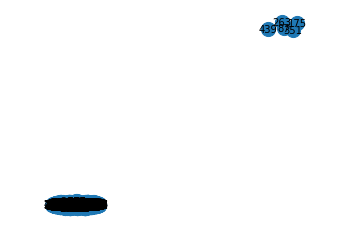

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
        #if  sc != 0:
#         Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [26]:
v = Gexp.number_of_nodes()
Gexp.number_of_edges()

122275

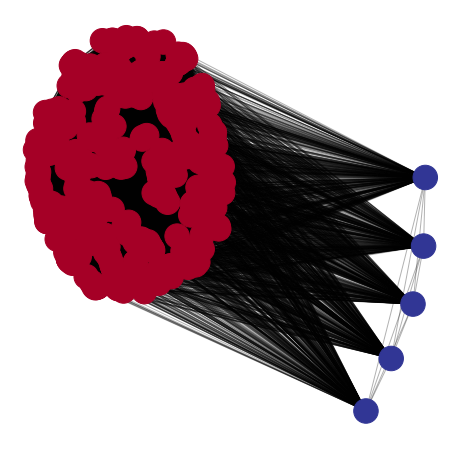

In [27]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

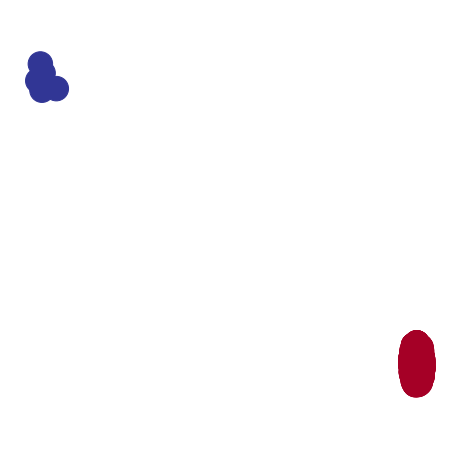

In [28]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [29]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({0: 495, 1: 5})
clusters in expression graph:  Counter({0: 495, 1: 5})


In [30]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [31]:
abs_score = float(v_abs/v)
abs_score

0.99

In [32]:
exp_score = float(v_exp/v)
exp_score

0.99

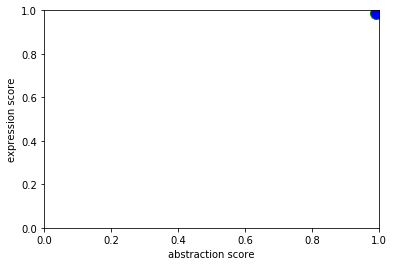

In [33]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()